In [1]:
pacman::p_load(ggplot2,ggpubr,phylotools,geiger,ggtreeExtra,data.table,ggnet,network,
               phytools,phyloseq,ggtree,ape,grid,tidyr,wesanderson,Hmisc,GGally,
               igraph,network, sna, wesanderson,ggalluvial,
               RColorBrewer,data.table,dtplyr,cowplot,tibble,ggupset,
               ggforce,ggnewscale,philentropy,ggdendro,ggforce,
               ggnewscale,stringr,lubridate,ggridges,patchwork,ggstance,dendextend,tidyverse)

In [2]:
pouchetti_test = read.csv("/vortexfs1/omics/alexander/akrinos/2021-tara-phaeo/pouchetti-test/phaeo_db_EUKulele/EUKulele_phaeo/taxonomy_estimation/Pouch_Trinity_transdecoder_decontam-estimated-taxonomy.out",
                         sep="\t")

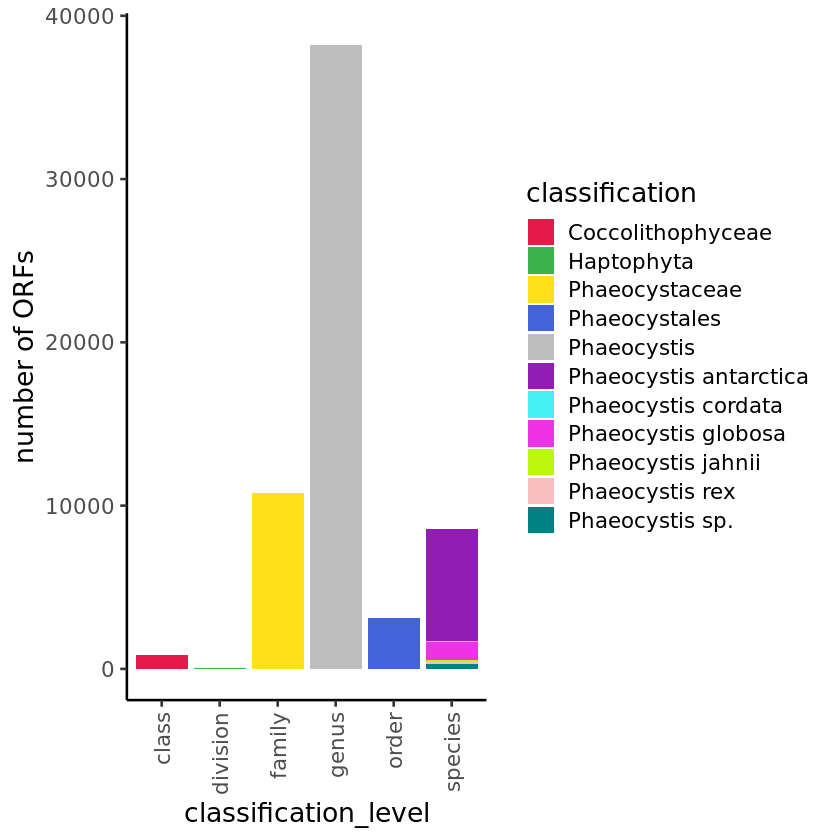

In [22]:

phylum_distinct_cols <- c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', 'gray', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')
ggplot(pouchetti_test %>% dplyr::group_by(classification,classification_level) %>% dplyr::tally()) + 
    geom_bar(aes(x = classification_level, y = n, fill = classification),stat="identity") + 
    theme_classic(base_size=16) + ylab("number of ORFs") + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=phylum_distinct_cols)

In [26]:
phaeo_tax = read.csv('/vortexfs1/omics/alexander/akrinos/2021-tara-phaeo/2021-akrinos-tara-phaeo/phaeo_eukulele_db_v2/tax-table.txt',
        sep="\t")
marmmetsp_tax  = read.csv('/vortexfs1/omics/alexander/akrinos/2021-tara-phaeo/pouchetti-test/eukulele-snake/marmmetsp/tax-table.txt',
        sep="\t")

In [31]:
write.table(marmmetsp_tax %>% dplyr::bind_rows(phaeo_tax), "/vortexfs1/omics/alexander/akrinos/2021-remodeling-eukrhythmic/WAP_utilities/eukulele-workflow/marmmetsp_plus_phaeo/tax-table.txt",sep="\t")

Warning message:
“Ignoring unknown parameters: rotation”


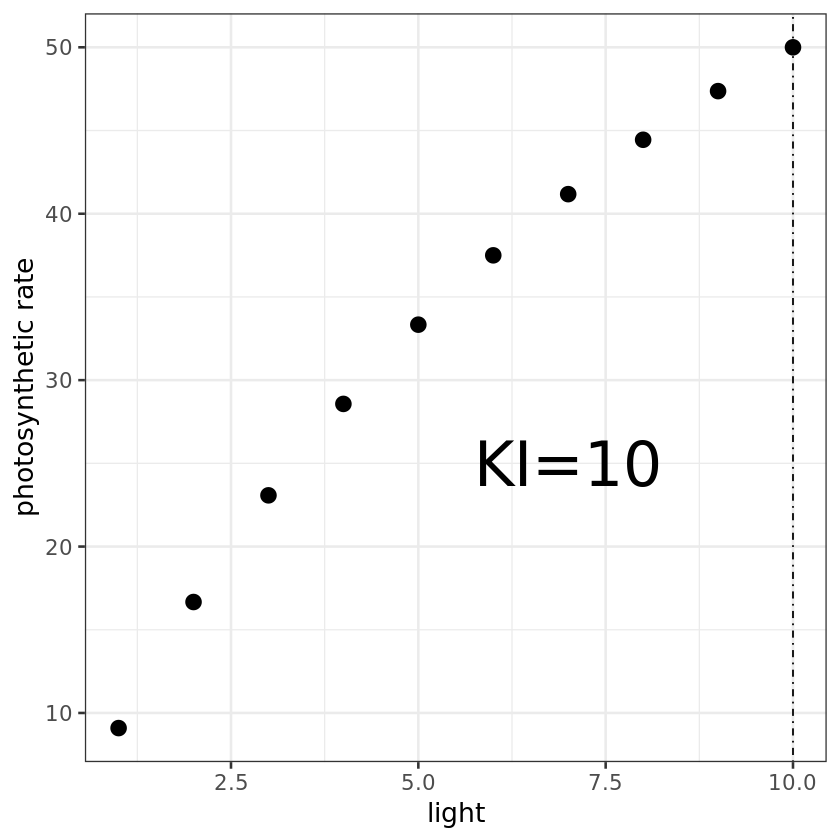

In [14]:
KI = 10
light_levels = c(1:10)
ggplot() + geom_point(aes(x=light_levels, y = (light_levels * 100)/(KI+light_levels)),size=4) + 
    geom_vline(aes(xintercept=KI),linetype="dotdash") + 
    geom_text(aes(x=KI-3, y = 25, label=paste0("KI=",KI)),rotation=90,size=13) + 
    theme_bw(base_size=16) + 
    ylab("photosynthetic rate") + xlab("light")

In [7]:
volume = 10000 # um
cells_in_vol = c(10^3,10^4,10^5,10^6,10^7,10^8,10^9)
((volume^3) / cells_in_vol)^(1/3)

[1] 1000.00000  464.15888  215.44347  100.00000   46.41589   21.54435   10.00000

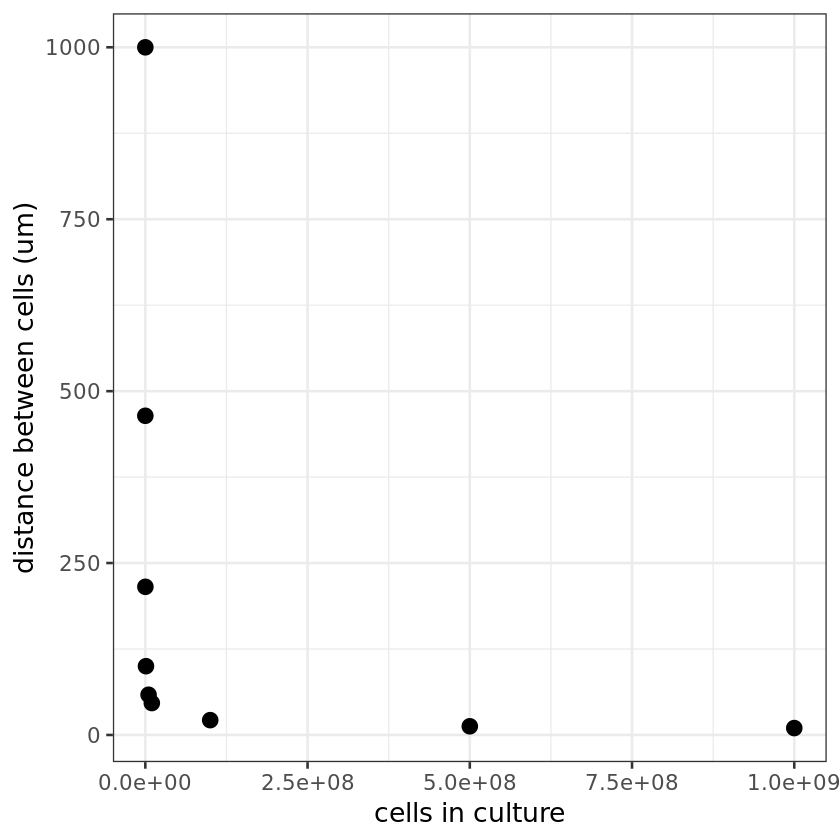

In [10]:
volume = 10000 # um
cells_in_vol = c(10^3,10^4,10^5,10^6,5*10^6,10^7,10^8,5*10^8,10^9)
ggplot() + geom_point(aes(x=cells_in_vol, y = ((volume^3) / cells_in_vol)^(1/3)),size=4) + 
    theme_bw(base_size=16) +# scale_x_log10() +scale_y_log10() +
    ylab("distance between cells (um)") + xlab("cells in culture")

## Read in and compare RPKM values from genomes before vs. after coverm

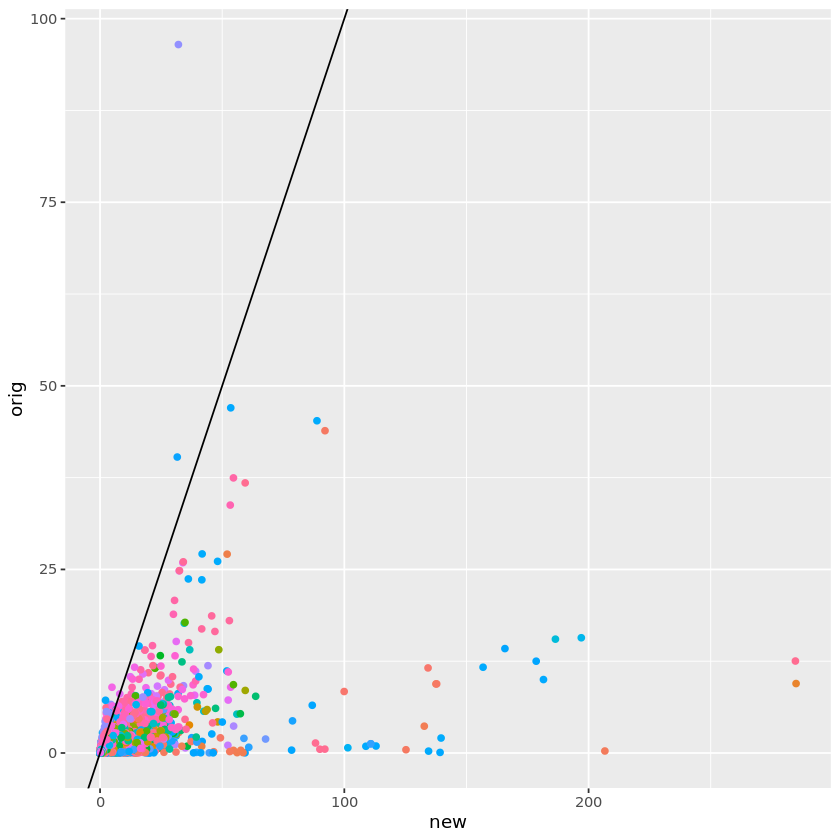

In [118]:
ggplot(read.csv("/vortexfs1/omics/alexander/halexander/2020-tara-mag-abund/compare_rpkm.csv")) + 
    geom_point(aes(x=NewTake,y=RPKM,col=Sample))+ylab("orig") + xlab("new") + 
    geom_abline(aes(slope=1,intercept=0)) + theme_bw(base_size=13) + theme(legend.position="none")

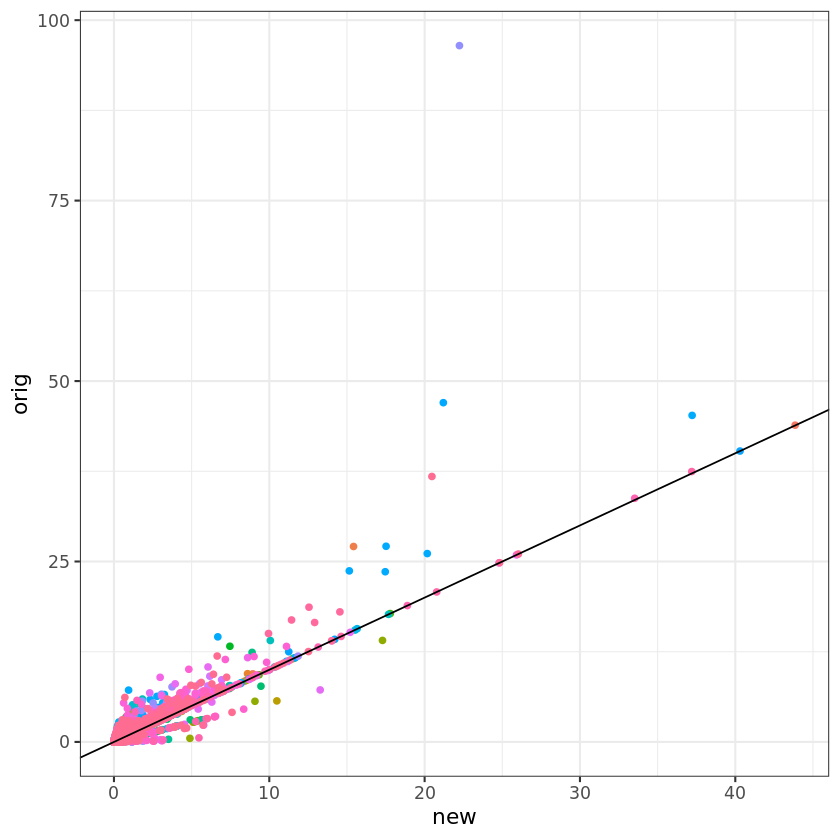

In [122]:
ggplot(read.csv("/vortexfs1/omics/alexander/halexander/2020-tara-mag-abund/compare_rpkm_reads.csv")) + 
    geom_point(aes(x=RPKM_New_Reads,y=RPKM_Orig,col=Sample))+ylab("orig") + xlab("new") + 
    geom_abline(aes(slope=1,intercept=0)) + theme_bw(base_size=13) + theme(legend.position="none")

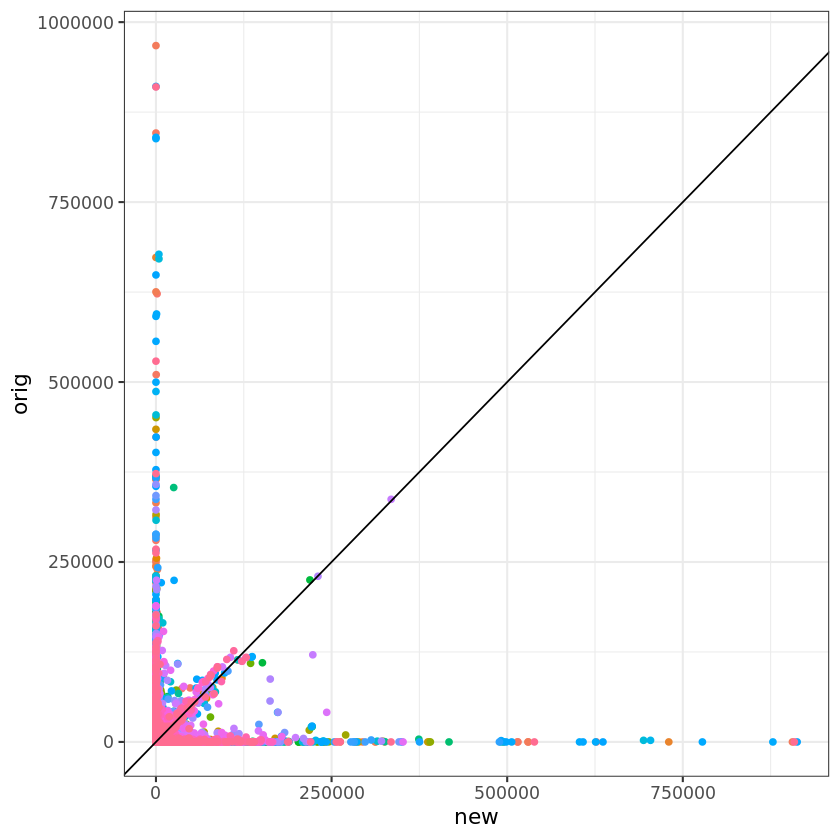

In [120]:
ggplot(read.csv("/vortexfs1/omics/alexander/halexander/2020-tara-mag-abund/compare_tpm.csv")) + 
    geom_point(aes(x=NewTPM,y=OrigTPM,col=Sample))+ylab("orig") + xlab("new") + 
    geom_abline(aes(slope=1,intercept=0)) + theme_bw(base_size=13) + theme(legend.position="none")

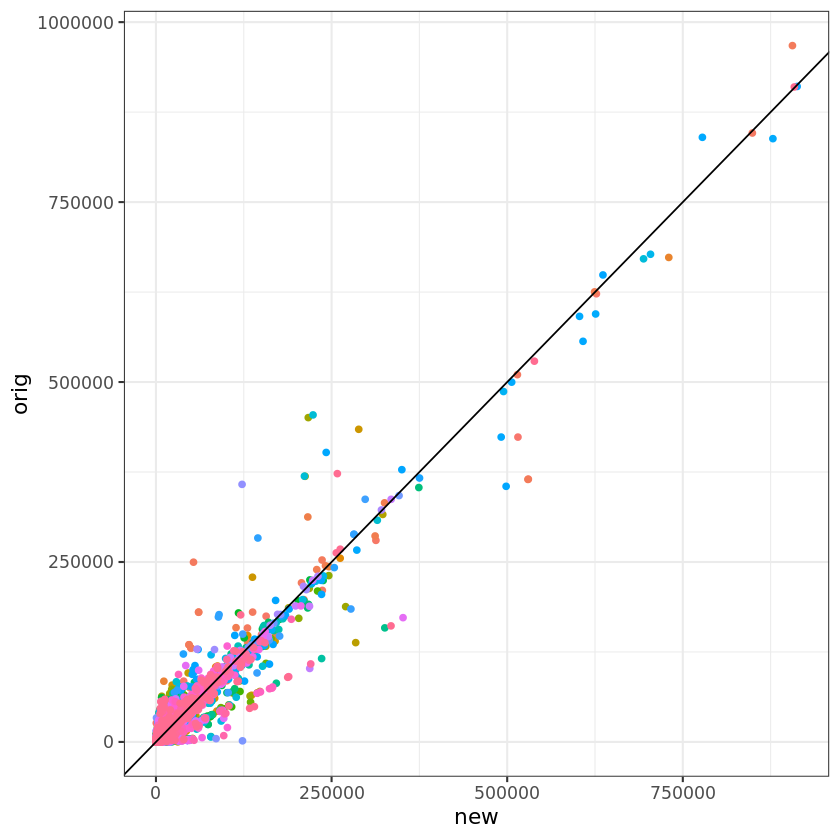

In [125]:
ggplot(read.csv("/vortexfs1/omics/alexander/halexander/2020-tara-mag-abund/compare_tpm_reads.csv")) + 
    geom_point(aes(x=NewTPMReads,y=OrigTPM,col=Sample))+ylab("orig") + xlab("new") + 
    geom_abline(aes(slope=1,intercept=0)) + theme_bw(base_size=13) + theme(legend.position="none")

## Read in metadata-linked abundances from `process-abundance-data.ipynb`

In [3]:
sam_with_meta_bact <- data.frame(fread(file.path("..","..","data","sam_with_meta_bact.csv")))
sam_with_meta <- data.frame(fread(file.path("..","..","data","sam_with_meta_euk.csv")))
data_tree_bact <- data.frame(fread(file.path("..","..","data","data_tree_bact.csv")))
data_tree_euk <- data.frame(fread(file.path("..","..","data","data_tree_euk.csv")))

In [4]:
sam_with_meta_bact_filt <- data.frame(fread(file.path("..","..","data","sam_with_meta_bact_filt.csv")))
sam_with_meta_filt <- data.frame(fread(file.path("..","..","data","sam_with_meta_euk_filt.csv")))

In [5]:
sam_with_meta_bact %>% dplyr::filter(type=="S") %>% dplyr::filter(Sample==1229872) %>%
    #dplyr::group_by(clustnum) %>% 
    dplyr::summarize(meanlen=mean(seqlen),sdseqlen=sd(seqlen),num=n())

meanlen  sdseqlen num 
1 1298.247 299.2004 2233

In [6]:
sam_with_meta_bact_filt %>% dplyr::filter(type=="S") %>% dplyr::filter(Sample==1229872) %>%
    #dplyr::group_by(clustnum) %>% 
    dplyr::summarize(meanlen=mean(seqlen),sdseqlen=sd(seqlen),num=n())

meanlen  sdseqlen num
1 1507.255 100.5775 608

In [7]:
sam_with_meta_filt %>% dplyr::filter(type=="S") %>% dplyr::filter(Sample==1229872) %>%
    #dplyr::group_by(clustnum) %>% 
    dplyr::summarize(meanlen=mean(seqlen),sdseqlen=sd(seqlen),total=n())

meanlen sdseqlen total
1 1834    363.3889 109

In [8]:
sam_with_meta %>% dplyr::filter(type=="S") %>% dplyr::filter(Sample==1229872) %>%
    #dplyr::group_by(clustnum) %>% 
    dplyr::summarize(meanlen=mean(seqlen),sdseqlen=sd(seqlen),total=n())

meanlen  sdseqlen total
1 1628.975 390.0602 606

In [9]:
colnames(sam_with_meta_bact_filt)

[1] "V1"                                       
 [2] "X.rname"                                  
 [3] "startpos"                                 
 [4] "endpos"                                   
 [5] "numreads"                                 
 [6] "covbases"                                 
 [7] "coverage"                                 
 [8] "meandepth"                                
 [9] "meanbaseq"                                
[10] "meanmapq"                                 
[11] "TPM"                                      
[12] "Sample"                                   
[13] "AssemblyName"                             
[14] "X.x"                                      
[15] "totalreads"                               
[16] "propreads"                                
[17] "X.y"                                      
[18] "AnalysisIDs"                              
[19] "Assembly"                                 
[20] "Raw"                                      
[21] "SeqProjID"                                
[22] "Analysis.Project.GOLD.Analysis.Project.ID"
[23] "Analysis.Project.Analysis.Project.Name"   
[24] "Analysis.Project.Analysis.Project.Type"   
[25] "Analysis.Project.IMG.Submission.ID"       
[26] "Analysis.Project.Assembly.Method"         
[27] "Analysis.Project.Add.Date"                
[28] "Analysis.Project.IMG.Taxon.ID"            
[29] "Analysis.Project.ITS.Analysis.Project.ID" 
[30] "SampleDate"                               
[31] "type"                                     
[32] "clustnum"                                 
[33] "seqlen"                                   
[34] "percid"                                   
[35] "plus"                                     
[36] "a"                                        
[37] "b"                                        
[38] "aln"                                      
[39] "target"                                   
[40] "Label"                                    
[41] "n"

In [10]:
pivoted_abundance = sam_with_meta_filt %>% dplyr::filter(Label %in% unlist(data_tree_euk$Label)) %>% 
     dplyr::bind_rows(sam_with_meta_bact_filt %>%
                      dplyr::filter(Label %in% unlist(data_tree_bact$Label))) %>%
     dplyr::distinct(Label,SampleDate,TPM) %>% 
    dplyr::group_by(Label) %>%
    dplyr::mutate(ZScore = (TPM - mean(TPM)) / sd(TPM)) %>%
    tidyr::pivot_wider(id_cols=SampleDate,names_from=Label,values_from=TPM,values_fn=max)

In [11]:
correlations <- Hmisc::rcorr(as.matrix(pivoted_abundance %>% dplyr::select(-SampleDate)),
                             type="pearson")

In [12]:
corr_coefs <- as.data.frame(correlations$r) %>% 
                dplyr::select(dplyr::starts_with("ME")) %>%
                tibble::rownames_to_column("Seq1") %>%
                tidyr::pivot_longer(cols=starts_with("ME"),
                                    names_to = "Seq2",values_to="CorrCoef")

In [13]:
colnames(data.frame(correlations$P) %>% dplyr::select(!dplyr::starts_with("ME")))

character(0)

In [14]:
corr_pvals <- as.data.frame(correlations$P) %>% 
                dplyr::select(dplyr::starts_with("ME")) %>%
                tibble::rownames_to_column("Seq1") %>%
                tidyr::pivot_longer(cols=starts_with("ME"),
                                    names_to = "Seq2",values_to="P.vals")

In [15]:
FDR = 0.25
significant_correlations = corr_pvals %>% #dplyr::filter(!is.na(P.vals)) %>% 
    dplyr::mutate(P.vals = dplyr::case_when(is.na(P.vals) ~ 10,
                                            TRUE ~ P.vals)) %>%
    arrange(P.vals) %>%
    dplyr::mutate(PValRank=c(1:nrow(.))) %>%
    dplyr::mutate(Corrected = PValRank / nrow(corr_pvals %>% dplyr::filter(Seq1!=Seq2)) * FDR) %>%
    dplyr::filter(((P.vals < 0.05) & (Corrected < 0.05)) | (Seq1==Seq2))

In [16]:
tail(significant_correlations)

Seq1             Seq2             P.vals PValRank Corrected
1 MEND-TF-16S-1143 MEND-TF-16S-1143 10     362399   0.2504125
2 MEND-TF-16S-1146 MEND-TF-16S-1146 10     362400   0.2504132
3 MEND-TF-16S-1155 MEND-TF-16S-1155 10     362401   0.2504139
4 MEND-TF-16S-1165 MEND-TF-16S-1165 10     362402   0.2504146
5 MEND-TF-16S-1286 MEND-TF-16S-1286 10     362403   0.2504153
6 MEND-TF-16S-1597 MEND-TF-16S-1597 10     362404   0.2504160

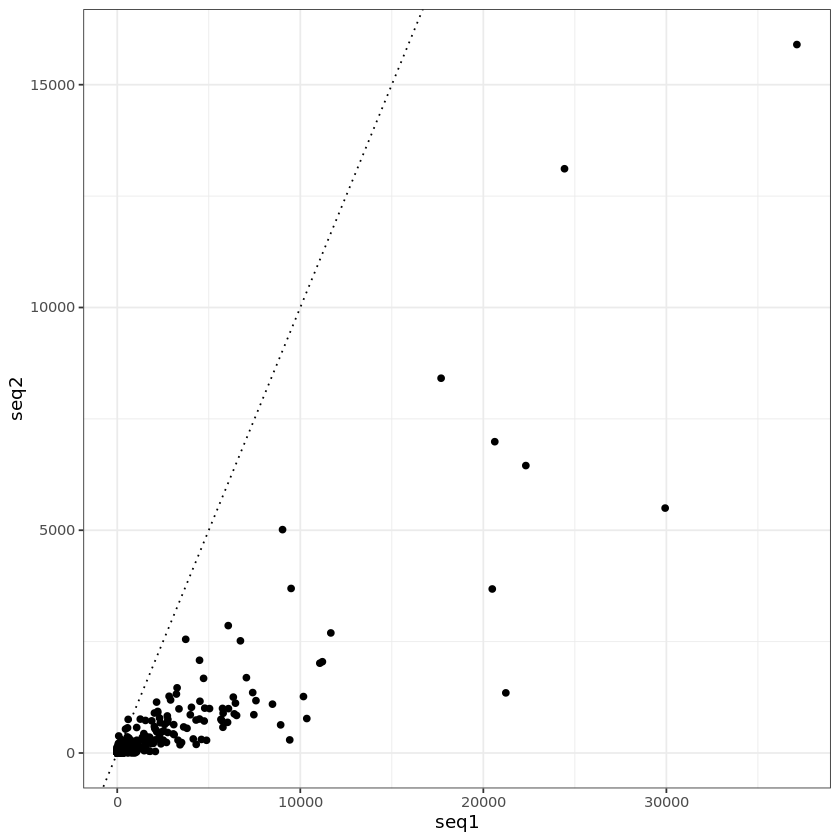

In [17]:
ggplot(pivoted_abundance %>% dplyr::rename(c("seq1"="MEND-TF-18S-182",
                                             "seq2"="MEND-TF-16S-1086"))) +
    geom_abline(aes(intercept=0,slope=1),linetype="dotted") + 
    geom_point(aes(x=seq1,y=seq2)) + theme_bw() #+ xlim(c(0,200000)) + ylim(c(0,200000))

In [18]:
head(significant_correlations %>% dplyr::filter(Corrected < 0.05) %>%
        #dplyr::arrange(desc(P.vals)) %>%
        dplyr::left_join(corr_coefs) %>%
        dplyr::filter(grepl("16S",Seq1) & grepl("18S",Seq2)) %>%
        dplyr::arrange(desc(CorrCoef)))

Joining, by = c("Seq1",
"Seq2")


Seq1             Seq2            P.vals PValRank Corrected   CorrCoef 
1 MEND-TF-16S-1097 MEND-TF-18S-232 0      5057     0.003494315 0.9828334
2 MEND-TF-16S-971  MEND-TF-18S-130 0      4387     0.003031354 0.8809750
3 MEND-TF-16S-1008 MEND-TF-18S-133 0      4495     0.003105981 0.8698393
4 MEND-TF-16S-1086 MEND-TF-18S-182 0      4998     0.003453546 0.8666151
5 MEND-TF-16S-954  MEND-TF-18S-171 0      4246     0.002933925 0.8631036
6 MEND-TF-16S-997  MEND-TF-18S-269 0      4479     0.003094925 0.8511390

In [19]:
significant_correlations

## link to tax labels
## filter those mentioned in text as seq1 or seq2
## create correlation matrix

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    #dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter(CorrCoef > 0) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain,Family), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum","Family1"="Family")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain,Family), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum","Family2"="Family"))

Seq1             Seq2             P.vals PValRank Corrected   
1     MEND-TF-18S-1    MEND-TF-18S-309  0       1       6.909857e-07
2     MEND-TF-18S-1    MEND-TF-16S-235  0       2       1.381971e-06
3     MEND-TF-18S-1    MEND-TF-16S-1050 0       3       2.072957e-06
4     MEND-TF-18S-1    MEND-TF-16S-209  0       4       2.763943e-06
5     MEND-TF-18S-1    MEND-TF-16S-560  0       5       3.454928e-06
6     MEND-TF-18S-1    MEND-TF-16S-679  0       6       4.145914e-06
7     MEND-TF-18S-1    MEND-TF-16S-731  0       7       4.836900e-06
8     MEND-TF-18S-1    MEND-TF-16S-846  0       8       5.527885e-06
9     MEND-TF-18S-1    MEND-TF-16S-897  0       9       6.218871e-06
10    MEND-TF-18S-10   MEND-TF-18S-131  0      10       6.909857e-06
11    MEND-TF-18S-19   MEND-TF-18S-23   0      11       7.600842e-06
12    MEND-TF-18S-23   MEND-TF-18S-19   0      12       8.291828e-06
13    MEND-TF-18S-23   MEND-TF-16S-610  0      13       8.982814e-06
14    MEND-TF-18S-23   MEND-TF-16S-652  0      14       9.673799e-06
15    MEND-TF-18S-23   MEND-TF-16S-687  0      15       1.036479e-05
16    MEND-TF-18S-23   MEND-TF-16S-711  0      16       1.105577e-05
17    MEND-TF-18S-23   MEND-TF-16S-719  0      17       1.174676e-05
18    MEND-TF-18S-23   MEND-TF-16S-776  0      18       1.243774e-05
19    MEND-TF-18S-23   MEND-TF-16S-1634 0      19       1.312873e-05
20    MEND-TF-18S-29   MEND-TF-18S-133  0      20       1.381971e-05
21    MEND-TF-18S-29   MEND-TF-18S-163  0      21       1.451070e-05
22    MEND-TF-18S-29   MEND-TF-18S-233  0      22       1.520168e-05
23    MEND-TF-18S-29   MEND-TF-18S-295  0      23       1.589267e-05
24    MEND-TF-18S-29   MEND-TF-18S-305  0      24       1.658366e-05
25    MEND-TF-18S-29   MEND-TF-18S-362  0      25       1.727464e-05
26    MEND-TF-18S-29   MEND-TF-16S-83   0      26       1.796563e-05
27    MEND-TF-18S-29   MEND-TF-16S-339  0      27       1.865661e-05
28    MEND-TF-18S-29   MEND-TF-16S-921  0      28       1.934760e-05
29    MEND-TF-18S-29   MEND-TF-16S-982  0      29       2.003858e-05
30    MEND-TF-18S-29   MEND-TF-16S-1008 0      30       2.072957e-05
⋮     ⋮                ⋮                ⋮      ⋮        ⋮           
72933 MEND-TF-16S-960  MEND-TF-16S-960  10     362375   0.2503959   
72934 MEND-TF-16S-964  MEND-TF-16S-964  10     362376   0.2503966   
72935 MEND-TF-16S-966  MEND-TF-16S-966  10     362377   0.2503973   
72936 MEND-TF-16S-968  MEND-TF-16S-968  10     362378   0.2503980   
72937 MEND-TF-16S-972  MEND-TF-16S-972  10     362379   0.2503987   
72938 MEND-TF-16S-979  MEND-TF-16S-979  10     362380   0.2503994   
72939 MEND-TF-16S-980  MEND-TF-16S-980  10     362381   0.2504001   
72940 MEND-TF-16S-1000 MEND-TF-16S-1000 10     362382   0.2504008   
72941 MEND-TF-16S-1004 MEND-TF-16S-1004 10     362383   0.2504015   
72942 MEND-TF-16S-1007 MEND-TF-16S-1007 10     362384   0.2504022   
72943 MEND-TF-16S-1016 MEND-TF-16S-1016 10     362385   0.2504028   
72944 MEND-TF-16S-1017 MEND-TF-16S-1017 10     362386   0.2504035   
72945 MEND-TF-16S-1025 MEND-TF-16S-1025 10     362387   0.2504042   
72946 MEND-TF-16S-1031 MEND-TF-16S-1031 10     362388   0.2504049   
72947 MEND-TF-16S-1034 MEND-TF-16S-1034 10     362389   0.2504056   
72948 MEND-TF-16S-1052 MEND-TF-16S-1052 10     362390   0.2504063   
72949 MEND-TF-16S-1053 MEND-TF-16S-1053 10     362391   0.2504070   
72950 MEND-TF-16S-1054 MEND-TF-16S-1054 10     362392   0.2504077   
72951 MEND-TF-16S-1056 MEND-TF-16S-1056 10     362393   0.2504084   
72952 MEND-TF-16S-1088 MEND-TF-16S-1088 10     362394   0.2504091   
72953 MEND-TF-16S-1099 MEND-TF-16S-1099 10     362395   0.2504098   
72954 MEND-TF-16S-1100 MEND-TF-16S-1100 10     362396   0.2504104   
72955 MEND-TF-16S-1110 MEND-TF-16S-1110 10     362397   0.2504111   
72956 MEND-TF-16S-1130 MEND-TF-16S-1130 10     362398   0.2504118   
72957 MEND-TF-16S-1143 MEND-TF-16S-1143 10     362399   0.2504125   
72958 MEND-TF-16S-1146 MEND-TF-16S-1146 10     362400   0.2504132   
7295

Joining, by = c("Seq1",
"Seq2")


In [20]:
e%>%dplyr::filter(Order1=="Chromulinales") %>% dplyr::filter(CorrCoef>0.5)

Seq1            Seq2            P.vals PValRank Corrected    CorrCoef 
1 MEND-TF-18S-239 MEND-TF-16S-896  0        243   0.0001679095 0.5449305
2 MEND-TF-18S-220 MEND-TF-18S-220 10     361844   0.2500290214 1.0000000
3 MEND-TF-18S-239 MEND-TF-18S-239 10     361848   0.2500317853 1.0000000
  Order1        Phylum1    Domain1   Family1        Order2       
1 Chromulinales Ochrophyta Eukaryota Chromulinaceae Pirellulales 
2 Chromulinales Ochrophyta Eukaryota Chromulinaceae Chromulinales
3 Chromulinales Ochrophyta Eukaryota Chromulinaceae Chromulinales
  Phylum2        Domain2   Family2       
1 Planctomycetes Bacteria  Pirellulaceae 
2 Ochrophyta     Eukaryota Chromulinaceae
3 Ochrophyta     Eukaryota Chromulinaceae

In [21]:
phylum_factors
sum(phylum_factors == "Bacteroidetes")

ERROR: Error in eval(expr, envir, enclos): object 'phylum_factors' not found


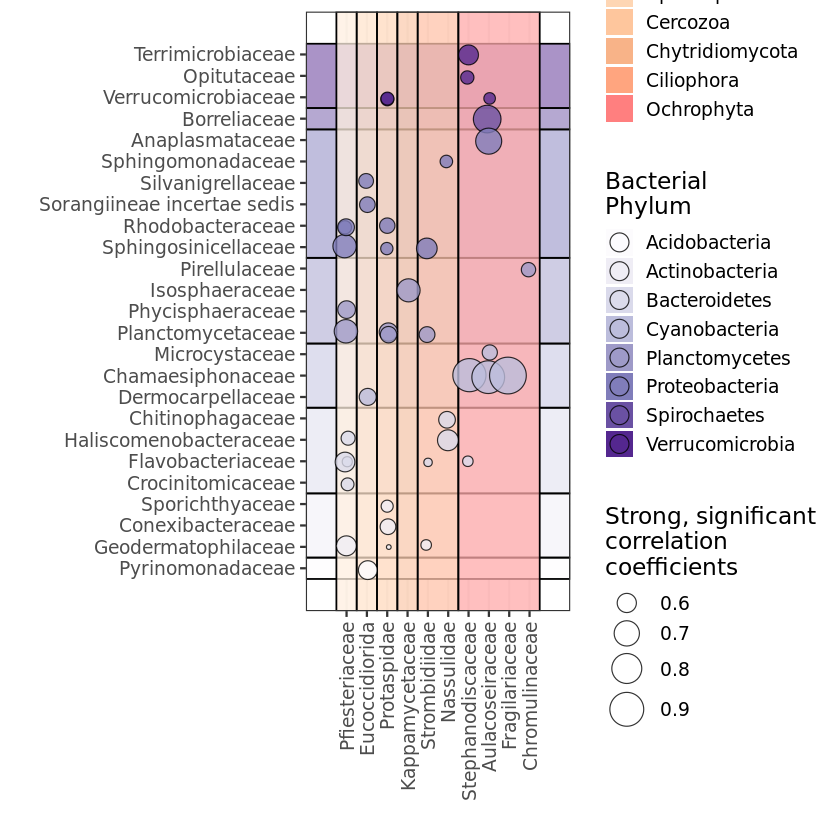

In [25]:
list_of_orders=c("Holosporales","Rickettsiales","Isosphaerales","Synechococcales",
                 "Chroococcales",
                 "Peridiniales", #dinoflagellate
                 "Saprospirales","Nassulida",
                 "Desulfuromonadales",
                 "Phycisphaerales","Pirellulales",
                 "Cryomonadida", #cercozoan
                 "Oligotrichia", # ciliate
                 "Chromulinales",
                 "Aulacoseirales","Spirochaetales",
                 "Rhodobacterales","Bacillariophyta","Chrysophyceae")
list_of_families=c("Sphingobacteriaceae",
                   "Borreliaceae","Chamaesiphonaceae","Microcystaceae",
                   "Planctomycetaceae",
                   "Chthoniobacteraceae",
                   "Flavobacteriaceae",
                   "Sphingosinicellaceae")
list_of_phyla=c("Chytridiomycota","Apicomplexa","Ochrophyta")

distinct_cols <- c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')
total_phyla = unique(sort(e$Phylum1))
for_plot = e %>% dplyr::filter((((Family1%in%list_of_families)|
                                 (Order1%in%list_of_orders)|
                                 (Phylum1%in%list_of_phyla))&
                                ((Family2%in%list_of_families)|
                                 (Order2%in%list_of_orders)|
                                 (Phylum2%in%list_of_phyla)|(Domain2=="Bacteria")))) %>%
    dplyr::filter(Corrected < 0.05) %>% dplyr::filter((CorrCoef) > 0.5) %>%
    dplyr::mutate(direction=case_when(CorrCoef > 0 ~ "Positive",
                                      CorrCoef < 0 ~ "Negative")) %>%
       dplyr::mutate(Family1=case_when(Family1=="Geobacter"~"Geobacteraceae",
                                       Family1=="Verrucomicrobia subdivision 3" ~ "Verrucomicrobiaceae",
                                       TRUE ~ Family1),
                     Family2=case_when(Family2=="Geobacter"~"Geobacteraceae",
                                       Family2=="Verrucomicrobia subdivision 3" ~ "Verrucomicrobiaceae",
                                      TRUE ~ Family2))%>%
    dplyr::arrange(Domain1,Phylum1) %>%
    dplyr::filter(((Domain1=="Eukaryota")&(Domain2=="Bacteria"))) #|((Domain1=="Bacteria")&(Domain2=="Eukaryota")))
family_factors = unique(c(for_plot$Family1,
                          for_plot$Family2))
family_factors_fills = unique(c(for_plot$Family2))
family_factors_fills_bact = unique(c(for_plot$Family1))
family_factors_bact = unique(c((for_plot%>%dplyr::arrange(Domain2,Phylum2))$Family2))
phylum_factors = (for_plot %>% dplyr::distinct(Phylum1,Family1))$Phylum1
phylum_colors_bact=c('#fcfbfd','#efedf5','#dadaeb','#bcbddc','#9e9ac8','#807dba','#6a51a3','#54278f','#3f007d')
#c('#dadaeb','#bcbddc','#9e9ac8','#807dba','#6a51a3',"pink","blue","red")#'#4a1486',
phylum_colors=c('#fdd0a2','#fdae6b','#fd8d3c','#f16913',"#ff4c00","red")
rects <- data.frame(xstart = seq(0.5,length(phylum_factors)-0.5,1), xend = seq(1.5,length(phylum_factors)+0.5,1), 
         col = phylum_factors)
start_num = 0.5
rects_dup=data.frame()#xstart=c(0.5),xend=c(1.5),col=phylum_factors[1])
for (curr_phy in unique(phylum_factors)) {
    rep_no = sum(phylum_factors == curr_phy)
    curr_frame = data.frame(xstart = c(start_num), xend=c(start_num + rep_no), col = curr_phy)
    start_num = start_num + rep_no
    rects_dup = rbind(rects_dup,curr_frame)
}

phylum_factors_bact = (for_plot %>% dplyr::arrange(Domain2,Phylum2) %>% 
                       dplyr::distinct(Phylum2,Family2))$Phylum2
rects_bact <- data.frame(ystart = seq(0.5,length(phylum_factors_bact)-0.5,1),
                         yend = seq(1.5,length(phylum_factors_bact)+0.5,1), 
         col = phylum_factors_bact)
start_num = 0.5
rects_dup_bact=data.frame()#xstart=c(0.5),xend=c(1.5),col=phylum_factors[1])
for (curr_phy in unique(phylum_factors_bact)) {
    rep_no = sum(phylum_factors_bact == curr_phy)
    curr_frame = data.frame(ystart = c(start_num), yend=c(start_num + rep_no), col = curr_phy)
    start_num = start_num + rep_no
    rects_dup_bact = rbind(rects_dup_bact,curr_frame)
}
alv_cols = c("#FE6100","#DC267F","pink",'#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda',
             '#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b')
ggplot(for_plot %>% dplyr::filter(Seq1!=Seq2))+
    geom_rect(data=rects_bact, aes(xmin=-1, xmax=length(family_factors_fills_bact)+2, ymin=ystart,
              ymax=yend, fill=col))+
    scale_fill_manual(values=phylum_colors_bact,breaks=unique(phylum_factors_bact),name="Bacterial\nPhylum") + 
    new_scale_fill()+
    geom_rect(data=rects_dup_bact, aes(xmin=-1, xmax=length(family_factors_fills_bact)+2, ymin=ystart,
              ymax=yend),fill="transparent",color="black",alpha =0.5)+
    geom_rect(data=rects, aes(ymin=-1, ymax=length(family_factors_fills)+2, xmin=xstart,
              xmax=xend, fill=col),alpha =0.5)+
    geom_rect(data=rects_dup, aes(ymin=-1, ymax=length(family_factors_fills)+2, xmin=xstart,
              xmax=xend),fill="transparent",color="black",alpha =0.5)+
    scale_fill_manual(values=phylum_colors,breaks=unique(phylum_factors),name="Eukaryotic\nPhylum") + 
    new_scale_fill()+ scale_x_discrete() + scale_y_discrete() +
    geom_jitter(aes(x = factor(Family1,levels=family_factors), 
                   y = factor(Family2,levels=family_factors_bact),
                   fill=Phylum2,
                   size=CorrCoef),alpha=0.8,pch=21,
                   color="black",width=0.1,height=0.1) + 
    scale_shape_manual(values=c(15,16,17,21,22,23,24,25),name="Bacterial\nPhylum") + 
    theme_bw(base_size=14) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    scale_fill_manual(values=phylum_colors_bact,name="Bacterial\nPhylum")+
    #scale_fill_gradient(low="white",high="orange",name="Strong, significant\ncorrelation\ncoefficients") + 
    scale_size(range=c(1,10),name="Strong, significant\ncorrelation\ncoefficients") + xlab("") + ylab("")+
    guides(fill=guide_legend(override.aes=list(size=5,pch=21)),
           shape=guide_legend(override.aes=list(size=5),name="Bacterial\nPhylum"))
ggsave("corr.png",width=9,height=9,units="in",dpi=300)
ggsave("corr.pdf",width=7,height=8,units="in")



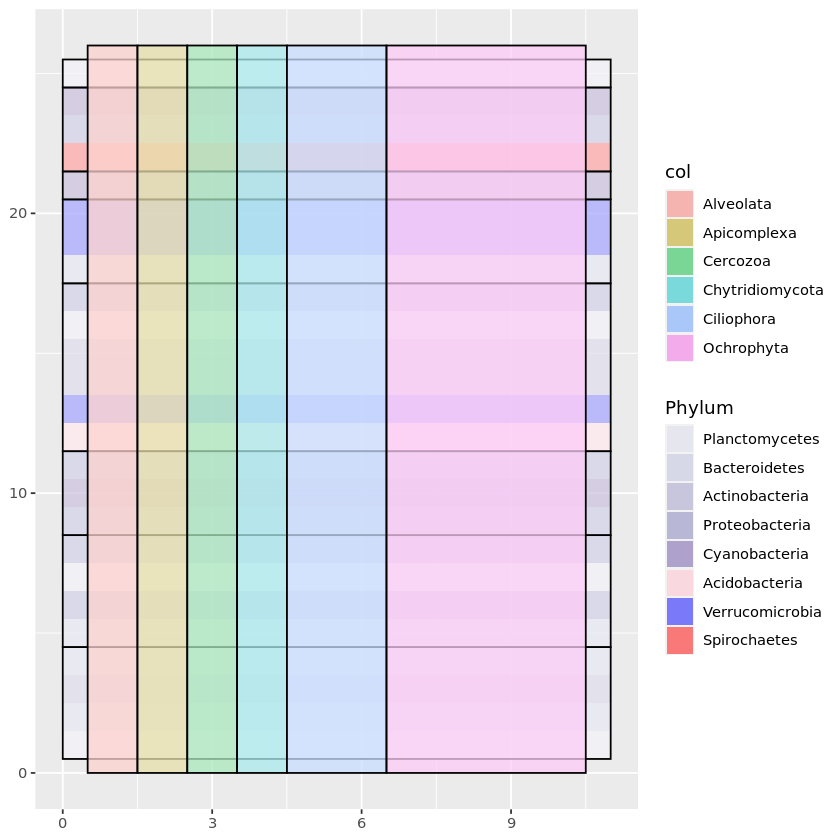

In [90]:
ggplot(for_plot %>% dplyr::filter(Seq1!=Seq2))+
    geom_rect(data=rects_bact, aes(xmin=0, xmax=length(family_factors_fills_bact)+1, ymin=ystart,
              ymax=yend, fill=col),alpha =0.5)+
    scale_fill_manual(values=phylum_colors_bact,breaks=unique(phylum_factors_bact),name="Phylum") + 
    new_scale_fill()+
    geom_rect(data=rects_dup_bact, aes(xmin=0, xmax=length(family_factors_fills_bact)+1, ymin=ystart,
              ymax=yend),fill="transparent",color="black",alpha =0.5)+
    geom_rect(data=rects, aes(ymin=0, ymax=length(family_factors_fills)+1, xmin=xstart,
              xmax=xend, fill=col),alpha =0.5)+
    geom_rect(data=rects_dup, aes(ymin=0, ymax=length(family_factors_fills)+1, xmin=xstart,
              xmax=xend),fill="transparent",color="black",alpha =0.5)

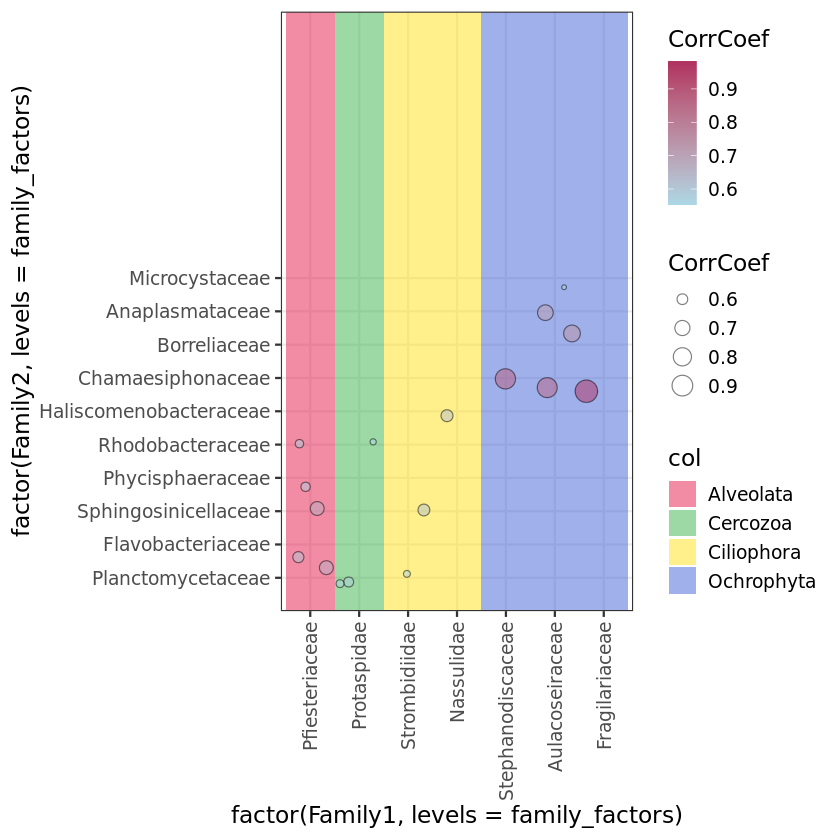

In [18]:
ggplot(for_plot)+
    geom_rect(data=rects, aes(ymin=0, ymax=length(family_factors)+1, xmin=xstart,
              xmax=xend, fill=col), alpha =0.5)+
    scale_fill_manual(values=distinct_cols) + 
    new_scale_fill()+ scale_x_discrete() + scale_y_discrete() +
    geom_jitter(aes(x = factor(Family1,levels=family_factors), 
                   y = factor(Family2,levels=family_factors),
                   fill=CorrCoef,size=CorrCoef),alpha=0.5,color="black",pch=21) + 
    theme_bw(base_size=14) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    scale_fill_gradient(low="light blue",high="maroon")

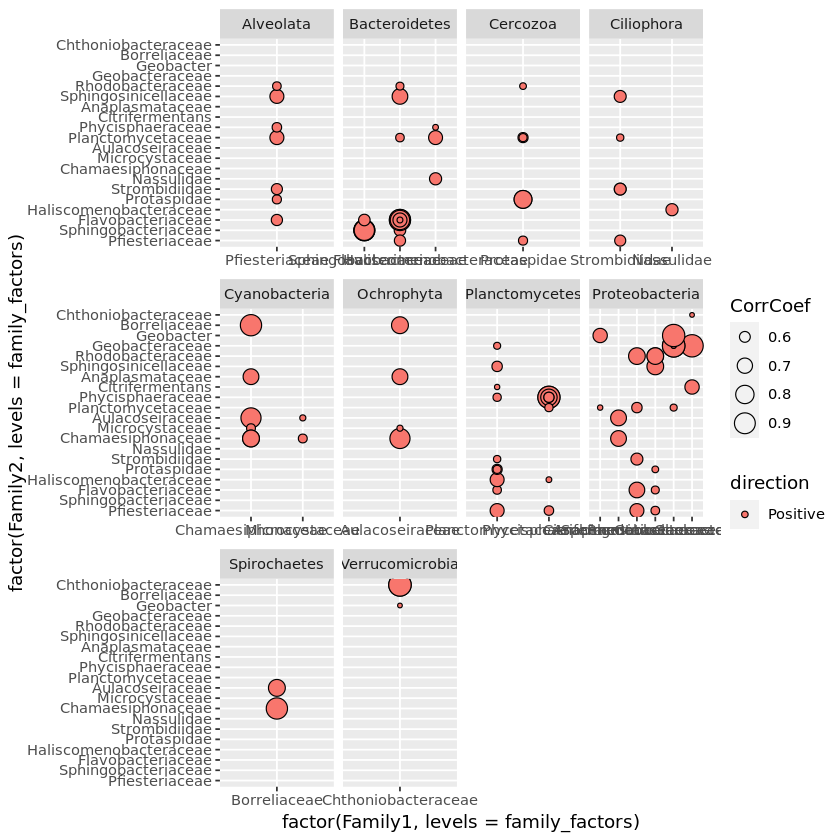

In [45]:
family_factors = unique(for_plot$Family1)
ggplot(for_plot)+
    geom_point(aes(x = factor(Family1,levels=family_factors), 
                   y = factor(Family2,levels=family_factors),
                   size = CorrCoef, fill=direction),pch=21,color="black")

In [17]:
length(unique(data_tree_euk$Label))
length(unique(data_tree_bact$Label))

[1] 111

[1] 502

In [18]:
# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

names(v)

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > 0) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) #%>%
    #dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Bacteria" ~ Order1,
    #                                       TRUE ~ Seq1),
    #              Seq2 = dplyr::case_when(Domain2 == "Bacteria" ~ Order2,
    #                                       TRUE ~ Seq2))
names(e)

#v = v %>%
#    dplyr::mutate(Label = dplyr::case_when(Domain == "Bacteria" ~ Phylum,
#                                           TRUE ~ Label))

[1] "Label"   "Domain"  "Phylum"  "Class"   "Order"   "Family"  "Genus"  
[8] "Species"

Joining, by = c("Seq1",
"Seq2")


[1] "Seq1"      "Seq2"      "P.vals"    "PValRank"  "Corrected" "CorrCoef" 
 [7] "Order1"    "Phylum1"   "Domain1"   "Order2"    "Phylum2"   "Domain2"

In [19]:
net = network::network(e %>% dplyr::mutate(weight=CorrCoef),multiple=TRUE,loops=TRUE)

In [20]:
net

 Network attributes:
  vertices = 602 
  directed = TRUE 
  hyper = FALSE 
  loops = TRUE 
  multiple = TRUE 
  bipartite = FALSE 
  total edges= 48698 
    missing edges= 0 
    non-missing edges= 48698 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [15]:
x = data.frame(Label = network.vertex.names(net))
x = factor(merge(x, v, by = "Label", sort = FALSE)$Phylum)
net %v% "Phylum" = as.character(x)
#net %e% "weights" = round(as.numeric(e$CorrCoef),2)
net %e% "weight" = round(as.numeric(e$CorrCoef),2)

In [16]:
# color palette
y = c(RColorBrewer::brewer.pal(9, "Set1"),
      RColorBrewer::brewer.pal(8, "Dark2"),'#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')
names(y) = levels(x)

# network plot
#ggnet2(net, color = "Phylum", palette = y, alpha = 1, edge.size = "weight",
#       edge.label="weights",edge.alpha = 0.5,size=3)

#ggsave("network.png",width=20,height=10,units="in")

In [18]:
refactored_graph <- graph_from_data_frame(data.frame(net),
                                          directed = FALSE, vertices = NULL)

V(refactored_graph)$type <- grepl("18S",V(refactored_graph)$name) #the second column of edges is TRUE type

layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph))
layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
#layout_gr <- as.data.frame(layout_with_gem(refactored_graph))

corr_communities <- cluster_louvain(refactored_graph,weight=data.frame(net)$CorrCoef)

set_vertex_attr(refactored_graph, "clustermembership",
                index = V(refactored_graph),
                membership(corr_communities))
set_vertex_attr(refactored_graph, "classification",
                index = V(refactored_graph),
                (v %>% dplyr::right_join(data.frame("Label"=V(refactored_graph)$name)))$Phylum)

#layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph)) #get.data.frame(refactored_graph) 


edge_df <- data.frame(net)
edge_df <- edge_df %>% dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".head"="Label")) %>%
    dplyr::rename(c("Dom1"="Domain")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".tail"="Label")) %>%
    dplyr::rename(c("Dom2"="Domain"))

# Add the MAG labels
#layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
layout_gr$mag <- V(refactored_graph)$name
layout_gr$community <- membership(corr_communities)

# Add the euk-prok labels
edge_df_inform <- edge_df %>% dplyr::select(.head,Dom1) %>% dplyr::rename(c("mag"=".head","class"="Dom1")) %>%
                    dplyr::bind_rows(edge_df %>% dplyr::select(.tail,Dom2) %>% 
                                     dplyr::rename(c("mag"=".tail","class"="Dom2")))
layout_gr = layout_gr %>% dplyr::left_join(v,by=c("mag"="Label")) %>%
    dplyr::rename(c("classification"="Phylum")) %>%
    dplyr::mutate(classification=dplyr::case_when(Domain == "Bacteria" ~ "Bacterial",
                                                  TRUE ~ classification))
#layout_gr$community <- membership(corr_communities)

layout_gr <- layout_gr %>% 
                    dplyr::mutate("degree" = as.numeric(as.character(igraph::degree(refactored_graph,
                                                                                  v = layout_gr$mag))))

layout_gr = layout_gr %>% 
            dplyr::select(V1,V2,mag,classification,Domain,Class,Order,community,degree)
layout_gr <- layout_gr %>% dplyr::distinct()

edge_df$from.x <- layout_gr$V1[match(edge_df$.head, layout_gr$mag)]  #  match the from locations from the node data.frame we previously connected
edge_df$from.y <- layout_gr$V2[match(edge_df$.head, layout_gr$mag)]
edge_df$to.x <- layout_gr$V1[match(edge_df$.tail, layout_gr$mag)]  #  match the to locations from the node data.frame we previously connected
edge_df$to.y <- layout_gr$V2[match(edge_df$.tail, layout_gr$mag)]

layout_gr_classes = layout_gr


IGRAPH e9f9a21 UNWB 602 48698 -- 
+ attr: name (v/c), type (v/l), clustermembership (v/n), P.vals (e/n),
| PValRank (e/n), Corrected (e/n), CorrCoef (e/n), Order1 (e/c),
| Phylum1 (e/c), Domain1 (e/c), Order2 (e/c), Phylum2 (e/c), Domain2
| (e/c), weight (e/n)
+ edges from e9f9a21 (vertex names):
 [1] MEND-TF-18S-1 --MEND-TF-18S-309  MEND-TF-18S-1 --MEND-TF-16S-235 
 [3] MEND-TF-18S-1 --MEND-TF-16S-1050 MEND-TF-18S-1 --MEND-TF-16S-209 
 [5] MEND-TF-18S-1 --MEND-TF-16S-560  MEND-TF-18S-1 --MEND-TF-16S-679 
 [7] MEND-TF-18S-1 --MEND-TF-16S-731  MEND-TF-18S-1 --MEND-TF-16S-846 
 [9] MEND-TF-18S-1 --MEND-TF-16S-897  MEND-TF-18S-10--MEND-TF-18S-131 
+ ... omitted several edges

Joining, by = "Label"


IGRAPH e9f9a21 UNWB 602 48698 -- 
+ attr: name (v/c), type (v/l), classification (v/c), P.vals (e/n),
| PValRank (e/n), Corrected (e/n), CorrCoef (e/n), Order1 (e/c),
| Phylum1 (e/c), Domain1 (e/c), Order2 (e/c), Phylum2 (e/c), Domain2
| (e/c), weight (e/n)
+ edges from e9f9a21 (vertex names):
 [1] MEND-TF-18S-1 --MEND-TF-18S-309  MEND-TF-18S-1 --MEND-TF-16S-235 
 [3] MEND-TF-18S-1 --MEND-TF-16S-1050 MEND-TF-18S-1 --MEND-TF-16S-209 
 [5] MEND-TF-18S-1 --MEND-TF-16S-560  MEND-TF-18S-1 --MEND-TF-16S-679 
 [7] MEND-TF-18S-1 --MEND-TF-16S-731  MEND-TF-18S-1 --MEND-TF-16S-846 
 [9] MEND-TF-18S-1 --MEND-TF-16S-897  MEND-TF-18S-10--MEND-TF-18S-131 
+ ... omitted several edges

In [19]:
edge_df = edge_df %>% #dplyr::filter(CorrCoef > 0.55) %>%
    dplyr::filter(((Domain1 == "Eukaryota") & (Domain2 == "Bacteria")) |
                  ((Domain2 == "Eukaryota") & (Domain1 == "Bacteria"))) #|
                  #((Domain2 == "Eukaryota") & (Domain1 == "Eukaryota")))

In [20]:
distinct_phyla <- sort(c(unique(data_tree_euk$Phylum),c("Bacterial")))
phylum_distinct_cols <- c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', 'gray', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')

In [21]:
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

bact_euk_only = significant_correlations %>% dplyr::full_join(corr_coefs) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter(CorrCoef > 0) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) #%>%
    #dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Bacteria" ~ Order1,
    #                                       TRUE ~ Seq1),
    #              Seq2 = dplyr::case_when(Domain2 == "Bacteria" ~ Order2,
    #                                       TRUE ~ Seq2))


alluvial_df = bact_euk_only %>%
    #dplyr::filter(CorrCoef > 0.5) %>%
    dplyr::mutate(Bacterium = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                               TRUE ~ Seq2),
                  Eukaryote = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                               TRUE ~ Seq2),
                  EukPhylum = dplyr::case_when(Domain1 == "Eukaryota" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  Connection = dplyr::case_when(CorrCoef <= 0.5 ~ "<=0.5",
                                                CorrCoef <= 0.6 ~ "<=0.6",
                                                CorrCoef <= 0.7 ~ "<=0.7",
                                                CorrCoef <= 0.8 ~ "<=0.8",
                                                CorrCoef <= 0.9 ~ "<=0.9",
                                                CorrCoef <= 1 ~ "<=1")) %>%
    dplyr::group_by(Eukaryote,EukPhylum,Connection) %>% dplyr::tally()

Joining, by = c("Seq1", "Seq2")


In [23]:
bipartite_net = bact_euk_only %>%
    dplyr::filter(CorrCoef > 0.3) %>%
    dplyr::mutate(Bacterium = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                               TRUE ~ Seq2),
                  Eukaryote = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                               TRUE ~ Seq2),
                  EukPhylum = dplyr::case_when(Domain1 == "Eukaryota" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  Connection = dplyr::case_when(CorrCoef <= 0.5 ~ "<=0.5",
                                                CorrCoef <= 0.6 ~ "<=0.6",
                                                CorrCoef <= 0.7 ~ "<=0.7",
                                                CorrCoef <= 0.8 ~ "<=0.8",
                                                CorrCoef <= 0.9 ~ "<=0.9",
                                                CorrCoef <= 1 ~ "<=1")) %>%
    dplyr::group_by(Eukaryote,EukPhylum) %>%
    dplyr::distinct(Bacterium,Eukaryote,EukPhylum,CorrCoef,Connection) %>%
    dplyr::select(Eukaryote,Bacterium,EukPhylum,CorrCoef,Connection)

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

net = network::network(bipartite_net %>% dplyr::mutate(weight=CorrCoef),multiple=TRUE,loops=TRUE)

refactored_graph <- graph_from_data_frame(data.frame(net),
                                          directed = FALSE, vertices = NULL)

V(refactored_graph)$type <- grepl("18S",V(refactored_graph)$name) #the second column of edges is TRUE type

layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph))
layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
#layout_gr <- as.data.frame(layout_with_gem(refactored_graph))

corr_communities <- cluster_louvain(refactored_graph,weight=data.frame(net)$CorrCoef)

set_vertex_attr(refactored_graph, "clustermembership",
                index = V(refactored_graph),
                membership(corr_communities))
set_vertex_attr(refactored_graph, "classification",
                index = V(refactored_graph),
                (v %>% dplyr::right_join(data.frame("Label"=V(refactored_graph)$name)))$Phylum)

#layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph)) #get.data.frame(refactored_graph) 


edge_df <- data.frame(net)
edge_df <- edge_df %>% dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".head"="Label")) %>%
    dplyr::rename(c("Dom1"="Domain")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".tail"="Label")) %>%
    dplyr::rename(c("Dom2"="Domain"))

# Add the MAG labels
#layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
layout_gr$mag <- V(refactored_graph)$name
layout_gr$community <- membership(corr_communities)

# Add the euk-prok labels
edge_df_inform <- edge_df %>% dplyr::select(.head,Dom1) %>% dplyr::rename(c("mag"=".head","class"="Dom1")) %>%
                    dplyr::bind_rows(edge_df %>% dplyr::select(.tail,Dom2) %>% 
                                     dplyr::rename(c("mag"=".tail","class"="Dom2")))
layout_gr = layout_gr %>% dplyr::left_join(v,by=c("mag"="Label")) %>%
    dplyr::rename(c("classification"="Phylum")) %>%
    dplyr::mutate(classification=dplyr::case_when(Domain == "Bacteria" ~ "Bacterial",
                                                  TRUE ~ classification))
#layout_gr$community <- membership(corr_communities)

layout_gr <- layout_gr %>% 
                    dplyr::mutate("degree" = as.numeric(as.character(igraph::degree(refactored_graph,
                                                                                  v = layout_gr$mag))))

layout_gr = layout_gr %>% 
            dplyr::select(V1,V2,mag,classification,Domain,Class,Order,community,degree)
layout_gr <- layout_gr %>% dplyr::distinct()

edge_df$from.x <- layout_gr$V1[match(edge_df$.head, layout_gr$mag)]  #  match the from locations from the node data.frame we previously connected
edge_df$from.y <- layout_gr$V2[match(edge_df$.head, layout_gr$mag)]
edge_df$to.x <- layout_gr$V1[match(edge_df$.tail, layout_gr$mag)]  #  match the to locations from the node data.frame we previously connected
edge_df$to.y <- layout_gr$V2[match(edge_df$.tail, layout_gr$mag)]

layout_gr_classes = layout_gr


IGRAPH e7cb9d7 UNWB 513 1874 -- 
+ attr: name (v/c), type (v/l), clustermembership (v/n), EukPhylum
| (e/c), CorrCoef (e/n), Connection (e/c), weight (e/n)
+ edges from e7cb9d7 (vertex names):
 [1] MEND-TF-18S-1 --MEND-TF-16S-235  MEND-TF-18S-1 --MEND-TF-16S-1050
 [3] MEND-TF-18S-1 --MEND-TF-16S-209  MEND-TF-18S-1 --MEND-TF-16S-560 
 [5] MEND-TF-18S-1 --MEND-TF-16S-679  MEND-TF-18S-1 --MEND-TF-16S-731 
 [7] MEND-TF-18S-1 --MEND-TF-16S-846  MEND-TF-18S-1 --MEND-TF-16S-897 
 [9] MEND-TF-18S-23--MEND-TF-16S-610  MEND-TF-18S-23--MEND-TF-16S-652 
[11] MEND-TF-18S-23--MEND-TF-16S-687  MEND-TF-18S-23--MEND-TF-16S-711 
[13] MEND-TF-18S-23--MEND-TF-16S-719  MEND-TF-18S-23--MEND-TF-16S-776 
+ ... omitted several edges

Joining, by = "Label"


IGRAPH e7cb9d7 UNWB 513 1874 -- 
+ attr: name (v/c), type (v/l), classification (v/c), EukPhylum (e/c),
| CorrCoef (e/n), Connection (e/c), weight (e/n)
+ edges from e7cb9d7 (vertex names):
 [1] MEND-TF-18S-1 --MEND-TF-16S-235  MEND-TF-18S-1 --MEND-TF-16S-1050
 [3] MEND-TF-18S-1 --MEND-TF-16S-209  MEND-TF-18S-1 --MEND-TF-16S-560 
 [5] MEND-TF-18S-1 --MEND-TF-16S-679  MEND-TF-18S-1 --MEND-TF-16S-731 
 [7] MEND-TF-18S-1 --MEND-TF-16S-846  MEND-TF-18S-1 --MEND-TF-16S-897 
 [9] MEND-TF-18S-23--MEND-TF-16S-610  MEND-TF-18S-23--MEND-TF-16S-652 
[11] MEND-TF-18S-23--MEND-TF-16S-687  MEND-TF-18S-23--MEND-TF-16S-711 
[13] MEND-TF-18S-23--MEND-TF-16S-719  MEND-TF-18S-23--MEND-TF-16S-776 
+ ... omitted several edges

In [47]:
data_tree_euk %>% dplyr::filter(Label %in% c("MEND-TF-18S-110","MEND-TF-18S-113",
                                             "MEND-TF-18S-201","MEND-TF-18S-133",
                                             "MEND-TF-18S-281"))%>%
    dplyr::select(Label,Phylum,Class,Order,Family,Genus,Species)

Label           Phylum      Class               Order         
1 MEND-TF-18S-110 Arthropoda  Hexanauplia         Cyclopoida    
2 MEND-TF-18S-113 Arthropoda  Hexanauplia         Cyclopoida    
3 MEND-TF-18S-201 Chlorophyta Chlorophyceae       Sphaeropleales
4 MEND-TF-18S-133 Ochrophyta  Coscinodiscophyceae Aulacoseirales
5 MEND-TF-18S-281 Ciliophora  Spirotrichea        Choreotrichida
  Family          Genus           Species
1 Cyclopidae      Macrocyclops           
2 Cyclopidae      Macrocyclops           
3 Sphaeropleaceae Sphaeroplea            
4 Aulacoseiraceae Aulacoseira            
5 Strobilidiidae  Rimostrombidium

In [24]:
total_phylum_count = data_tree_euk %>% dplyr::group_by(Phylum) %>% dplyr::filter(!is.na(Phylum)) %>%
    dplyr::group_by(Phylum) %>% dplyr::tally()
total_phylum_count

Phylum          n 
1  Alveolata       13
2  Apicomplexa      8
3  Arthropoda      11
4  Ascomycota       2
5  Bigyra           9
6  Cercozoa        12
7  Chlorophyta     13
8  Chytridiomycota  4
9  Ciliophora      53
10 Cryptophyta     20
11 Endomyxa         2
12 Euglenozoa       4
13 Haptophyta       2
14 Mollusca         2
15 Ochrophyta       9
16 Oomycota         4
17 Opisthokonta     6
18 Rotifera         7
19 Stramenopiles    6

In [25]:
upsetbact %>% dplyr::arrange((NumCommonPartners)) %>% 
    dplyr::filter(NumCommonPartners == 1) %>%
    dplyr::group_by(Eukaryote,EukPhylum,BacPhylum,BacOrder,BacClass) %>%
    dplyr::mutate(Eukaryote=unlist(Eukaryote),EukPhylum=unlist(EukPhylum)) %>%
    dplyr::tally() %>% dplyr::arrange(desc(n)) #%>% 
    #dplyr::filter(EukPhylum=="Endomyxa")#%>% dplyr::left_join(total_phylum_count,by=c("EukPhylum"="Phylum"))

ERROR: Error in dplyr::arrange(., (NumCommonPartners)): object 'upsetbact' not found


In [35]:
upsetbact %>% dplyr::filter(BacOrder == "Rickettsiales")
upsetbact %>% dplyr::filter(grepl("MEND-TF-18S-494",sapply(Eukaryote,paste0,collapse="|")))

ERROR: Error in dplyr::filter(., BacOrder == "Rickettsiales"): object 'upsetbact' not found


Joining, by = c("Seq1", "Seq2")


Eukaryote       EukClass                  EukOrder                 
1 MEND-TF-18S-121 Eurotatoria               Ploima                   
2 MEND-TF-18S-274 Ichthyosporea             Pirum                    
3 MEND-TF-18S-239 Chrysophyceae             Chromulinales            
4 MEND-TF-18S-295 Ciliophora incertae sedis Ciliophora incertae sedis
5 MEND-TF-18S-281 Spirotrichea              Choreotrichida           
6 MEND-TF-18S-110 Hexanauplia               Cyclopoida               
  EukPhylum    n 
1 Rotifera     74
2 Opisthokonta 69
3 Ochrophyta   68
4 Ciliophora   58
5 Ciliophora   55
6 Arthropoda   47

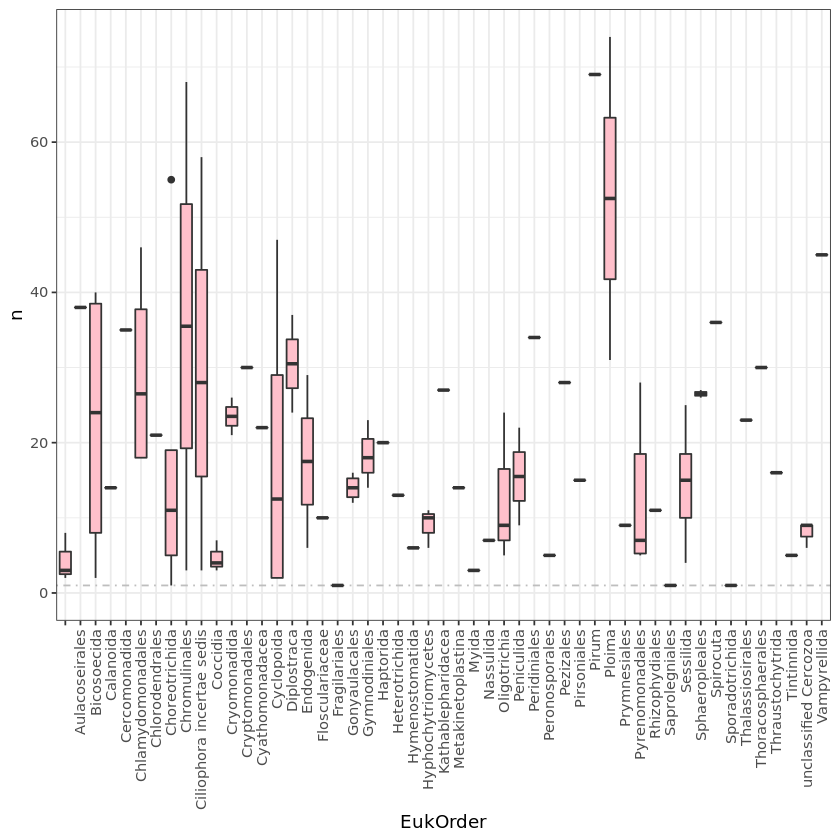

In [26]:
cutoff=0.3
bact_euk_only = significant_correlations %>% dplyr::full_join(corr_coefs) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter(CorrCoef > 0) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Class,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Class1"="Class","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Class,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Class2"="Class","Domain2"="Domain","Phylum2"="Phylum")) 

total_partners = bact_euk_only %>%
    #dplyr::filter(CorrCoef > 0.5) %>%
    dplyr::mutate(Bacterium = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                               TRUE ~ Seq2),
                  Eukaryote = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                               TRUE ~ Seq2),
                  EukPhylum = dplyr::case_when(Domain1 == "Eukaryota" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  EukClass = dplyr::case_when(Domain1 == "Eukaryota" ~ Class1,
                                               TRUE ~ Class2),
                  EukOrder = dplyr::case_when(Domain1 == "Eukaryota" ~ Order1,
                                               TRUE ~ Order2),
                  BacPhylum = dplyr::case_when(Domain1 == "Bacteria" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  BacOrder = dplyr::case_when(Domain1 == "Bacteria" ~ Order1,
                                               TRUE ~ Order2),
                  BacClass = dplyr::case_when(Domain1 == "Bacteria" ~ Class1,
                                               TRUE ~ Class2),
                  Connection = dplyr::case_when((CorrCoef < cutoff)|(Corrected >= 0.05) ~ "<0.4",
                                                CorrCoef <= 0.5 ~ "<=0.5",
                                                CorrCoef <= 0.6 ~ "<=0.6",
                                                CorrCoef <= 0.7 ~ "<=0.7",
                                                CorrCoef <= 0.8 ~ "<=0.8",
                                                CorrCoef <= 0.9 ~ "<=0.9",
                                                CorrCoef <= 1 ~ "<=1"),
                  DichConnection = dplyr::case_when((CorrCoef < cutoff)|(Corrected >= 0.05) ~ "No",
                                                    TRUE ~ "Yes")) %>%
    dplyr::distinct(Bacterium,Eukaryote,.keep_all=TRUE) %>%
    dplyr::filter(DichConnection == "Yes") %>%
    dplyr::group_by(Eukaryote,EukClass,EukOrder,EukPhylum) %>% tally() %>% arrange(desc(n))
head(total_partners)
ggplot(total_partners) + 
    geom_hline(aes(yintercept=1),linetype="dotdash",color="gray") + 
    geom_boxplot(aes(x=EukOrder,y=n),fill="pink") + 
    theme_bw() +                                 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    ylim(c(0,max(total_partners$n)))


Joining, by = c("Seq1", "Seq2")
Warning message:
“Removed 293 rows containing non-finite values (stat_count).”


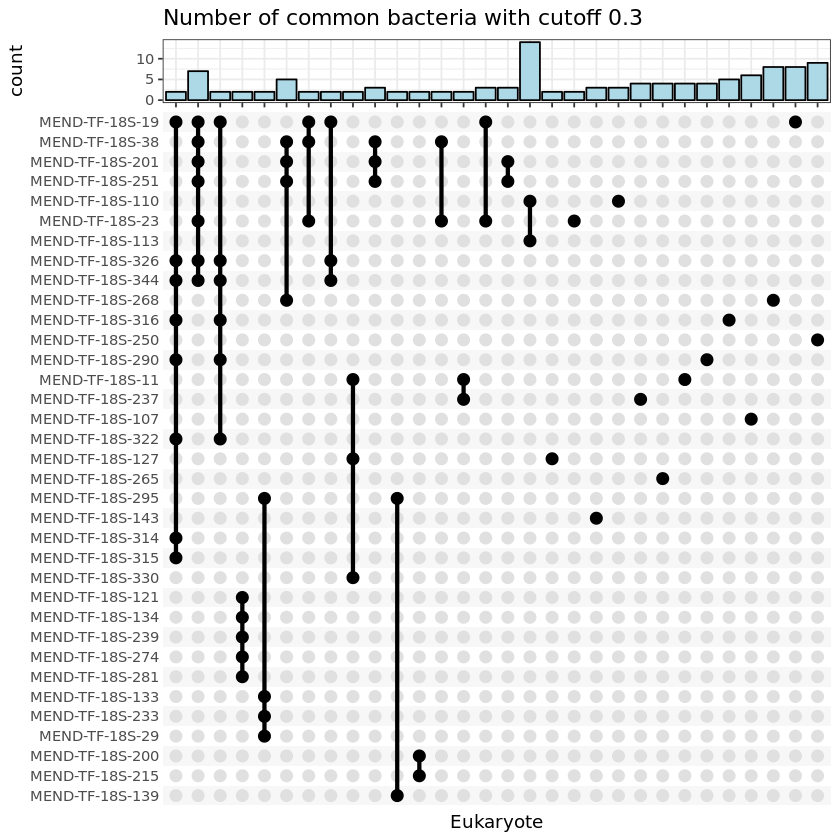

In [27]:
bact_euk_only = significant_correlations %>% dplyr::full_join(corr_coefs) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter(CorrCoef > 0) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Class,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Class1"="Class","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Class,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Class2"="Class","Domain2"="Domain","Phylum2"="Phylum")) 

cutoff = 0.3
upsetbact <- bact_euk_only %>%
    #dplyr::filter(CorrCoef > 0.5) %>%
    dplyr::mutate(Bacterium = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                               TRUE ~ Seq2),
                  Eukaryote = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                               TRUE ~ Seq2),
                  EukPhylum = dplyr::case_when(Domain1 == "Eukaryota" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  BacPhylum = dplyr::case_when(Domain1 == "Bacteria" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  BacOrder = dplyr::case_when(Domain1 == "Bacteria" ~ Order1,
                                               TRUE ~ Order2),
                  BacClass = dplyr::case_when(Domain1 == "Bacteria" ~ Class1,
                                               TRUE ~ Class2),
                  Connection = dplyr::case_when((CorrCoef < cutoff)|(Corrected >= 0.05) ~ "<0.4",
                                                CorrCoef <= 0.5 ~ "<=0.5",
                                                CorrCoef <= 0.6 ~ "<=0.6",
                                                CorrCoef <= 0.7 ~ "<=0.7",
                                                CorrCoef <= 0.8 ~ "<=0.8",
                                                CorrCoef <= 0.9 ~ "<=0.9",
                                                CorrCoef <= 1 ~ "<=1"),
                  DichConnection = dplyr::case_when((CorrCoef < cutoff)|(Corrected >= 0.05) ~ "No",
                                                    TRUE ~ "Yes")) %>%
    dplyr::distinct(Bacterium,Eukaryote,.keep_all=TRUE) %>%
    dplyr::group_by(Eukaryote,EukPhylum,BacPhylum,BacOrder,BacClass,DichConnection) %>%
    dplyr::filter((Corrected < 0.05)&(CorrCoef > cutoff)) %>%
    dplyr::group_by(Bacterium) %>% dplyr::summarize(NumCommonPartners=length(unique(Eukaryote)),
                                                    Eukaryote=list(unique(Eukaryote)),
                                                    EukPhylum=list(unique(EukPhylum)),
                                                    BacPhylum=list(unique(BacPhylum)),
                                                    BacOrder=list(unique(BacOrder)),
                                                    BacClass=list(unique(BacClass)))

upsetbact %>%
  ggplot(aes(x=Eukaryote)) + theme_bw() +
    geom_bar(fill="light blue",color="black") +
    scale_x_upset(n_intersections = 30,order_by = "degree",reverse=TRUE) + 
    ggtitle(paste0("Number of common bacteria with cutoff ", cutoff))

Joining, by = c("Seq1", "Seq2")

Warning message:
“Removed 75 rows containing missing values (geom_text).”


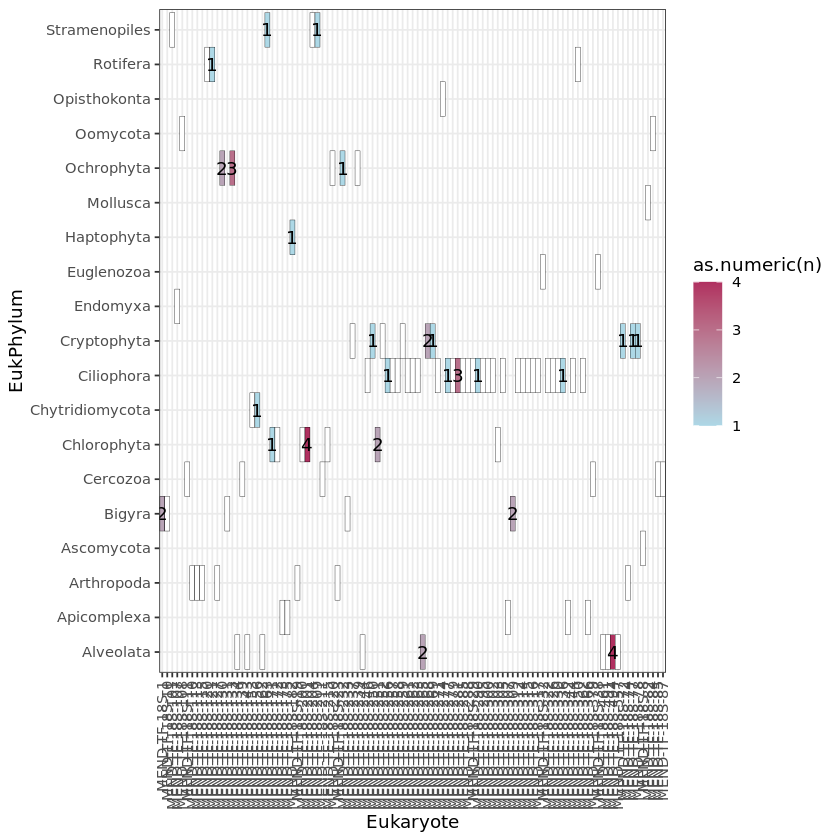

In [51]:
bact_euk_only = significant_correlations %>% dplyr::full_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    #dplyr::filter(CorrCoef > 0) %>%
    #dplyr::filter(Corrected < 0.05) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) 

filtered = bact_euk_only %>%
    #dplyr::filter(CorrCoef > 0.5) %>%
    dplyr::mutate(Bacterium = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                               TRUE ~ Seq2),
                  Eukaryote = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                               TRUE ~ Seq2),
                  EukPhylum = dplyr::case_when(Domain1 == "Eukaryota" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  Connection = dplyr::case_when((CorrCoef < 0.4)|(Corrected >= 0.05) ~ "<0.4",
                                                CorrCoef <= 0.5 ~ "<=0.5",
                                                CorrCoef <= 0.6 ~ "<=0.6",
                                                CorrCoef <= 0.7 ~ "<=0.7",
                                                CorrCoef <= 0.8 ~ "<=0.8",
                                                CorrCoef <= 0.9 ~ "<=0.9",
                                                CorrCoef <= 1 ~ "<=1"),
                  DichConnection = dplyr::case_when((CorrCoef < 0.6)|(Corrected >= 0.05) ~ "No",
                                                    TRUE ~ "Yes")) %>%
    dplyr::distinct(Bacterium,Eukaryote,.keep_all=TRUE) %>%
    dplyr::group_by(Eukaryote,EukPhylum,DichConnection) %>% dplyr::tally() %>%
    tidyr::pivot_wider(names_from=DichConnection,values_from=n,id_cols=c("Eukaryote","EukPhylum")) %>%
    dplyr::mutate(fract=Yes/(Yes+No),n=Yes)
                  #dplyr::case_when(!is.na(Yes) ~ as.character(Yes),
                  #                                      TRUE ~ "0"))
ggplot(filtered) + geom_tile(aes(x=Eukaryote, fill=as.numeric(n), y = EukPhylum),color="black") +
    geom_text(aes(x=Eukaryote, label=n, y = EukPhylum))+
    theme_bw() +                                 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    scale_fill_gradient(low="light blue",high="maroon",na.value="white") 

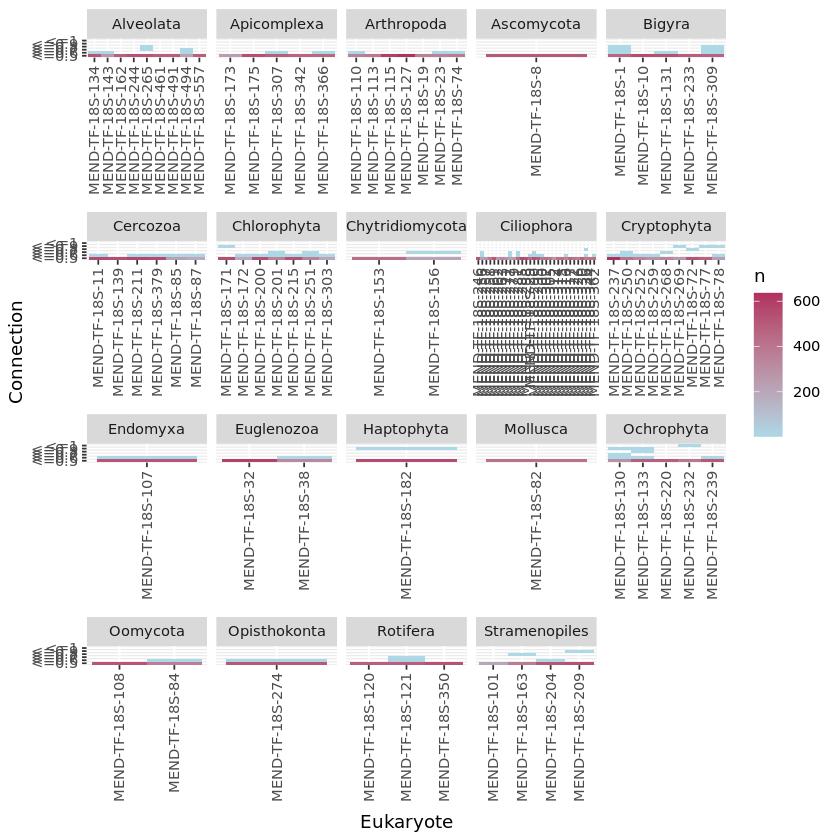

In [184]:
ggplot(alluvial_df) + geom_tile(aes(x=Eukaryote, fill=n, y = Connection)) +                                 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    scale_fill_gradient(low="light blue",high="maroon") + facet_wrap(~EukPhylum,scales="free_x")

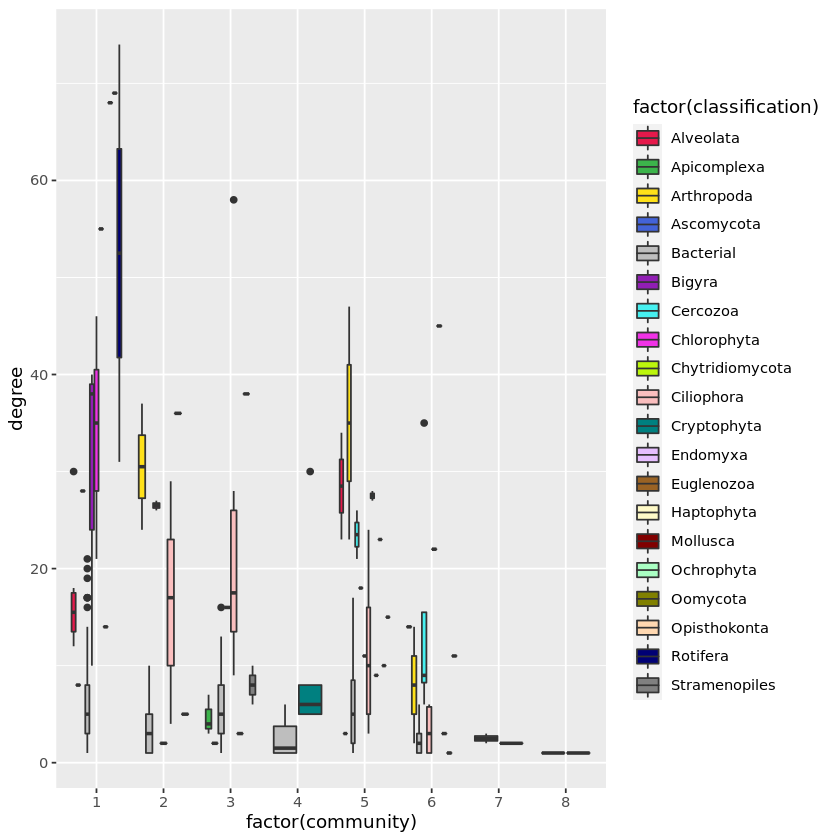

In [52]:
ggplot(layout_gr) + geom_boxplot(aes(x = factor(community), y = degree, fill = factor(classification), 
                                     group = paste0(classification,community))) +
    scale_fill_manual(values=phylum_distinct_cols)

In [81]:
unique(layout_gr$classification)

[1] "Bigyra"          "Arthropoda"      "Ciliophora"      "Euglenozoa"     
 [5] "Cryptophyta"     "Mollusca"        "Oomycota"        "Cercozoa"       
 [9] "Rotifera"        "Ochrophyta"      "Alveolata"       "Chytridiomycota"
[13] "Stramenopiles"   "Chlorophyta"     "Haptophyta"      "Ascomycota"     
[17] "Endomyxa"        "Opisthokonta"    "Apicomplexa"     "Bacterial"

List of 10
 $ axis.title.x    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.title.y    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text.x     : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text.y     : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.ticks      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.background: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.border    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.grid.major: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.grid.minor: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ plot.background : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi T

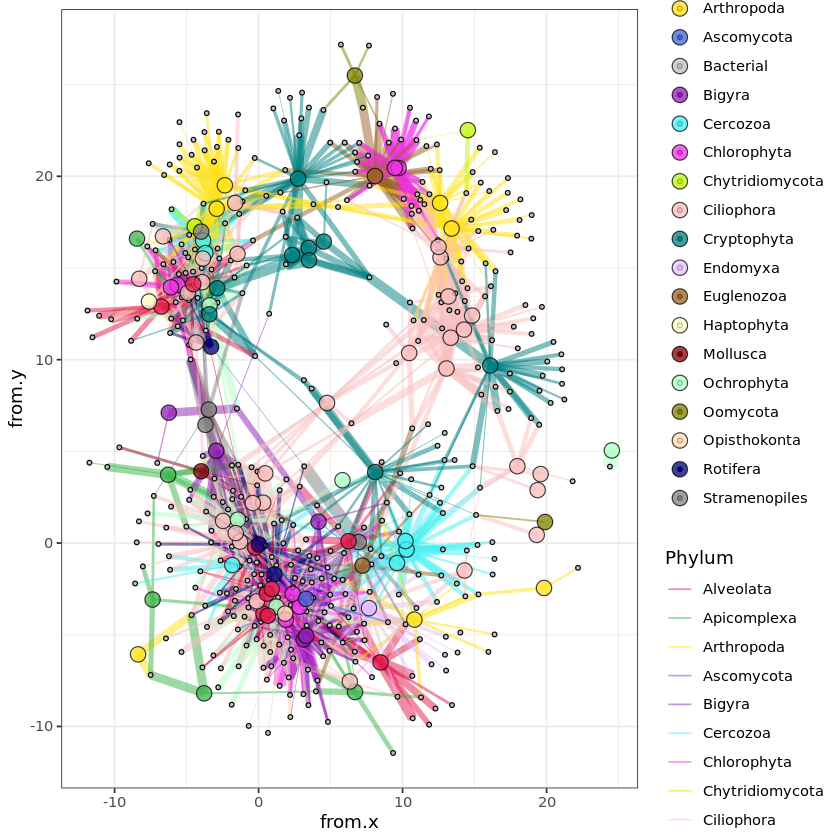

In [53]:

distinct_cols=c("#bc6c8f",
"#78b542",
"#bb5cc2",
"#5fc08a",
"#cf447f",
"#398c6b",
"#d04546",
"#649ed5",
"#ca6528",
"#746dc8",
"#caa342",
"#c07a55","pink","red","turquoise",
"#747e35","grey50","orange")
distinct_cols=c("#458034",
"#c46be1",
"#69c957",
"#8151c2",
"#b0bf33",
"#5c71df",
"#4da02e",
"#d84cb1",
"#46bd76",
"#a3459d",
"#829f34",
"#d44385",
"#42c9b2",
"#da3d5c",
"#3db9cc",
"#d64a2f",
"#519ad3",
"#dd9736",
"#5b5ea3",
"#c0aa41",
"#c086d4",
"#5c6922",
"#9096dd",
"#c3632d",
"#68b78a",
"#984a74",
"#a3bb71",
"#de83b2",
"#367d4c",
"#a54646",
"#2b7f63",
"#df7d78",
"#8e8d47",
"#d99c6c",
"#8d642a")
ggplot() +
    geom_segment(data=edge_df %>%
                 dplyr::filter(weight > 0),aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef,col=EukPhylum),
                 #colour="black",
                 alpha=0.5) +
        scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        geom_point(data=layout_gr%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=layout_gr%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=4,pch=21,alpha=0.75) +
        #geom_label(data=layout_gr%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
        #                              label=Order),
        #                              #label=paste(classification,Order,sep="/")),
        #                              size=1,
        #          alpha=0.5) + 
        theme_bw() +
        #scale_shape(name = "", solid = TRUE, breaks = c("euk","prok"), labels = c("Eukaryote","Bacteria")) + 
        #scale_color_manual(name = "Community", values = palette) + 
        new_scale_color() +
        scale_color_manual(name = "Community", values = distinct_cols) + 
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        #scale_size(range = c(0, 1),labels=c("0.7","0.8","0.9"),breaks=c(0.7,0.8,0.9),name="") + 
        scale_size(range = c(0, 4),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") 


        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank())
#ggsave("eukproknetwork_tpm.png",width=15,height=10,units="in")
#ggsave("eukproknetwork_all_links.png",width=15,height=10,units="in")
ggsave("eukproknetwork_bipartite.png",width=10,height=8,units="in")

## Let's try an alluvial plot

Joining, by = c("Seq1", "Seq2")



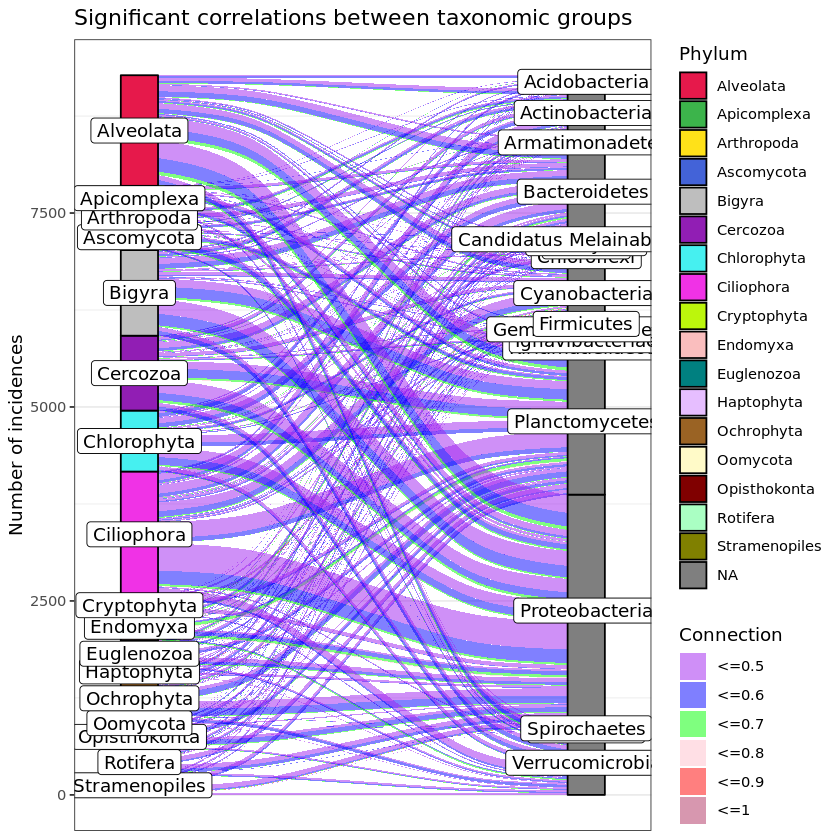

In [176]:
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

bact_euk_only = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter(CorrCoef > 0) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Bacteria" ~ Order1,
                                           TRUE ~ Seq1),
                  Seq2 = dplyr::case_when(Domain2 == "Bacteria" ~ Order2,
                                           TRUE ~ Seq2))

alluvial_df = bact_euk_only %>%
    #dplyr::filter(CorrCoef > 0.5) %>%
    dplyr::mutate(Bacterium = dplyr::case_when(Domain1 == "Bacteria" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  Eukaryote = dplyr::case_when(Domain1 == "Eukaryota" ~ Phylum1,
                                               TRUE ~ Phylum2),
                  Connection = dplyr::case_when(CorrCoef <= 0.5 ~ "<=0.5",
                                                CorrCoef <= 0.6 ~ "<=0.6",
                                                CorrCoef <= 0.7 ~ "<=0.7",
                                                CorrCoef <= 0.8 ~ "<=0.8",
                                                CorrCoef <= 0.9 ~ "<=0.9",
                                                CorrCoef <= 1 ~ "<=1")) %>%
    dplyr::group_by(Bacterium,Eukaryote,Connection) %>% dplyr::tally()

ggplot(alluvial_df,
       aes(y = n, axis1 = Eukaryote, axis2 = Bacterium)) +
  geom_alluvium(aes(fill = Connection), width = 1/12) +
  scale_fill_manual(values=c("purple","blue",
                             "green","pink",
                             "red", "maroon"), breaks =c("<=0.5","<=0.6",
                                                         "<=0.7","<=0.8",
                                                         "<=0.9","<=1")) + 
  new_scale_fill() + 
  geom_stratum(aes(fill = Eukaryote), width = 1/12, color = "black") +
  scale_fill_manual(name = "Phylum", values = phylum_distinct_cols) + 
  geom_label(stat = "stratum", aes(label = after_stat(stratum))) +
  scale_x_discrete(expand = c(.05, .05)) + theme_bw() +
  ggtitle("Significant correlations between taxonomic groups") + ylab("Number of incidences")

ggsave("alluvial_plot.png",width=10,height=15,units="in")

In [19]:
significant_correlations %>% dplyr::filter(Seq1==Seq2)

Seq1 Seq2 P.vals PValRank Corrected

## Create separate bacterial network

Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"
Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"
Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"


List of 10
 $ axis.title.x    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.title.y    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text.x     : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text.y     : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.ticks      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.background: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.border    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.grid.major: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.grid.minor: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ plot.background : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi T

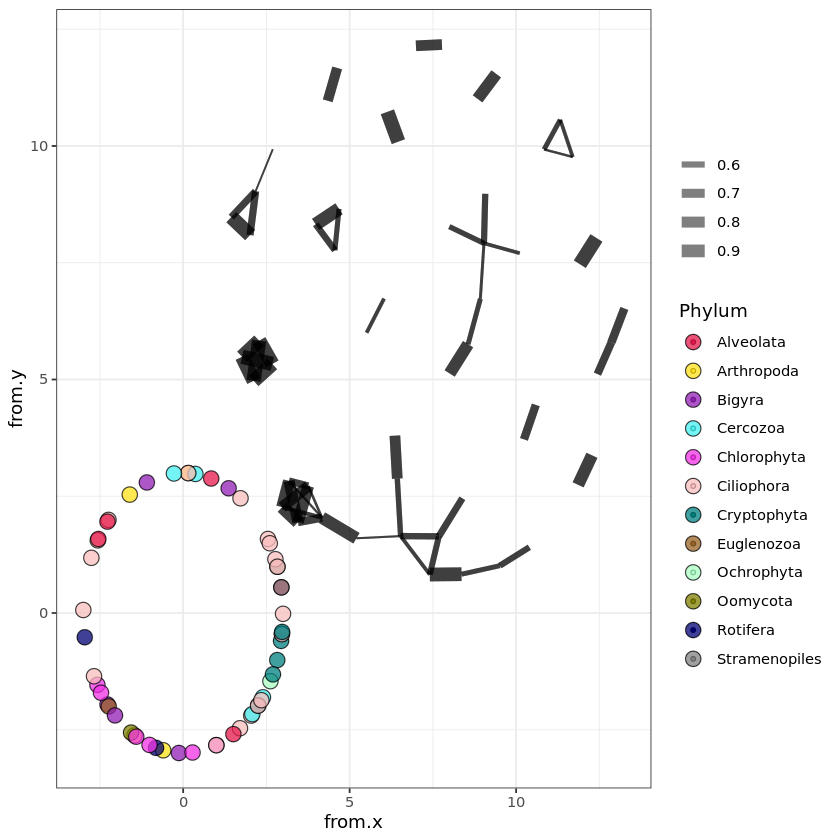

In [28]:
cutoff = 0.5
distinct_cols=c("#458034",
"#c46be1",
"#69c957",
"#8151c2",
"#b0bf33",
"#5c71df",
"#4da02e",
"#d84cb1",
"#46bd76",
"#a3459d",
"#829f34",
"#d44385",
"#42c9b2",
"#da3d5c",
"#3db9cc",
"#d64a2f",
"#519ad3",
"#dd9736",
"#5b5ea3",
"#c0aa41",
"#c086d4",
"#5c6922",
"#9096dd",
"#c3632d",
"#68b78a",
"#984a74",
"#a3bb71",
"#de83b2",
"#367d4c",
"#a54646",
"#2b7f63",
"#df7d78",
"#8e8d47",
"#d99c6c",
"#8d642a")
# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("16S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > cutoff) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Bacteria" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

make_network <- function(e,v,layout="fr") {
    net = network::network(e %>% dplyr::mutate(weight=CorrCoef),multiple=TRUE,loops=TRUE)

    refactored_graph <- graph_from_data_frame(data.frame(net),
                                              directed = FALSE, vertices = NULL)

    V(refactored_graph)$type <- grepl("18S",V(refactored_graph)$name) #the second column of edges is TRUE type

    layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
    if (layout == "circular") {
        layout_gr <- as.data.frame(layout_in_circle(refactored_graph))
    } else if (layout == "bipartite") {
        layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph))
    }
    #layout_gr <- as.data.frame(layout_with_gem(refactored_graph))

    corr_communities <- cluster_louvain(refactored_graph,weight=data.frame(net)$CorrCoef)

    set_vertex_attr(refactored_graph, "clustermembership",
                    index = V(refactored_graph),
                    membership(corr_communities))
    set_vertex_attr(refactored_graph, "classification",
                    index = V(refactored_graph),
                    (v %>% dplyr::right_join(data.frame("Label"=V(refactored_graph)$name)))$Phylum)

    #layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph)) #get.data.frame(refactored_graph) 


    edge_df <- data.frame(net)
    edge_df <- edge_df %>% dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".head"="Label")) %>%
        dplyr::rename(c("Dom1"="Domain")) %>%
        dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".tail"="Label")) %>%
        dplyr::rename(c("Dom2"="Domain"))

    # Add the MAG labels
    #layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
    layout_gr$mag <- V(refactored_graph)$name
    layout_gr$community <- membership(corr_communities)

    # Add the euk-prok labels
    edge_df_inform <- edge_df %>% dplyr::select(.head,Dom1) %>% dplyr::rename(c("mag"=".head","class"="Dom1")) %>%
                        dplyr::bind_rows(edge_df %>% dplyr::select(.tail,Dom2) %>% 
                                         dplyr::rename(c("mag"=".tail","class"="Dom2")))
    layout_gr = layout_gr %>% dplyr::left_join(v,by=c("mag"="Label")) %>%
        dplyr::rename(c("classification"="Phylum")) %>%
        dplyr::mutate(classification=dplyr::case_when(Domain == "Bacteria" ~ "Bacterial",
                                                      TRUE ~ classification))
    #layout_gr$community <- membership(corr_communities)

    layout_gr <- layout_gr %>% 
                        dplyr::mutate("degree" = as.numeric(as.character(igraph::degree(refactored_graph,
                                                                                      v = layout_gr$mag))))

    layout_gr = layout_gr %>% 
                dplyr::select(V1,V2,mag,classification,Domain,Class,Order,community,degree)
    layout_gr <- layout_gr %>% dplyr::distinct()

    edge_df$from.x <- layout_gr$V1[match(edge_df$.head, layout_gr$mag)]  #  match the from locations from the node data.frame we previously connected
    edge_df$from.y <- layout_gr$V2[match(edge_df$.head, layout_gr$mag)]
    edge_df$to.x <- layout_gr$V1[match(edge_df$.tail, layout_gr$mag)]  #  match the to locations from the node data.frame we previously connected
    edge_df$to.y <- layout_gr$V2[match(edge_df$.tail, layout_gr$mag)]

    layout_gr_classes = layout_gr
    return(list(edge_df,layout_gr))
}

returned_frame = make_network(e,v,layout="circular")
bact_edge_frame = returned_frame[[1]]
bact_layout_frame = returned_frame[[2]]

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter((CorrCoef > cutoff))%>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

returned_frame = make_network(e,v)
euk_edge_frame = returned_frame[[1]]
euk_layout_frame = returned_frame[[2]]

all_nodes = c(unique(euk_layout_frame$mag), unique(bact_layout_frame$mag))
# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    #dplyr::filter(Seq1!=Seq2)%>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1)) | 
                  ((Seq1 == Seq2) & (Seq1 %in% all_nodes))) %>%
    #dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > cutoff) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

spacer_euk=max(c(abs(euk_edge_frame$from.x),abs(euk_edge_frame$to.x)))
spacer_bact=max(c(bact_edge_frame$from.x,bact_edge_frame$to.x))

spacer_euk=(max(c(abs(euk_edge_frame$from.x),abs(euk_edge_frame$to.x))))*2
spacer_bact=max(c(abs(bact_edge_frame$from.x),abs(bact_edge_frame$to.x)))

scaling_bact=max(c(abs(bact_edge_frame$from.y),abs(bact_edge_frame$to.y)))
scaling_euk=max(c(abs(euk_edge_frame$from.y),abs(euk_edge_frame$to.y)))

scaling_bact=max(c(abs(bact_edge_frame$from.y),abs(bact_edge_frame$to.y)))
scaling_euk=(max(c(abs(euk_edge_frame$from.y),abs(euk_edge_frame$to.y))) + 
    abs(min(c(euk_edge_frame$from.y,euk_edge_frame$to.y))))*2

spacer_bact_y=max(c(bact_edge_frame$from.y,bact_edge_frame$to.y))

#euk_layout_frame = euk_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_euk)^1.25,V2=V2/scaling_euk)
#bact_layout_frame = bact_layout_frame %>%
#    dplyr::mutate(V1=V1-spacer_bact,V2=V2/scaling_bact)

#euk_layout_frame = euk_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_euk)/spacer_euk,V2=(V2+scaling_euk)/scaling_euk)
#bact_layout_frame = bact_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_bact)/spacer_bact,V2=(V2+scaling_bact)/scaling_bact)

returned_frame = make_network(e,v)
euk_bact_edge_frame = returned_frame[[1]] %>% dplyr::filter((.head %in% all_nodes) & (.tail %in% all_nodes))
#dplyr::filter(.head!=.tail)
euk_bact_layout_frame = returned_frame[[2]]
# circle center for euks & bacteria
h_meas = 0 # x coord of center
k_meas = 0 # y coord of center
# radius for euks
r_euk = 3

# radius for bact
r_bac = 5

euk_bact_layout_frame = euk_bact_layout_frame %>%
    dplyr::group_by(Domain) %>%
    dplyr::mutate(total_x_distance = sqrt((max(V1) - min(V1))^2)) %>%
    dplyr::mutate(mod_V1 = V1 / total_x_distance * 360) %>% # angular measurement
    dplyr::ungroup() %>%
    dplyr::mutate(r = dplyr::case_when(Domain == "Eukaryota" ~ r_euk,
                                       TRUE ~ r_bac),
                  h = h_meas, k = k_meas) %>%
    dplyr::mutate(circle_x = r*cos(mod_V1 * pi / 180) + h_meas,
                  circle_y = r*sin(mod_V1 * pi / 180) + h_meas) %>%
    dplyr::mutate(V1 = circle_x, V2 = circle_y)

euk_layout_frame = euk_layout_frame %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,V1,V2), by = "mag")

bact_layout_frame = bact_layout_frame %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,V1,V2), by = "mag")

euk_bact_edge_frame = euk_bact_edge_frame %>%
    dplyr::select(-from.x,-to.x,-from.y,-to.y) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,circle_x,circle_y,classification),
                     by = c(".head"="mag")) %>%
    dplyr::rename("LinkPhylum"="classification")%>%
    dplyr::mutate(BaseColor="Euk-Bact") %>%
    dplyr::rename(c("from.x"="circle_x","from.y"="circle_y"))%>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,circle_x,circle_y),
                     by = c(".tail"="mag")) %>%
    dplyr::rename(c("to.x"="circle_x","to.y"="circle_y"))

#euk_bact_edge_frame = euk_bact_edge_frame %>%
#    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
#    dplyr::left_join(euk_layout_frame%>%dplyr::rename("LinkPhylum"="classification")%>%
#                     dplyr::mutate(BaseColor="Euk-Bact"),
#                     by=c(".tail"="mag")) %>%
#    dplyr::mutate(to.x=V1,to.y=V2) %>%
#    dplyr::select(-V1,-V2,-community) %>%
#    dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
#    dplyr::mutate(from.x=V1,from.y=V2)
bact_communities=na.omit(unique(euk_bact_edge_frame$community))
bact_layout_frame = bact_layout_frame #%>% dplyr::filter(community %in% bact_communities)
bact_edge_frame = bact_edge_frame %>% dplyr::filter((.head %in% bact_layout_frame$mag) | 
                                                    (.tail %in% bact_layout_frame$mag))

combined_edge_frame = bact_edge_frame %>%
    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
    dplyr::left_join(bact_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".tail"="mag")) %>%
    dplyr::mutate(to.x=V1,to.y=V2) %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(bact_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".head"="mag")) %>%
    dplyr::mutate(from.x=V1,from.y=V2) %>%
    dplyr::select(-V1,-V2) %>%
    #dplyr::mutate(from.x=from.x-spacer_bact,to.x=to.x-spacer_bact,
    #              from.y=from.y/scaling_bact,to.y=to.y/scaling_bact) %>%
    dplyr::bind_rows(euk_edge_frame %>%
    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
    dplyr::left_join(euk_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".tail"="mag")) %>%
    dplyr::mutate(to.x=V1,to.y=V2)%>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".head"="mag")) %>%
    dplyr::mutate(from.x=V1,from.y=V2)) %>%
    dplyr::select(-V1,-V2) %>%
    #dplyr::mutate(from.x=(from.x+spacer_euk)^1.25,to.x=(to.x+spacer_euk)^1.25,
    #              from.y=from.y/scaling_euk,to.y=to.y/scaling_euk)) %>%
    dplyr::bind_rows(euk_bact_edge_frame %>% 
                     dplyr::select(.head,.tail,weight,Phylum1,CorrCoef,BaseColor,
                                   from.x,from.y,to.x,to.y,LinkPhylum))# %>%
                     #dplyr::mutate(from.x=from.x-spacer_bact,to.x=to.x+spacer_euk,
                     #              from.y=from.y/spacer_bact,to.y=to.y/spacer_euk))


ggplot() +
    geom_segment(data=euk_edge_frame %>%
                 dplyr::filter(weight > 0),aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),
                 alpha=0.5) +
        scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=4,pch=21,alpha=0.75) +
        theme_bw() +
        new_scale_color() +
        scale_color_manual(name = "Community", values = distinct_cols) + 
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        scale_size(range = c(0, 4),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") 


        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank())

In [29]:
# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("16S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > cutoff) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Bacteria" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

make_network <- function(e,v,layout="fr") {
    net = network::network(e %>% dplyr::mutate(weight=CorrCoef),multiple=TRUE,loops=TRUE)

    refactored_graph <- graph_from_data_frame(data.frame(net),
                                              directed = FALSE, vertices = NULL)

    V(refactored_graph)$type <- grepl("18S",V(refactored_graph)$name) #the second column of edges is TRUE type

    layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
    if (layout == "circular") {
        layout_gr <- as.data.frame(layout_in_circle(refactored_graph))
    } else if (layout == "bipartite") {
        layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph))
    }
    #layout_gr <- as.data.frame(layout_with_gem(refactored_graph))

    corr_communities <- cluster_louvain(refactored_graph,weight=data.frame(net)$CorrCoef)

    set_vertex_attr(refactored_graph, "clustermembership",
                    index = V(refactored_graph),
                    membership(corr_communities))
    set_vertex_attr(refactored_graph, "classification",
                    index = V(refactored_graph),
                    (v %>% dplyr::right_join(data.frame("Label"=V(refactored_graph)$name)))$Phylum)

    #layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph)) #get.data.frame(refactored_graph) 


    edge_df <- data.frame(net)
    edge_df <- edge_df %>% dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".head"="Label")) %>%
        dplyr::rename(c("Dom1"="Domain")) %>%
        dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".tail"="Label")) %>%
        dplyr::rename(c("Dom2"="Domain"))

    # Add the MAG labels
    #layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
    layout_gr$mag <- V(refactored_graph)$name
    layout_gr$community <- membership(corr_communities)

    # Add the euk-prok labels
    edge_df_inform <- edge_df %>% dplyr::select(.head,Dom1) %>% dplyr::rename(c("mag"=".head","class"="Dom1")) %>%
                        dplyr::bind_rows(edge_df %>% dplyr::select(.tail,Dom2) %>% 
                                         dplyr::rename(c("mag"=".tail","class"="Dom2")))
    layout_gr = layout_gr %>% dplyr::left_join(v,by=c("mag"="Label")) %>%
        dplyr::rename(c("classification"="Phylum")) %>%
        dplyr::mutate(classification=dplyr::case_when(Domain == "Bacteria" ~ "Bacterial",
                                                      TRUE ~ classification))
    #layout_gr$community <- membership(corr_communities)

    layout_gr <- layout_gr %>% 
                        dplyr::mutate("degree" = as.numeric(as.character(igraph::degree(refactored_graph,
                                                                                      v = layout_gr$mag))))

    layout_gr = layout_gr %>% 
                dplyr::select(V1,V2,mag,classification,Domain,Class,Order,community,degree)
    layout_gr <- layout_gr %>% dplyr::distinct()

    edge_df$from.x <- layout_gr$V1[match(edge_df$.head, layout_gr$mag)]  #  match the from locations from the node data.frame we previously connected
    edge_df$from.y <- layout_gr$V2[match(edge_df$.head, layout_gr$mag)]
    edge_df$to.x <- layout_gr$V1[match(edge_df$.tail, layout_gr$mag)]  #  match the to locations from the node data.frame we previously connected
    edge_df$to.y <- layout_gr$V2[match(edge_df$.tail, layout_gr$mag)]

    layout_gr_classes = layout_gr
    return(list(edge_df,layout_gr))
}

returned_frame = make_network(e,v,layout="circular")
bact_edge_frame = returned_frame[[1]]
bact_layout_frame = returned_frame[[2]]

Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"


In [30]:
head(bact_layout_frame)

V1        V2         mag             classification Domain   Class           
1 1.0000000 0.00000000 MEND-TF-16S-28  Bacterial      Bacteria Bacilli         
2 0.9998837 0.01524986 MEND-TF-16S-83  Bacterial      Bacteria Spirochaetia    
3 0.9995349 0.03049617 MEND-TF-16S-103 Bacterial      Bacteria Verrucomicrobiae
4 0.9989536 0.04573539 MEND-TF-16S-108 Bacterial      Bacteria Spartobacteria  
5 0.9981400 0.06096397 MEND-TF-16S-109 Bacterial      Bacteria Verrucomicrobiae
6 0.9970942 0.07617838 MEND-TF-16S-114 Bacterial      Bacteria Spartobacteria  
  Order              community degree
1 Bacillales         1          2    
2 Spirochaetales     2          8    
3 Verrucomicrobiales 3          6    
4 Chthoniobacterales 4         32    
5 Verrucomicrobiales 5          4    
6 Chthoniobacterales 4         34

In [31]:
head( bact_layout_frame %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,V1,V2), by = "mag"))

mag             classification Domain   Class            Order             
1 MEND-TF-16S-28  Bacterial      Bacteria Bacilli          Bacillales        
2 MEND-TF-16S-83  Bacterial      Bacteria Spirochaetia     Spirochaetales    
3 MEND-TF-16S-103 Bacterial      Bacteria Verrucomicrobiae Verrucomicrobiales
4 MEND-TF-16S-108 Bacterial      Bacteria Spartobacteria   Chthoniobacterales
5 MEND-TF-16S-109 Bacterial      Bacteria Verrucomicrobiae Verrucomicrobiales
6 MEND-TF-16S-114 Bacterial      Bacteria Spartobacteria   Chthoniobacterales
  community degree V1           V2       
1 1          2      0.001524011 -5.000000
2 2          8      3.548399902 -3.522621
3 3          6      4.312454631 -2.530363
4 4         32     -1.971540376  4.594892
5 5          4      4.051959279  2.929441
6 4         34      4.339146713 -2.484312

In [32]:
# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    #dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > cutoff) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

returned_frame = make_network(e,v,layout="bipartite")
euk_bact_edge_frame = returned_frame[[1]]
euk_bact_layout_frame = returned_frame[[2]]

Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"


In [149]:
#total_distance_x = sqrt((max(euk_bact_edge_frame$to.x))^2 - (min(euk_bact_edge_frame$from.x))^2)
#euk_bact_edge_frame$mod.to.x = euk_bact_edge_frame$to.x / total_distance_x * 360 # angular measurement
# circle center for euks & bacteria
h_meas = 0 # x coord of center
k_meas = 0 # y coord of center
# radius for euks
r_euk = 3

# radius for bact
r_bac = 10

euk_bact_layout_frame = euk_bact_layout_frame %>%
    dplyr::group_by(Domain) %>%
    dplyr::mutate(total_x_distance = sqrt((max(V1))^2 - (min(V1))^2)) %>%
    dplyr::mutate(mod_V1 = V1 / total_x_distance * 360) %>% # angular measurement
    dplyr::ungroup() %>%
    dplyr::mutate(r = dplyr::case_when(Domain == "Eukaryota" ~ r_euk,
                                       TRUE ~ r_bac),
                  h = h_meas, k = k_meas) %>%
    dplyr::mutate(circle_x = r*cos(mod_V1 * pi / 180) + h_meas,
                  circle_y = r*sin(mod_V1 * pi / 180) + h_meas)

euk_bact_edge_frame = euk_bact_edge_frame %>%
    dplyr::select(-from.x,-to.x,-from.y,-to.y) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,circle_x,circle_y),
                     by = c(".head"="mag")) %>%
    dplyr::rename(c("from.x"="circle_x","from.y"="circle_y"))%>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,circle_x,circle_y),
                     by = c(".tail"="mag")) %>%
    dplyr::rename(c("to.x"="circle_x","to.y"="circle_y"))

#x = r*cos(t) + h
#y = r*sin(t) + k

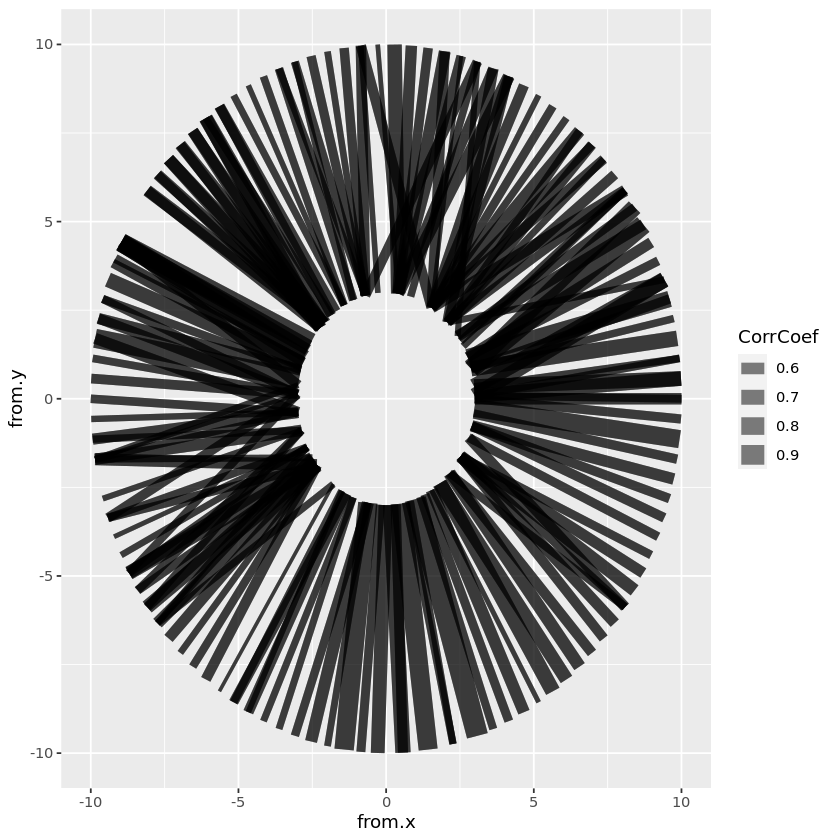

In [150]:
ggplot(euk_bact_edge_frame) + 
    geom_segment(aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),
                 alpha=0.5)

In [151]:
div_fact_x = 360/(sqrt((max(euk_bact_edge_frame$to.x))^2 - (min(euk_bact_edge_frame$from.x))^2))
euk_bact_edge_frame = (sqrt((max(euk_bact_edge_frame$to.x))^2 - (min(euk_bact_edge_frame$from.x))^2))/360

Warning message in sqrt((max(euk_bact_edge_frame$to.x))^2 - (min(euk_bact_edge_frame$from.x))^2):
“NaNs produced”
Warning message in sqrt((max(euk_bact_edge_frame$to.x))^2 - (min(euk_bact_edge_frame$from.x))^2):
“NaNs produced”


Warning message:
“Removed 140 rows containing missing values (geom_segment).”


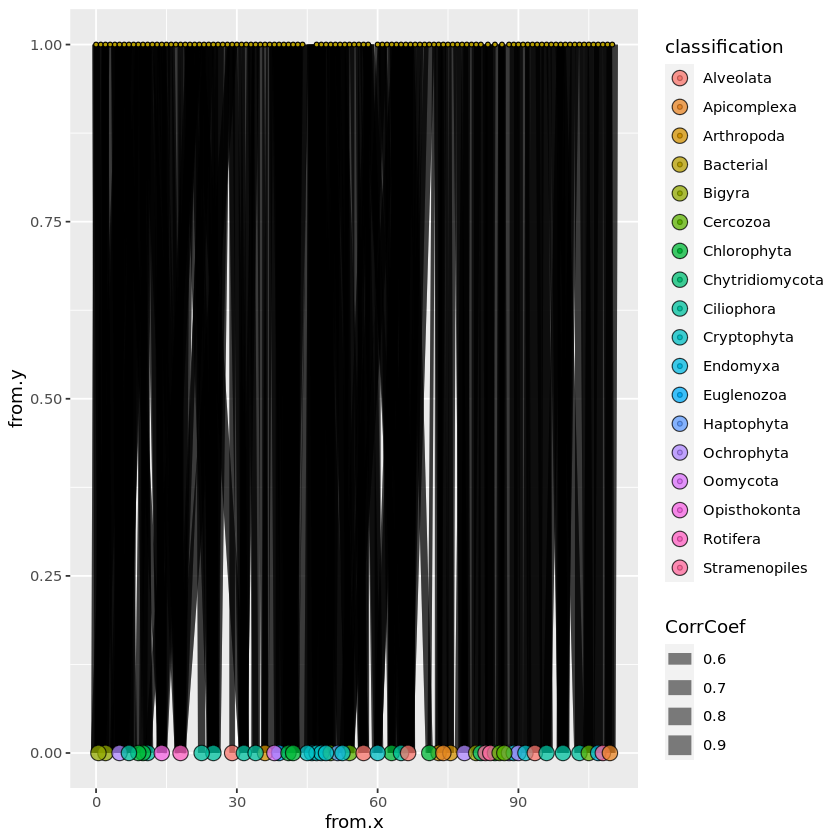

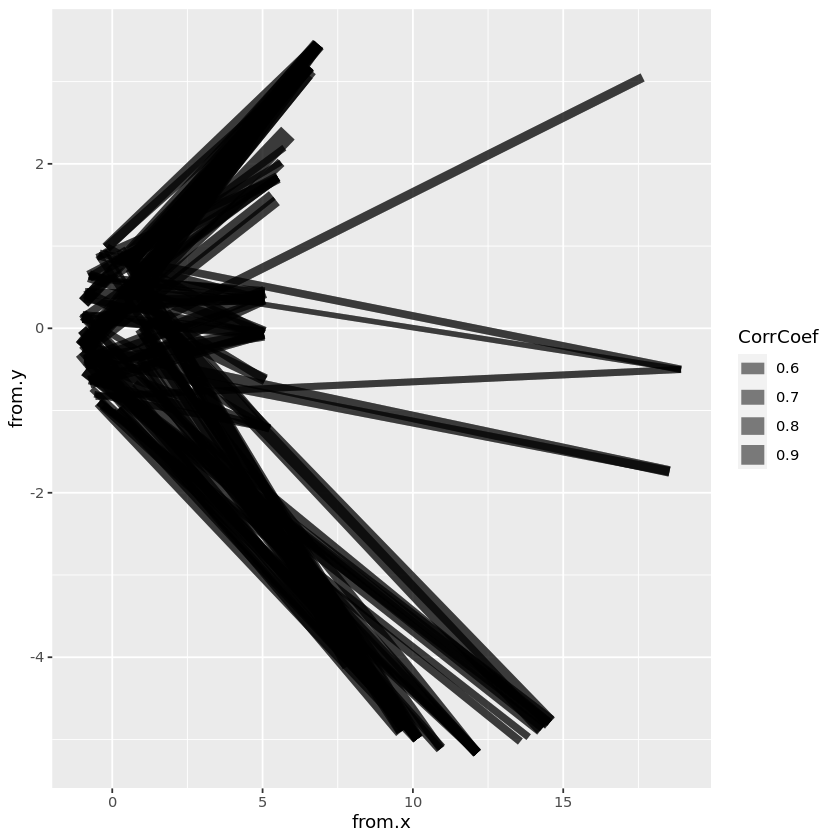

In [152]:

euk_bact_edge_frame = returned_frame[[1]]
euk_bact_layout_frame = returned_frame[[2]]

euk_bact_edge_frame_fixer = euk_bact_edge_frame %>%
    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
    dplyr::left_join(euk_layout_frame,by=c(".tail"="mag")) %>%
    dplyr::mutate(to.x=V1,to.y=V2) %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
    dplyr::mutate(from.x=V1,from.y=V2) 

ggplot() +
    geom_segment(data= euk_bact_edge_frame %>%
                 dplyr::filter(weight > 0),aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),
                 alpha=0.5)+
        scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        geom_point(data=euk_bact_layout_frame%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=euk_bact_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=4,pch=21,alpha=0.75) 

ggplot(euk_bact_edge_frame_fixer)  +
    geom_segment(data= euk_bact_edge_frame_fixer %>%
                 dplyr::filter(weight > 0),aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),
                 alpha=0.5)

In [153]:
data_tree_bact %>% dplyr::filter(Label%in%c("MEND-TF-16S-997","MEND-TF-16S-998",
                                            "MEND-TF-16S-981","MEND-TF-16S-1033",
                                            "MEND-TF-16S-1008","MEND-TF-16S-987",
                                            "MEND-TF-16S-802")) %>%
    dplyr::select(Label,Phylum,Class,Order,Family,Genus)

Label            Phylum         Class               Order           
1 MEND-TF-16S-1008 Cyanobacteria                      Synechococcales 
2 MEND-TF-16S-981  Cyanobacteria                      Nostocales      
3 MEND-TF-16S-997  Cyanobacteria                      Nostocales      
4 MEND-TF-16S-998  Cyanobacteria                      Pleurocapsales  
5 MEND-TF-16S-802  Actinobacteria Acidimicrobiia      Acidimicrobiales
6 MEND-TF-16S-987  Proteobacteria Alphaproteobacteria Sphingomonadales
7 MEND-TF-16S-1033 Proteobacteria Alphaproteobacteria Sphingomonadales
  Family               Genus           
1 Chamaesiphonaceae    Chamaesiphon    
2 Symphyonemataceae    Loriellopsis    
3 Nostocaceae          Anabaena        
4 Dermocarpellaceae    Stanieria       
5 Ilumatobacteraceae   Ilumatobacter   
6 Sphingomonadaceae    Sphingorhabdus  
7 Sphingosinicellaceae Polymorphobacter

In [154]:
data_tree_euk %>% dplyr::filter(Label%in% 
                                 unique((combined_edge_frame %>% 
                                         dplyr::filter((LinkPhylum=="Cryptophyta")))$.tail)) %>%
    dplyr::select(Label,Phylum,Class,Order,Family,Genus)

Label           Phylum      Class         Order             
1 MEND-TF-18S-269 Cryptophyta Cryptophyceae Pyrenomonadales   
2 MEND-TF-18S-252 Cryptophyta Cryptophyceae Kathablepharidacea
3 MEND-TF-18S-259 Cryptophyta Cryptophyceae Pyrenomonadales   
4 MEND-TF-18S-72  Cryptophyta Cryptophyceae Pyrenomonadales   
5 MEND-TF-18S-77  Cryptophyta Cryptophyceae Pyrenomonadales   
6 MEND-TF-18S-78  Cryptophyta Cryptophyceae Pyrenomonadales   
  Family             Genus       
1 Geminigeraceae     Geminigera  
2 Katablepharidaceae Leucocryptos
3 Geminigeraceae     Geminigera  
4 Geminigeraceae     Teleaulax   
5 Geminigeraceae     Teleaulax   
6 Geminigeraceae     Teleaulax

In [155]:
unique(combined_edge_frame$LinkPhylum)

[1] NA              "Bacterial"     "Bigyra"        "Arthropoda"   
 [5] "Ciliophora"    "Euglenozoa"    "Cryptophyta"   "Oomycota"     
 [9] "Cercozoa"      "Rotifera"      "Ochrophyta"    "Alveolata"    
[13] "Stramenopiles" "Chlorophyta"

In [156]:
combined_edge_frame %>% dplyr::filter((LinkPhylum=="Cercozoa")) %>%# & (grepl("16S",.head)))) %>%
    dplyr::distinct(.head,.tail,CorrCoef) %>%
    dplyr::group_by(.head,.tail,CorrCoef) %>% tally() %>%
    dplyr::left_join(data_tree_bact %>%
    dplyr::select(Label,Phylum,Class,Order,Family,Genus),by=c(".head"="Label"))

.head           .tail           CorrCoef n Phylum Class Order Family Genus
1 MEND-TF-18S-211 MEND-TF-18S-211 1        1 NA     NA    NA    NA     NA   
2 MEND-TF-18S-379 MEND-TF-18S-379 1        1 NA     NA    NA    NA     NA   
3 MEND-TF-18S-85  MEND-TF-18S-85  1        1 NA     NA    NA    NA     NA   
4 MEND-TF-18S-87  MEND-TF-18S-87  1        1 NA     NA    NA    NA     NA

In [43]:
combined_edge_frame[!duplicated(cbind(pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail), 
                                      pmax(combined_edge_frame$.head,
                                           combined_edge_frame$.tail))),]  %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk")) %>% 
    dplyr::select(.head,.tail,P.vals,weight,CorrCoef,Domain1,Phylum1,Order1,Domain2,Phylum2,Order2,BaseColor) %>%
    dplyr::rename("Seq1"=.head,"Seq2"=.tail,"Link"=BaseColor) %>%
    dplyr::filter(Seq1!=Seq2)

Seq1             Seq2            P.vals weight    CorrCoef  Domain1 
1    MEND-TF-16S-971  MEND-TF-16S-28  0      0.5529910 0.5529910 Bacteria
2    MEND-TF-16S-1008 MEND-TF-16S-83  0      0.9198013 0.9198013 Bacteria
3    MEND-TF-16S-637  MEND-TF-16S-83  0      0.5200859 0.5200859 Bacteria
4    MEND-TF-16S-972  MEND-TF-16S-83  0      0.5193511 0.5193511 Bacteria
5    MEND-TF-16S-1000 MEND-TF-16S-83  0      0.5058966 0.5058966 Bacteria
6    MEND-TF-16S-982  MEND-TF-16S-103 0      0.5398113 0.5398113 Bacteria
7    MEND-TF-16S-1008 MEND-TF-16S-103 0      0.5609161 0.5609161 Bacteria
8    MEND-TF-16S-1175 MEND-TF-16S-103 0      0.5135372 0.5135372 Bacteria
9    MEND-TF-16S-114  MEND-TF-16S-108 0      0.7882624 0.7882624 Bacteria
10   MEND-TF-16S-373  MEND-TF-16S-108 0      0.5819736 0.5819736 Bacteria
11   MEND-TF-16S-412  MEND-TF-16S-108 0      0.6477295 0.6477295 Bacteria
12   MEND-TF-16S-531  MEND-TF-16S-108 0      0.6382611 0.6382611 Bacteria
13   MEND-TF-16S-534  MEND-TF-16S-108 0      0.5662413 0.5662413 Bacteria
14   MEND-TF-16S-550  MEND-TF-16S-108 0      0.5861536 0.5861536 Bacteria
15   MEND-TF-16S-615  MEND-TF-16S-108 0      0.5775200 0.5775200 Bacteria
16   MEND-TF-16S-651  MEND-TF-16S-108 0      0.6029147 0.6029147 Bacteria
17   MEND-TF-16S-742  MEND-TF-16S-108 0      0.5245160 0.5245160 Bacteria
18   MEND-TF-16S-1014 MEND-TF-16S-108 0      0.5444217 0.5444217 Bacteria
19   MEND-TF-16S-1048 MEND-TF-16S-108 0      0.5745378 0.5745378 Bacteria
20   MEND-TF-16S-1206 MEND-TF-16S-108 0      0.8436594 0.8436594 Bacteria
21   MEND-TF-16S-163  MEND-TF-16S-108 0      0.5190821 0.5190821 Bacteria
22   MEND-TF-16S-733  MEND-TF-16S-108 0      0.5854359 0.5854359 Bacteria
23   MEND-TF-16S-798  MEND-TF-16S-108 0      0.5078714 0.5078714 Bacteria
24   MEND-TF-16S-1597 MEND-TF-16S-108 0      0.5637071 0.5637071 Bacteria
25   MEND-TF-16S-174  MEND-TF-16S-109 0      0.8318730 0.8318730 Bacteria
26   MEND-TF-16S-189  MEND-TF-16S-109 0      0.8123112 0.8123112 Bacteria
27   MEND-TF-16S-373  MEND-TF-16S-114 0      0.5694609 0.5694609 Bacteria
28   MEND-TF-16S-412  MEND-TF-16S-114 0      0.6337606 0.6337606 Bacteria
29   MEND-TF-16S-530  MEND-TF-16S-114 0      0.5280437 0.5280437 Bacteria
30   MEND-TF-16S-531  MEND-TF-16S-114 0      0.6519512 0.6519512 Bacteria
⋮    ⋮                ⋮               ⋮      ⋮         ⋮         ⋮       
2021 MEND-TF-16S-982  MEND-TF-18S-295 NA     0.5600263 0.5600263 NA      
2022 MEND-TF-16S-1238 MEND-TF-18S-295 NA     0.5153695 0.5153695 NA      
2023 MEND-TF-16S-185  MEND-TF-18S-295 NA     0.5338098 0.5338098 NA      
2024 MEND-TF-16S-504  MEND-TF-18S-295 NA     0.5185500 0.5185500 NA      
2025 MEND-TF-16S-1146 MEND-TF-18S-295 NA     0.5496999 0.5496999 NA      
2026 MEND-TF-16S-563  MEND-TF-18S-303 NA     0.5009734 0.5009734 NA      
2027 MEND-TF-16S-806  MEND-TF-18S-303 NA     0.5202795 0.5202795 NA      
2028 MEND-TF-16S-235  MEND-TF-18S-309 NA     0.6800055 0.6800055 NA      
2029 MEND-TF-16S-1050 MEND-TF-18S-309 NA     0.7066951 0.7066951 NA      
2030 MEND-TF-16S-679  MEND-TF-18S-309 NA     0.5275387 0.5275387 NA      
2031 MEND-TF-16S-846  MEND-TF-18S-309 NA     0.5278529 0.5278529 NA      
2032 MEND-TF-16S-987  MEND-TF-18S-316 NA     0.5733808 0.5733808 NA      
2033 MEND-TF-16S-1029 MEND-TF-18S-316 NA     0.5443186 0.5443186 NA      
2034 MEND-TF-16S-311  MEND-TF-18S-494 NA     0.6661688 0.6661688 NA      
2035 MEND-TF-16S-541  MEND-TF-18S-494 NA     0.5324217 0.5324217 NA      
2036 MEND-TF-16S-685  MEND-TF-18S-494 NA     0.6100101 0.6100101 NA      
2037 MEND-TF-16S-769  MEND-TF-18S-494 NA     0.5150411 0.5150411 NA      
2038 MEND-TF-16S-806  MEND-TF-18S-494 NA     0.6068948 0.6068948 NA      
2039 MEND-TF-16S-819  MEND-TF-18S-494 NA     0.5420462 0.5420462 NA      
2040 MEND-TF-16S-1033 MEND-TF-18S-494 NA     0.6657438 0.6657438 NA      
2041 MEND-TF-16S-1037 MEND-TF-18S-494 NA     0.5805067 0.5805067 NA      
2042 MEND-TF-16S-1136 MEND-TF-18S-494 NA     0.5363211 0.5363211 NA      
2043 MEND

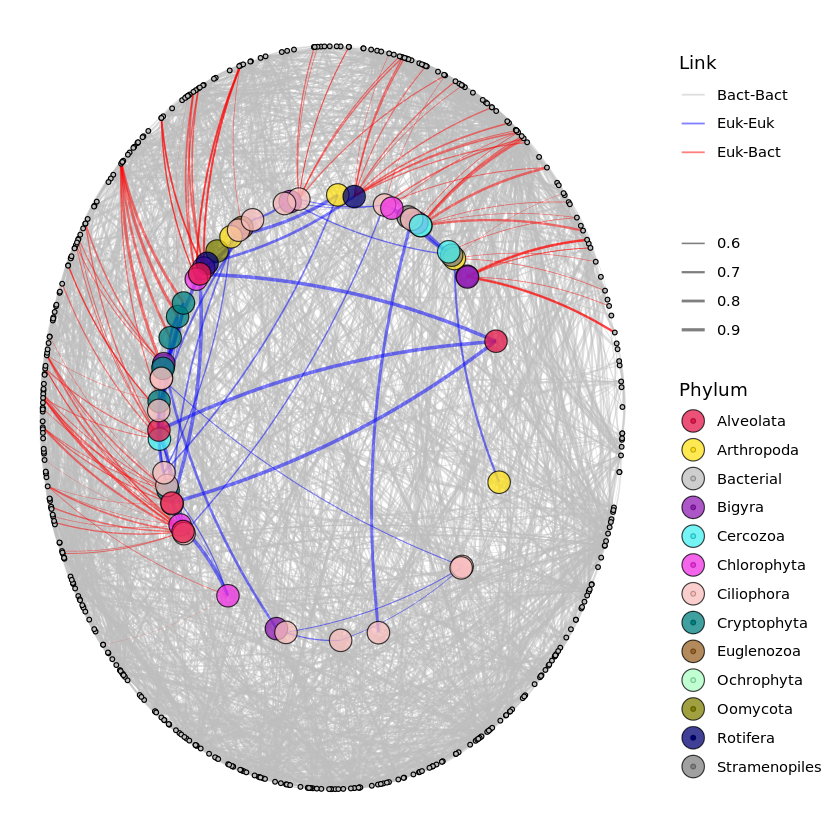

In [162]:
ggplot() +
    geom_curve(data= combined_edge_frame[!duplicated(cbind(pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail), 
                                      pmax(combined_edge_frame$.head,
                                           combined_edge_frame$.tail))),] %>%
                 dplyr::filter(weight > 0) %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk")) %>%
                 dplyr::mutate(BaseColor=factor(BaseColor,
                               levels=c("Bact-Bact","Euk-Euk","Euk-Bact")))%>%
                 dplyr::filter(.tail!=.head),
                                  aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef,color=BaseColor),#,color=LinkPhylum),
                 alpha=0.5,curvature=0.1) +
        #scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        scale_color_manual(name="Link", values=c("gray","blue","red"), 
                           breaks = c("Bact-Bact","Euk-Euk","Euk-Bact"),
                           labels = c("Bact-Bact","Euk-Euk","Euk-Bact"),
                           na.value="gray")+
        geom_point(data=bact_layout_frame%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=6,pch=21,alpha=0.75) +
        theme_bw() +
        new_scale_color() +
        #scale_color_manual(name = "Community", values = distinct_cols) + 
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        scale_size(range = c(0, 1),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") +
        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank())
ggsave("linkphylum.png",width=10,height=10,units="in")

List of 10
 $ axis.title.x    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.title.y    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text.x     : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text.y     : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.ticks      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.background: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.border    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.grid.major: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.grid.minor: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ plot.background : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi T

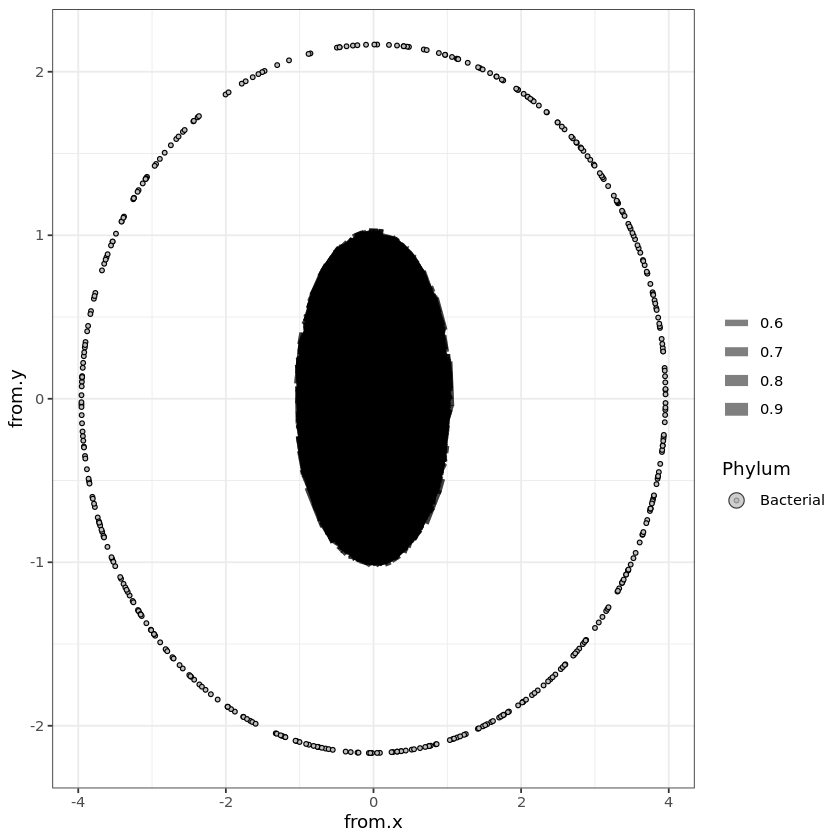

In [145]:
ggplot() +
    geom_segment(data=bact_edge_frame %>%
                 dplyr::filter(weight > 0),aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),
                 alpha=0.5) +
        scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        geom_point(data=bact_layout_frame%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=bact_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=4,pch=21,alpha=0.75) +
        theme_bw() +
        new_scale_color() +
        scale_color_manual(name = "Community", values = distinct_cols) + 
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        scale_size(range = c(0, 4),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") 


        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank())

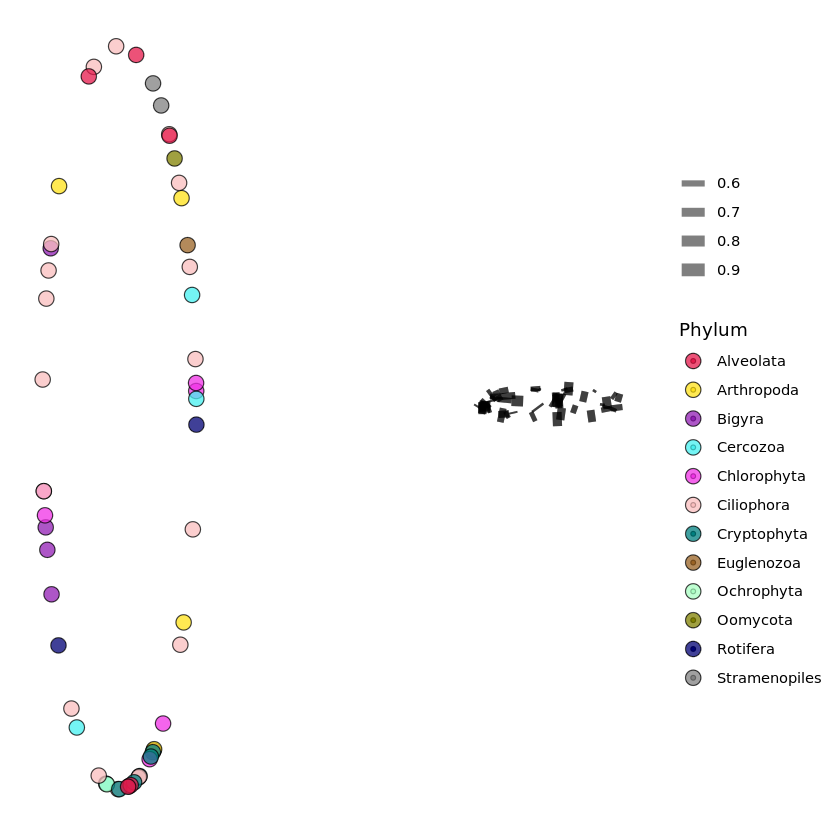

In [142]:
ggplot() +
    geom_segment(data=euk_edge_frame %>%
                 dplyr::mutate(from.x=from.x+spacer_euk,to.x=to.x+spacer_euk,
                               from.y=from.y/scaling_euk,to.y=to.y/scaling_euk)%>%
                 dplyr::filter(weight > 0),aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),
                 alpha=0.5) +
        scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=4,pch=21,alpha=0.75) +
        theme_bw() +
        new_scale_color() +
        scale_color_manual(name = "Community", values = distinct_cols)+ 
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        scale_size(range = c(0, 4),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") +
        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank())

In [143]:
as.numeric(position_jitter(width = 0.1, height = 0.1, seed=42))

ERROR: Error in as.numeric(position_jitter(width = 0.1, height = 0.1, seed = 42)): cannot coerce type 'environment' to vector of type 'double'


Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"
Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"
Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"


List of 10
 $ axis.title.x    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.title.y    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text.x     : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.text.y     : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ axis.ticks      : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.background: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.border    : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.grid.major: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ panel.grid.minor: list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 $ plot.background : list()
  ..- attr(*, "class")= chr [1:2] "element_blank" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi T

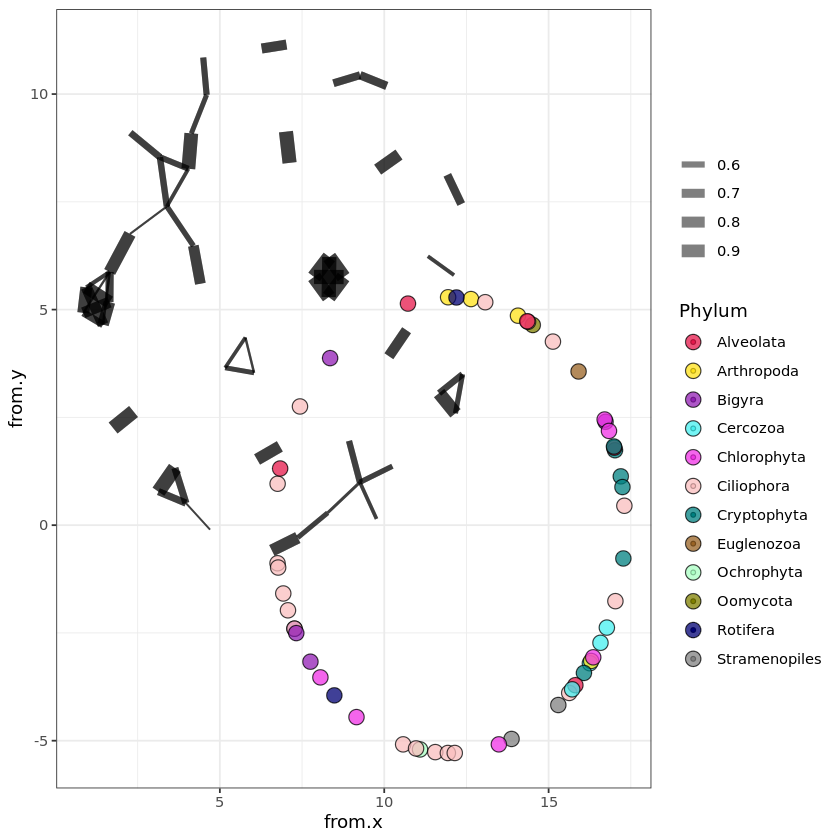

In [44]:
cutoff = 0.5
distinct_cols=c("#458034",
"#c46be1",
"#69c957",
"#8151c2",
"#b0bf33",
"#5c71df",
"#4da02e",
"#d84cb1",
"#46bd76",
"#a3459d",
"#829f34",
"#d44385",
"#42c9b2",
"#da3d5c",
"#3db9cc",
"#d64a2f",
"#519ad3",
"#dd9736",
"#5b5ea3",
"#c0aa41",
"#c086d4",
"#5c6922",
"#9096dd",
"#c3632d",
"#68b78a",
"#984a74",
"#a3bb71",
"#de83b2",
"#367d4c",
"#a54646",
"#2b7f63",
"#df7d78",
"#8e8d47",
"#d99c6c",
"#8d642a")
# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("16S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > cutoff) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Bacteria" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

make_network <- function(e,v,layout="fr") {
    net = network::network(e %>% dplyr::mutate(weight=CorrCoef),multiple=TRUE,loops=TRUE)

    refactored_graph <- graph_from_data_frame(data.frame(net),
                                              directed = FALSE, vertices = NULL)

    V(refactored_graph)$type <- grepl("18S",V(refactored_graph)$name) #the second column of edges is TRUE type

    layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
    if (layout == "circular") {
        layout_gr <- as.data.frame(layout_in_circle(refactored_graph))
    } else if (layout == "bipartite") {
        layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph))
    }
    #layout_gr <- as.data.frame(layout_with_gem(refactored_graph))

    corr_communities <- cluster_louvain(refactored_graph,weight=data.frame(net)$CorrCoef)

    set_vertex_attr(refactored_graph, "clustermembership",
                    index = V(refactored_graph),
                    membership(corr_communities))
    set_vertex_attr(refactored_graph, "classification",
                    index = V(refactored_graph),
                    (v %>% dplyr::right_join(data.frame("Label"=V(refactored_graph)$name)))$Phylum)

    #layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph)) #get.data.frame(refactored_graph) 


    edge_df <- data.frame(net)
    edge_df <- edge_df %>% dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".head"="Label")) %>%
        dplyr::rename(c("Dom1"="Domain")) %>%
        dplyr::left_join(v %>% dplyr::select(Label,Domain),by=c(".tail"="Label")) %>%
        dplyr::rename(c("Dom2"="Domain"))

    # Add the MAG labels
    #layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
    layout_gr$mag <- V(refactored_graph)$name
    layout_gr$community <- membership(corr_communities)

    # Add the euk-prok labels
    edge_df_inform <- edge_df %>% dplyr::select(.head,Dom1) %>% dplyr::rename(c("mag"=".head","class"="Dom1")) %>%
                        dplyr::bind_rows(edge_df %>% dplyr::select(.tail,Dom2) %>% 
                                         dplyr::rename(c("mag"=".tail","class"="Dom2")))
    layout_gr = layout_gr %>% dplyr::left_join(v,by=c("mag"="Label")) %>%
        dplyr::rename(c("classification"="Phylum")) %>%
        dplyr::mutate(classification=dplyr::case_when(Domain == "Bacteria" ~ "Bacterial",
                                                      TRUE ~ classification))
    #layout_gr$community <- membership(corr_communities)

    layout_gr <- layout_gr %>% 
                        dplyr::mutate("degree" = as.numeric(as.character(igraph::degree(refactored_graph,
                                                                                      v = layout_gr$mag))))

    layout_gr = layout_gr %>% 
                dplyr::select(V1,V2,mag,classification,Domain,Class,Order,community,degree)
    layout_gr <- layout_gr %>% dplyr::distinct()

    edge_df$from.x <- layout_gr$V1[match(edge_df$.head, layout_gr$mag)]  #  match the from locations from the node data.frame we previously connected
    edge_df$from.y <- layout_gr$V2[match(edge_df$.head, layout_gr$mag)]
    edge_df$to.x <- layout_gr$V1[match(edge_df$.tail, layout_gr$mag)]  #  match the to locations from the node data.frame we previously connected
    edge_df$to.y <- layout_gr$V2[match(edge_df$.tail, layout_gr$mag)]

    layout_gr_classes = layout_gr
    return(list(edge_df,layout_gr))
}

returned_frame = make_network(e,v,layout="circular")
bact_edge_frame = returned_frame[[1]]
bact_layout_frame = returned_frame[[2]]

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter((CorrCoef > cutoff))%>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

returned_frame = make_network(e,v)
euk_edge_frame = returned_frame[[1]]
euk_layout_frame = returned_frame[[2]]

all_nodes = c(unique(euk_layout_frame$mag), unique(bact_layout_frame$mag))
# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    #dplyr::filter(Seq1!=Seq2)%>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1)) | 
                  ((Seq1 == Seq2) & (Seq1 %in% all_nodes))) %>%
    #dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > cutoff) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

spacer_euk=max(c(abs(euk_edge_frame$from.x),abs(euk_edge_frame$to.x)))
spacer_bact=max(c(bact_edge_frame$from.x,bact_edge_frame$to.x))

spacer_euk=(max(c(abs(euk_edge_frame$from.x),abs(euk_edge_frame$to.x))))*2
spacer_bact=max(c(abs(bact_edge_frame$from.x),abs(bact_edge_frame$to.x)))

scaling_bact=max(c(abs(bact_edge_frame$from.y),abs(bact_edge_frame$to.y)))
scaling_euk=max(c(abs(euk_edge_frame$from.y),abs(euk_edge_frame$to.y)))

scaling_bact=max(c(abs(bact_edge_frame$from.y),abs(bact_edge_frame$to.y)))
scaling_euk=(max(c(abs(euk_edge_frame$from.y),abs(euk_edge_frame$to.y))) + 
    abs(min(c(euk_edge_frame$from.y,euk_edge_frame$to.y))))*2

spacer_bact_y=max(c(bact_edge_frame$from.y,bact_edge_frame$to.y))

#euk_layout_frame = euk_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_euk)^1.25,V2=V2/scaling_euk)
#bact_layout_frame = bact_layout_frame %>%
#    dplyr::mutate(V1=V1-spacer_bact,V2=V2/scaling_bact)

#euk_layout_frame = euk_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_euk)/spacer_euk,V2=(V2+scaling_euk)/scaling_euk)
#bact_layout_frame = bact_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_bact)/spacer_bact,V2=(V2+scaling_bact)/scaling_bact)

returned_frame = make_network(e,v)
euk_bact_edge_frame = returned_frame[[1]] %>% dplyr::filter((.head %in% all_nodes) & (.tail %in% all_nodes))
#dplyr::filter(.head!=.tail)
euk_bact_layout_frame = returned_frame[[2]]
# circle center for euks & bacteria
h_meas = 0 # x coord of center
k_meas = 0 # y coord of center
# radius for euks
r_euk = 6

# radius for bact
r_bac = 3

euk_bact_layout_frame = euk_bact_layout_frame %>%
    dplyr::group_by(Domain) %>%
    dplyr::mutate(total_x_distance = sqrt((max(V1) - min(V1))^2)) %>%
    dplyr::mutate(mod_V1 = V1 / total_x_distance * 360) %>% # angular measurement
    dplyr::ungroup() %>%
    dplyr::mutate(r = dplyr::case_when(Domain == "Eukaryota" ~ r_euk,
                                       TRUE ~ r_bac),
                  add_extra = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*2,
                                       TRUE ~ 0),
                  h = h_meas, k = k_meas) %>%
    dplyr::mutate(circle_x = (r+runif(1,-1,1))*cos((mod_V1+runif(1,-1,1)) * pi / 180) + h_meas+add_extra,
                  circle_y = (r+runif(1,-1,1))*sin((mod_V1+runif(1,-1,1)) * pi / 180) + h_meas) %>%
    dplyr::mutate(V1 = circle_x, V2 = circle_y)

euk_layout_frame = euk_layout_frame %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,V1,V2), by = "mag")

bact_layout_frame = bact_layout_frame %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,V1,V2), by = "mag")

euk_bact_edge_frame = euk_bact_edge_frame %>%
    dplyr::select(-from.x,-to.x,-from.y,-to.y) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,circle_x,circle_y,classification),
                     by = c(".head"="mag")) %>%
    dplyr::rename("LinkPhylum"="classification")%>%
    dplyr::mutate(BaseColor="Euk-Bact") %>%
    dplyr::rename(c("from.x"="circle_x","from.y"="circle_y"))%>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,circle_x,circle_y),
                     by = c(".tail"="mag")) %>%
    dplyr::rename(c("to.x"="circle_x","to.y"="circle_y"))

#euk_bact_edge_frame = euk_bact_edge_frame %>%
#    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
#    dplyr::left_join(euk_layout_frame%>%dplyr::rename("LinkPhylum"="classification")%>%
#                     dplyr::mutate(BaseColor="Euk-Bact"),
#                     by=c(".tail"="mag")) %>%
#    dplyr::mutate(to.x=V1,to.y=V2) %>%
#    dplyr::select(-V1,-V2,-community) %>%
#    dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
#    dplyr::mutate(from.x=V1,from.y=V2)
bact_communities=na.omit(unique(euk_bact_edge_frame$community))
bact_layout_frame = bact_layout_frame #%>% dplyr::filter(community %in% bact_communities)
bact_edge_frame = bact_edge_frame %>% dplyr::filter((.head %in% bact_layout_frame$mag) | 
                                                    (.tail %in% bact_layout_frame$mag))

combined_edge_frame = bact_edge_frame %>%
    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
    dplyr::left_join(bact_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".tail"="mag")) %>%
    dplyr::mutate(to.x=V1,to.y=V2) %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(bact_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".head"="mag")) %>%
    dplyr::mutate(from.x=V1,from.y=V2) %>%
    dplyr::select(-V1,-V2) %>%
    #dplyr::mutate(from.x=from.x-spacer_bact,to.x=to.x-spacer_bact,
    #              from.y=from.y/scaling_bact,to.y=to.y/scaling_bact) %>%
    dplyr::bind_rows(euk_edge_frame %>%
    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
    dplyr::left_join(euk_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".tail"="mag")) %>%
    dplyr::mutate(to.x=V1,to.y=V2)%>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".head"="mag")) %>%
    dplyr::mutate(from.x=V1,from.y=V2)) %>%
    dplyr::select(-V1,-V2) %>%
    #dplyr::mutate(from.x=(from.x+spacer_euk)^1.25,to.x=(to.x+spacer_euk)^1.25,
    #              from.y=from.y/scaling_euk,to.y=to.y/scaling_euk)) %>%
    dplyr::bind_rows(euk_bact_edge_frame %>% 
                     dplyr::select(.head,.tail,weight,Phylum1,CorrCoef,BaseColor,
                                   from.x,from.y,to.x,to.y,LinkPhylum))# %>%
                     #dplyr::mutate(from.x=from.x-spacer_bact,to.x=to.x+spacer_euk,
                     #              from.y=from.y/spacer_bact,to.y=to.y/spacer_euk))


ggplot() +
    geom_segment(data=euk_edge_frame %>%
                 dplyr::filter(weight > 0),aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),
                 alpha=0.5) +
        scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=4,pch=21,alpha=0.75) +
        theme_bw() +
        new_scale_color() +
        scale_color_manual(name = "Community", values = distinct_cols) + 
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        scale_size(range = c(0, 4),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") 


        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank())

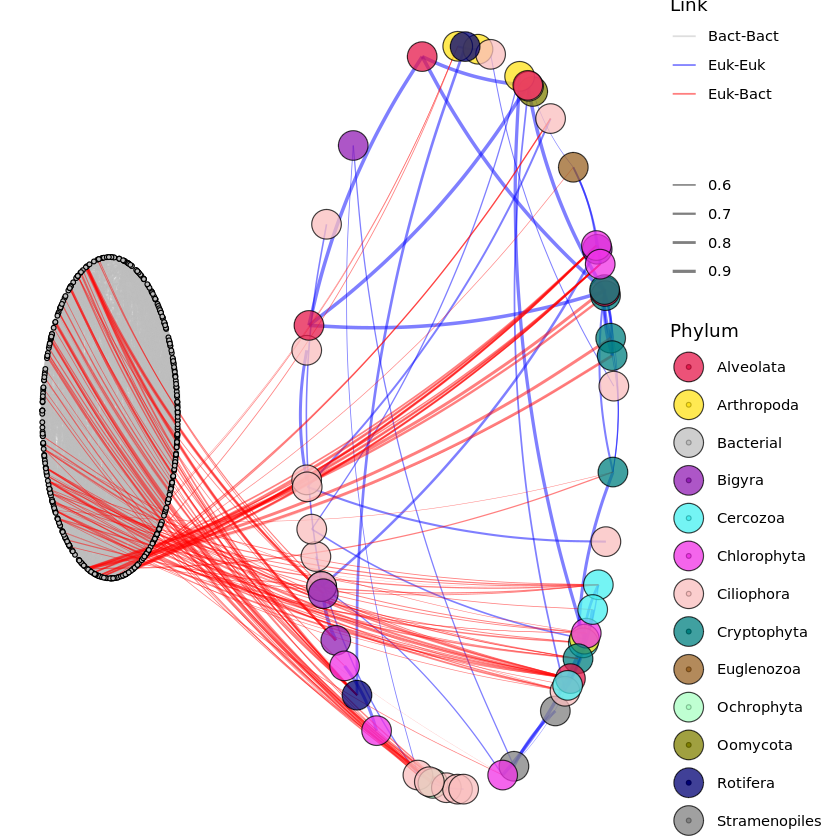

In [45]:
ggplot() +
    geom_curve(data= combined_edge_frame[!duplicated(cbind(pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail), 
                                      pmax(combined_edge_frame$.head,
                                           combined_edge_frame$.tail))),]  %>%
                 dplyr::filter(weight > 0) %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk")) %>%
                 dplyr::mutate(BaseColor=factor(BaseColor,
                               levels=c("Bact-Bact","Euk-Euk","Euk-Bact")))%>%
                 dplyr::filter(.tail!=.head),
                                  aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef,color=BaseColor),#,color=LinkPhylum),
                 alpha=0.5,curvature=0.1) +
        #scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        scale_color_manual(name="Link", values=c("gray","blue","red"), 
                           breaks = c("Bact-Bact","Euk-Euk","Euk-Bact"),
                           labels = c("Bact-Bact","Euk-Euk","Euk-Bact"),
                           na.value="gray")+
        geom_point(data=bact_layout_frame%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=8,pch=21,alpha=0.75) +
        #geom_label(data=euk_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
          #                            label=Order),
         #          size=3) +
        theme_bw() +
        new_scale_color() +
        #scale_color_manual(name = "Community", values = distinct_cols) + 
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        scale_size(range = c(0, 1),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") +
        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank())
ggsave("sep_network.png",width=12,height=10,units="in")

In [116]:
combined_edge_frame[!duplicated(cbind(pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail), 
                                      pmax(combined_edge_frame$.head,
                                           combined_edge_frame$.tail))),] %>% dplyr::filter(.head == "MEND-TF-16S-83" | .tail == "MEND-TF-16S-83")


.tail           .head            P.vals PValRank Corrected    CorrCoef 
1 MEND-TF-16S-83  MEND-TF-16S-1008  0     534      0.0003689864 0.9198013
2 MEND-TF-16S-83  MEND-TF-16S-637   0     537      0.0003710593 0.5200859
3 MEND-TF-16S-83  MEND-TF-16S-972   0     538      0.0003717503 0.5193511
4 MEND-TF-16S-83  MEND-TF-16S-1000  0     539      0.0003724413 0.5058966
5 MEND-TF-18S-29  MEND-TF-16S-83   NA      NA                NA 0.5387244
6 MEND-TF-18S-133 MEND-TF-16S-83   NA      NA                NA 0.7495212
7 MEND-TF-16S-83  MEND-TF-16S-83   NA      NA                NA 1.0000000
  Order1         Phylum1      Domain1  Order2           ⋯ Seq1_res      
1 Spirochaetales Spirochaetes Bacteria Synechococcales  ⋯ MEND-TF-16S-83
2 Spirochaetales Spirochaetes Bacteria Blastocatellales ⋯ MEND-TF-16S-83
3 Spirochaetales Spirochaetes Bacteria Chroococcales    ⋯ MEND-TF-16S-83
4 Spirochaetales Spirochaetes Bacteria Pseudanabaenales ⋯ MEND-TF-16S-83
5 NA             Ciliophora   NA       NA               ⋯ NA            
6 NA             Ochrophyta   NA       NA               ⋯ NA            
7 NA             Spirochaetes NA       NA               ⋯ NA            
  weight    Dom1     Dom2     to.x      to.y       from.x    from.y     
1 0.9198013 Bacteria Bacteria -3.425739  0.1114111 -3.399536  0.36293620
2 0.5200859 Bacteria Bacteria -3.425739  0.1114111 -3.426285 -0.04095537
3 0.5193511 Bacteria Bacteria -3.425739  0.1114111 -3.164232  1.03694627
4 0.5058966 Bacteria Bacteria -3.425739  0.1114111 -2.656036  1.68452840
5 0.5387244 NA       NA        7.033843 -3.5282314 -3.425739  0.11141115
6 0.7495212 NA       NA        6.025658 -2.0209544 -3.425739  0.11141115
7 1.0000000 NA       NA       -3.425739  0.1114111 -3.425739  0.11141115
  BaseColor LinkPhylum
1 NA        NA        
2 NA        NA        
3 NA        NA        
4 NA        NA        
5 Euk-Bact  Bacterial 
6 Euk-Bact  Bacterial 
7 Euk-Bact  Bacterial

In [46]:
cutoff = 0.5

funct_sapply <- function(x,input) {
    return(grepl(input,x))
}

distinct_cols=c("#458034",
"#c46be1",
"#69c957",
"#8151c2",
"#b0bf33",
"#5c71df",
"#4da02e",
"#d84cb1",
"#46bd76",
"#a3459d",
"#829f34",
"#d44385",
"#42c9b2",
"#da3d5c",
"#3db9cc",
"#d64a2f",
"#519ad3",
"#dd9736",
"#5b5ea3",
"#c0aa41",
"#c086d4",
"#5c6922",
"#9096dd",
"#c3632d",
"#68b78a",
"#984a74",
"#a3bb71",
"#de83b2",
"#367d4c",
"#a54646",
"#2b7f63",
"#df7d78",
"#8e8d47",
"#d99c6c",
"#8d642a")
## Add in the nodes that have any kind of bact-euk connection first ##
euk_bact_conn = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1))) %>% dplyr::filter(CorrCoef > cutoff)
extra_nodes = c(unique(c(euk_bact_conn$Seq1,euk_bact_conn$Seq2)))
extra_nodes_euk = extra_nodes[unlist(sapply(extra_nodes,funct_sapply,"18S"))]
extra_nodes_bact = extra_nodes[unlist(sapply(extra_nodes,funct_sapply,"16S"))]
                  
# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter((grepl("16S",Seq1) & grepl("16S",Seq2)) | ((Seq1 %in% extra_nodes_bact) & 
                  (Seq2 %in% extra_nodes_bact)))%>%
    dplyr::distinct() %>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > cutoff) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Bacteria" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Bacteria" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

make_network <- function(e,v,layout="fr") {
    net = network::network(e %>% dplyr::mutate(weight=CorrCoef),multiple=TRUE,loops=TRUE)

    refactored_graph <- graph_from_data_frame(data.frame(net),
                                              directed = FALSE, vertices = NULL)

    V(refactored_graph)$type <- grepl("18S",V(refactored_graph)$name) #the second column of edges is TRUE type

    layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
    if (layout == "circular") {
        layout_gr <- as.data.frame(layout_in_circle(refactored_graph))
    } else if (layout == "bipartite") {
        layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph))
    }
    #layout_gr <- as.data.frame(layout_with_gem(refactored_graph))

    corr_communities <- cluster_louvain(refactored_graph,weight=data.frame(net)$CorrCoef)

    set_vertex_attr(refactored_graph, "clustermembership",
                    index = V(refactored_graph),
                    membership(corr_communities))
    set_vertex_attr(refactored_graph, "classification",
                    index = V(refactored_graph),
                    (v %>% dplyr::right_join(data.frame("Label"=V(refactored_graph)$name)))$Phylum)

    #layout_gr <- as.data.frame(layout_as_bipartite(refactored_graph)) #get.data.frame(refactored_graph) 

    edge_df <- data.frame(net)
    print(edge_df)
    edge_df <- edge_df %>% #dplyr::select(-Order1,-Class1,-Order2,-Class2) %>% 
        dplyr::left_join(v %>% dplyr::select(Label,Domain,Order,Class),
                                            by=c(".head"="Label")) %>%
        dplyr::rename(c("Dom1"="Domain","Order1"="Order","Class1"="Class")) %>%
        dplyr::left_join(v %>% dplyr::select(Label,Domain,Order,Class),by=c(".tail"="Label")) %>%
        dplyr::rename(c("Dom2"="Domain","Order2"="Order","Class2"="Class"))

    # Add the MAG labels
    #layout_gr <- as.data.frame(layout.fruchterman.reingold(refactored_graph))
    layout_gr$mag <- V(refactored_graph)$name
    layout_gr$community <- membership(corr_communities)

    # Add the euk-prok labels
    edge_df_inform <- edge_df %>% dplyr::select(.head,Dom1) %>% 
                        dplyr::rename(c("mag"=".head","class"="Dom1")) %>%
                        dplyr::bind_rows(edge_df %>% dplyr::select(.tail,Dom2) %>% 
                                         dplyr::rename(c("mag"=".tail","class"="Dom2")))
    layout_gr = layout_gr %>% dplyr::left_join(v,by=c("mag"="Label")) %>%
        dplyr::rename(c("classification"="Phylum")) %>%
        dplyr::mutate(classification=dplyr::case_when(Domain == "Bacteria" ~ "Bacterial",
                                                      TRUE ~ classification))
    #layout_gr$community <- membership(corr_communities)

    layout_gr <- layout_gr %>% 
                        dplyr::mutate("degree" = as.numeric(as.character(igraph::degree(refactored_graph,
                                                                                      v = layout_gr$mag))))

    layout_gr = layout_gr %>% 
                dplyr::select(V1,V2,mag,classification,Domain,Class,Order,community,degree)
    layout_gr <- layout_gr %>% dplyr::distinct()

    edge_df$from.x <- layout_gr$V1[match(edge_df$.head, layout_gr$mag)]  #  match the from locations from the node data.frame we previously connected
    edge_df$from.y <- layout_gr$V2[match(edge_df$.head, layout_gr$mag)]
    edge_df$to.x <- layout_gr$V1[match(edge_df$.tail, layout_gr$mag)]  #  match the to locations from the node data.frame we previously connected
    edge_df$to.y <- layout_gr$V2[match(edge_df$.tail, layout_gr$mag)]

    layout_gr_classes = layout_gr
    return(list(edge_df,layout_gr))
}

returned_frame = make_network(e,v) #,layout="circular")
bact_edge_frame = returned_frame[[1]]
bact_layout_frame = returned_frame[[2]]

# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2))| ((Seq1 %in% extra_nodes_euk) & 
                  (Seq2 %in% extra_nodes_euk)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter((CorrCoef > cutoff))%>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

h_meas = mean(bact_layout_frame$V1) #0 # x coord of center
k_meas = mean(bact_layout_frame$V2) #4 # y coord of center
# radius for euks
r_euk = 30

# radius for bact
r_bac = 3

returned_frame = make_network(e,v)
euk_edge_frame = returned_frame[[1]]
euk_layout_frame = returned_frame[[2]] #%>%dplyr::mutate(V1=V1+0)
                                                 #dplyr::mutate(V1=V1^(1.2)-min(V1^2),
                                                 #              V2=V2^(1.2)-min(V2^2))

community_means = euk_layout_frame %>%
    dplyr::group_by(Domain,community) %>%
    dplyr::mutate(mean_cluster_centers = mean(V1,na.rm=TRUE),
                  mean_cluster_y = mean(V2,na.rm=TRUE))
euk_layout_frame = euk_layout_frame %>%
    dplyr::left_join(community_means %>% dplyr::select(mag,mean_cluster_centers,mean_cluster_y)) %>%
    dplyr::group_by(Domain) %>%
    dplyr::mutate(total_x_distance = sqrt((max(mean_cluster_centers) - 
                                           min(mean_cluster_centers))^2)) %>%
    dplyr::mutate(mod_V1 = mean_cluster_centers / total_x_distance * 360) %>% # angular measurement
    dplyr::ungroup() %>%
    dplyr::mutate(r = dplyr::case_when(Domain == "Eukaryota" ~ r_euk,
                                       TRUE ~ r_bac),
                  add_extra = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*2,
                                       TRUE ~ 0),
                  h = h_meas, k = k_meas,
                  circle_x = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*cos(mod_V1*pi/180) + h_meas + 
                                              (V1-mean_cluster_centers)*2,
                                              TRUE ~ V1),
                  circle_y = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*sin(mod_V1*pi/180) + k_meas + 
                                              (V2-mean_cluster_y)*2,
                                              TRUE ~ V2)) %>%
    dplyr::mutate(V1=circle_x,V2=circle_y)


all_nodes = c(unique(euk_layout_frame$mag), unique(bact_layout_frame$mag))
# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    #dplyr::filter(Seq1!=Seq2)%>%
    dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
                  (grepl("16S",Seq2) & grepl("18S",Seq1))) %>% 
                  #((Seq1 == Seq2) & (Seq1 %in% all_nodes))) %>%
    #dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter(CorrCoef > cutoff) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq2_res,
                                           TRUE ~ Seq1_res))
print(e)
# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

spacer_euk=max(c(abs(euk_edge_frame$from.x),abs(euk_edge_frame$to.x)))
spacer_bact=max(c(bact_edge_frame$from.x,bact_edge_frame$to.x))

spacer_euk=(max(c(abs(euk_edge_frame$from.x),abs(euk_edge_frame$to.x))))*2
spacer_bact=max(c(abs(bact_edge_frame$from.x),abs(bact_edge_frame$to.x)))

scaling_bact=max(c(abs(bact_edge_frame$from.y),abs(bact_edge_frame$to.y)))
scaling_euk=max(c(abs(euk_edge_frame$from.y),abs(euk_edge_frame$to.y)))

scaling_bact=max(c(abs(bact_edge_frame$from.y),abs(bact_edge_frame$to.y)))
scaling_euk=(max(c(abs(euk_edge_frame$from.y),abs(euk_edge_frame$to.y))) + 
    abs(min(c(euk_edge_frame$from.y,euk_edge_frame$to.y))))*2

spacer_bact_y=max(c(bact_edge_frame$from.y,bact_edge_frame$to.y))

#euk_layout_frame = euk_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_euk)^1.25,V2=V2/scaling_euk)
#bact_layout_frame = bact_layout_frame %>%
#    dplyr::mutate(V1=V1-spacer_bact,V2=V2/scaling_bact)

#euk_layout_frame = euk_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_euk)/spacer_euk,V2=(V2+scaling_euk)/scaling_euk)
#bact_layout_frame = bact_layout_frame %>%
#    dplyr::mutate(V1=(V1+spacer_bact)/spacer_bact,V2=(V2+scaling_bact)/scaling_bact)

returned_frame = make_network(e,v)
euk_bact_edge_frame = returned_frame[[1]] %>% dplyr::filter((.head %in% all_nodes) & (.tail %in% all_nodes))
#dplyr::filter(.head!=.tail)
euk_bact_layout_frame = returned_frame[[2]]
# circle center for euks & bacteria
h_meas = 0 # x coord of center
k_meas = 0 # y coord of center
# radius for euks
r_euk = 6

# radius for bact
r_bac = 3


community_means = euk_bact_layout_frame %>%
    dplyr::select(-V1,-V2) %>% dplyr::left_join((euk_layout_frame %>%
                                                 dplyr::bind_rows(bact_layout_frame) %>%
                                                 dplyr::select(mag,V1,V2)),
                                                by="mag") %>%
    dplyr::group_by(Domain,community) %>%
    dplyr::mutate(mean_cluster_centers = mean(V1,na.rm=TRUE),
                  mean_cluster_y = mean(V2,na.rm=TRUE))
euk_bact_layout_frame = euk_bact_layout_frame %>% dplyr::ungroup() %>%
    dplyr::select(-V1,-V2) %>% dplyr::left_join((euk_layout_frame %>%
                                                 dplyr::bind_rows(bact_layout_frame) %>%
                                                 dplyr::distinct() %>%
                                                 dplyr::select(mag,V1,V2)),
                                                by="mag") %>%
    dplyr::left_join(community_means %>% dplyr::select(mag,mean_cluster_centers,mean_cluster_y)) %>%
    dplyr::group_by(Domain) %>%
    dplyr::mutate(total_x_distance = sqrt((max(mean_cluster_centers) - 
                                           min(mean_cluster_centers))^2),na.rm=TRUE) %>%
    dplyr::mutate(mod_V1 = mean_cluster_centers / total_x_distance * 360) %>% # angular measurement
    dplyr::ungroup() %>%
    dplyr::mutate(r = dplyr::case_when(Domain == "Eukaryota" ~ r_euk,
                                       TRUE ~ r_bac),
                  add_extra = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*2,
                                       TRUE ~ 0),
                  h = h_meas, k = k_meas) %>%
                  #circle_x = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*cos(mod_V1*pi/180) + h_meas + 
                  #                            (V1-mean_cluster_centers),
                  #                            TRUE ~ V1),
                  #circle_y = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*sin(mod_V1*pi/180) + k_meas + 
                  #                            (V2-mean_cluster_y),
                  #                            TRUE ~ V2)) %>%
    dplyr::mutate(circle_x = V1, #(r+runif(1,-1,1))*cos((mod_V1+runif(1,-1,1)) * pi / 180) + h_meas+add_extra,
                  circle_y = V2) %>% #(r+runif(1,-1,1))*sin((mod_V1+runif(1,-1,1)) * pi / 180) + k_meas) %>%
    dplyr::mutate(V1 = circle_x, V2 = circle_y)

#euk_layout_frame = euk_layout_frame %>%
#    dplyr::select(-V1,-V2) %>%
#dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,V1,V2), by = "mag")

bact_layout_frame = bact_layout_frame %>%
    #dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag), by = "mag")

euk_bact_edge_frame = euk_bact_edge_frame %>%
    dplyr::select(-from.x,-to.x,-from.y,-to.y) %>%
    dplyr::left_join(euk_bact_layout_frame %>% 
                     dplyr::select(mag,circle_x,circle_y,classification),
                     by = c(".head"="mag")) %>%
    dplyr::rename(c("LinkPhylum"="classification")) %>%
    dplyr::mutate(BaseColor="Euk-Bact") %>%
    dplyr::rename(c("from.x"="circle_x","from.y"="circle_y")) %>%
    dplyr::left_join(euk_bact_layout_frame %>% dplyr::select(mag,circle_x,circle_y),
                     by = c(".tail"="mag")) %>%
    dplyr::rename(c("to.x"="circle_x","to.y"="circle_y")) %>%
    dplyr::filter(.head != .tail)

#euk_bact_edge_frame = euk_bact_edge_frame %>%
#    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
#    dplyr::left_join(euk_layout_frame%>%dplyr::rename("LinkPhylum"="classification")%>%
#                     dplyr::mutate(BaseColor="Euk-Bact"),
#                     by=c(".tail"="mag")) %>%
#    dplyr::mutate(to.x=V1,to.y=V2) %>%
#    dplyr::select(-V1,-V2,-community) %>%
#    dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
#    dplyr::mutate(from.x=V1,from.y=V2)
bact_communities=na.omit(unique(euk_bact_edge_frame$community))
bact_layout_frame = bact_layout_frame #%>% dplyr::filter(community %in% bact_communities)
bact_edge_frame = bact_edge_frame %>% dplyr::filter((.head %in% bact_layout_frame$mag) | 
                                                    (.tail %in% bact_layout_frame$mag))

combined_edge_frame = bact_edge_frame %>%
    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
    dplyr::left_join(bact_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".tail"="mag")) %>%
    dplyr::mutate(to.x=V1,to.y=V2) %>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(bact_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".head"="mag")) %>%
    dplyr::mutate(from.x=V1,from.y=V2) %>%
    dplyr::select(-V1,-V2) %>%
    #dplyr::mutate(from.x=from.x-spacer_bact,to.x=to.x-spacer_bact,
    #              from.y=from.y/scaling_bact,to.y=to.y/scaling_bact) %>%
    dplyr::bind_rows(euk_edge_frame %>%
    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
    dplyr::left_join(euk_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".tail"="mag")) %>%
    dplyr::mutate(to.x=V1,to.y=V2)%>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".head"="mag")) %>%
    dplyr::mutate(from.x=V1,from.y=V2)) %>%
    dplyr::select(-V1,-V2) %>%
    #dplyr::mutate(from.x=(from.x+spacer_euk)^1.25,to.x=(to.x+spacer_euk)^1.25,
    #              from.y=from.y/scaling_euk,to.y=to.y/scaling_euk)) %>%
    dplyr::bind_rows(euk_bact_edge_frame %>% 
                     dplyr::select(.head,.tail,weight,Phylum1,CorrCoef,BaseColor,
                                   from.x,from.y,to.x,to.y,LinkPhylum))# %>%
                     #dplyr::mutate(from.x=from.x-spacer_bact,to.x=to.x+spacer_euk,
                     #              from.y=from.y/spacer_bact,to.y=to.y/spacer_euk))

euk_edge_frame = euk_edge_frame %>%
    dplyr::select(-from.x,-from.y,-to.x,-to.y) %>%
    dplyr::left_join(euk_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".tail"="mag")) %>%
    dplyr::mutate(to.x=V1,to.y=V2)%>%
    dplyr::select(-V1,-V2) %>%
    dplyr::left_join(euk_layout_frame %>% dplyr::select(mag,V1,V2),
                     by=c(".head"="mag")) %>%
    dplyr::mutate(from.x=V1,from.y=V2)

ggplot() +
    geom_segment(data=euk_edge_frame %>%
                 dplyr::filter(weight > 0),aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),
                 alpha=0.5) +
        scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        geom_point(data=euk_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(community),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=4,pch=21,alpha=0.75) +
        theme_bw() +
        new_scale_color() +
        scale_color_manual(name = "Community", values = distinct_cols) + 
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        scale_size(range = c(0, 4),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") 


        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank())

Joining, by = c("Seq1", "Seq2")
Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"


                .tail            .head P.vals PValRank    Corrected  CorrCoef
1      MEND-TF-16S-28  MEND-TF-16S-971      0      527 0.0003641495 0.5529910
2      MEND-TF-16S-83 MEND-TF-16S-1008      0      534 0.0003689864 0.9198013
3      MEND-TF-16S-83  MEND-TF-16S-637      0      537 0.0003710593 0.5200859
4      MEND-TF-16S-83  MEND-TF-16S-972      0      538 0.0003717503 0.5193511
5      MEND-TF-16S-83 MEND-TF-16S-1000      0      539 0.0003724413 0.5058966
6     MEND-TF-16S-103  MEND-TF-16S-982      0      544 0.0003758962 0.5398113
7     MEND-TF-16S-103 MEND-TF-16S-1008      0      545 0.0003765872 0.5609161
8     MEND-TF-16S-103 MEND-TF-16S-1175      0      547 0.0003779692 0.5135372
9     MEND-TF-16S-108  MEND-TF-16S-114      0      551 0.0003807331 0.7882624
10    MEND-TF-16S-108  MEND-TF-16S-373      0      553 0.0003821151 0.5819736
11    MEND-TF-16S-108  MEND-TF-16S-412      0      555 0.0003834971 0.6477295
12    MEND-TF-16S-108  MEND-TF-16S-531      0      559 0.0003862

ERROR: [1m[33mError[39m in [1m[1m`stop_vctrs()`:[22m
[33m![39m Names must be unique.
[31m✖[39m These names are duplicated:
  * "Order1" at locations 7 and 17.


In [47]:
bact_layout_frame %>% dplyr::group_by(community,Order,classification,Class) %>%
    dplyr::tally() %>%
    dplyr::filter(community > 10)

community Order              classification Class                 n
1  11        Bacteroidales      Bacterial      Bacteroidia           3
2  11        Campylobacterales  Bacterial      Epsilonproteobacteria 1
3  11        Desulfuromonadales Bacterial      Deltaproteobacteria   1
4  11        Hyphomicrobiales   Bacterial      Alphaproteobacteria   1
5  11        Kiritimatiellales  Bacterial      Kiritimatiellae       3
6  11        Nitrosomonadales   Bacterial      Betaproteobacteria    2
7  11        Nostocales         Bacterial                            1
8  11        Rhodocyclales      Bacterial      Betaproteobacteria    3
9  11        Sphingobacteriales Bacterial      Sphingobacteriia      1
10 11        Verrucomicrobiales Bacterial      Verrucomicrobiae      1
11 12        Chitinophagales    Bacterial      Chitinophagia         1
12 12        Planctomycetales   Bacterial      Planctomycetia        1
13 13        Flavobacteriales   Bacterial      Flavobacteriia        4
14 14        Flavobacteriales   Bacterial      Flavobacteriia        3
15 15        Flavobacteriales   Bacterial      Flavobacteriia        1
16 15        Nostocales         Bacterial                            2
17 15        Pleurocapsales     Bacterial                            1
18 15        Rickettsiales      Bacterial      Alphaproteobacteria   1
19 16        Hyphomicrobiales   Bacterial      Alphaproteobacteria   1
20 16        Rhodospirillales   Bacterial      Alphaproteobacteria   1
21 17        Ignavibacteriales  Bacterial      Ignavibacteria        1
22 17        Sphingomonadales   Bacterial      Alphaproteobacteria   1
23 18        Desulfuromonadales Bacterial      Deltaproteobacteria   2

In [205]:
unique((combined_edge_frame %>% dplyr::filter(!is.na(BaseColor)))$Phylum1)

[1] "Bigyra"           "Arthropoda"       "Ciliophora"       "Euglenozoa"      
 [5] "Cryptophyta"      "Cercozoa"         "Rotifera"         "Ochrophyta"      
 [9] "Chlorophyta"      "Alveolata"        "Firmicutes"       "Spirochaetes"    
[13] "Verrucomicrobia"  "Actinobacteria"   "Proteobacteria"   "Planctomycetes"  
[17] "Bacteroidetes"    "Gemmatimonadetes" "Cyanobacteria"    "Armatimonadetes" 
[21] "Chloroflexi"      "Chlorobi"

In [49]:
## What bacterial OTUs are most consistently connected to the Cryptophytes?

combined_edge_frame %>% dplyr::filter(!is.na(BaseColor)) %>% 
     dplyr::filter(Phylum1 == "Cryptophyta") %>% dplyr::group_by(.head,.tail) %>% 
     dplyr::tally() %>%
     dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
     dplyr::arrange(desc(n)) %>% dplyr::filter(.head!=.tail)

.head           .tail           n classification Domain   Class         
1  MEND-TF-16S-311 MEND-TF-18S-252 1 Bacterial      Bacteria Planctomycetia
2  MEND-TF-16S-628 MEND-TF-18S-252 1 Bacterial      Bacteria Acidimicrobiia
3  MEND-TF-16S-685 MEND-TF-18S-252 1 Bacterial      Bacteria Actinomycetia 
4  MEND-TF-16S-685 MEND-TF-18S-259 1 Bacterial      Bacteria Actinomycetia 
5  MEND-TF-16S-747 MEND-TF-18S-252 1 Bacterial      Bacteria Saprospiria   
6  MEND-TF-16S-819 MEND-TF-18S-252 1 Bacterial      Bacteria Saprospiria   
7  MEND-TF-16S-997 MEND-TF-18S-259 1 Bacterial      Bacteria               
8  MEND-TF-16S-997 MEND-TF-18S-269 1 Bacterial      Bacteria               
9  MEND-TF-16S-997 MEND-TF-18S-72  1 Bacterial      Bacteria               
10 MEND-TF-16S-997 MEND-TF-18S-77  1 Bacterial      Bacteria               
11 MEND-TF-16S-997 MEND-TF-18S-78  1 Bacterial      Bacteria               
12 MEND-TF-16S-998 MEND-TF-18S-78  1 Bacterial      Bacteria               
   Order              community degree V1         V2        
1  Planctomycetales    1         8     -2.2060195 -0.7115933
2  Acidimicrobiales    1        22     -1.9626976 -1.2153261
3  Geodermatophilales  1        36     -1.8937767 -1.3162841
4  Geodermatophilales  1        36     -1.8937767 -1.3162841
5  Saprospirales       1         8     -2.1753753 -0.7963715
6  Saprospirales       1        10     -2.1646314 -0.8238153
7  Nostocales         15         4     -0.7845948 -2.1477481
8  Nostocales         15         4     -0.7845948 -2.1477481
9  Nostocales         15         4     -0.7845948 -2.1477481
10 Nostocales         15         4     -0.7845948 -2.1477481
11 Nostocales         15         4     -0.7845948 -2.1477481
12 Pleurocapsales     15         8     -0.6941244 -2.1781009

In [224]:
## What bacterial OTUs are most consistently connected to the Cryptophytes?

combined_edge_frame %>% dplyr::filter(!is.na(BaseColor)) %>% 
     dplyr::filter(Phylum1 == "Cryptophyta") %>% dplyr::group_by(.head,.tail) %>% 
     dplyr::tally() %>%
     dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
     dplyr::arrange(desc(n))

.head           .tail           n V1        V2        classification
1  MEND-TF-16S-311 MEND-TF-18S-252 1 19.839239  3.854587 Bacterial     
2  MEND-TF-16S-628 MEND-TF-18S-252 1 18.748712  5.479363 Bacterial     
3  MEND-TF-16S-685 MEND-TF-18S-252 1 18.184145  4.358971 Bacterial     
4  MEND-TF-16S-685 MEND-TF-18S-259 1 18.184145  4.358971 Bacterial     
5  MEND-TF-16S-747 MEND-TF-18S-252 1 18.918554  6.987835 Bacterial     
6  MEND-TF-16S-819 MEND-TF-18S-252 1 20.068895  5.308196 Bacterial     
7  MEND-TF-16S-997 MEND-TF-18S-259 1  5.289067 19.642015 Bacterial     
8  MEND-TF-16S-997 MEND-TF-18S-269 1  5.289067 19.642015 Bacterial     
9  MEND-TF-16S-997 MEND-TF-18S-72  1  5.289067 19.642015 Bacterial     
10 MEND-TF-16S-997 MEND-TF-18S-77  1  5.289067 19.642015 Bacterial     
11 MEND-TF-16S-997 MEND-TF-18S-78  1  5.289067 19.642015 Bacterial     
12 MEND-TF-16S-998 MEND-TF-18S-78  1  4.450178 19.141274 Bacterial     
   Domain   Class          Order              community degree
1  Bacteria Planctomycetia Planctomycetales    1         8    
2  Bacteria Acidimicrobiia Acidimicrobiales    1        22    
3  Bacteria Actinomycetia  Geodermatophilales  1        36    
4  Bacteria Actinomycetia  Geodermatophilales  1        36    
5  Bacteria Saprospiria    Saprospirales       1         8    
6  Bacteria Saprospiria    Saprospirales       1        10    
7  Bacteria                Nostocales         15         4    
8  Bacteria                Nostocales         15         4    
9  Bacteria                Nostocales         15         4    
10 Bacteria                Nostocales         15         4    
11 Bacteria                Nostocales         15         4    
12 Bacteria                Pleurocapsales     15         8

In [207]:
## What bacterial OTUs are connected to Ochrophytes?
## no bacterial OTUs are connected to more than a single Ochrophyte.
combined_edge_frame %>% dplyr::filter(!is.na(BaseColor)) %>% 
     dplyr::filter(Phylum1 == "Ochrophyta") %>% dplyr::group_by(.head,CorrCoef,BaseColor) %>% 
     dplyr::tally() %>%
     dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
     dplyr::arrange(desc(n))

.head            CorrCoef  BaseColor n V1         V2          classification
1 MEND-TF-16S-1008 0.8698393 Euk-Bact  1 -0.1834170 -1.11988498 Bacterial     
2 MEND-TF-16S-103  0.5239673 Euk-Bact  1  2.4894837  3.65054301 Bacterial     
3 MEND-TF-16S-370  0.7159230 Euk-Bact  1 -0.6363965 -1.98186716 Bacterial     
4 MEND-TF-16S-83   0.7495212 Euk-Bact  1  1.8747301 -0.14824741 Bacterial     
5 MEND-TF-16S-972  0.5528253 Euk-Bact  1  0.8120542 -0.05334031 Bacterial     
  Domain   Class                 Order              community degree
1 Bacteria                       Synechococcales    2         12    
2 Bacteria Verrucomicrobiae      Verrucomicrobiales 3          6    
3 Bacteria Alphaproteobacteria   Rickettsiales      2          4    
4 Bacteria Spirochaetia          Spirochaetales     2          8    
5 Bacteria Oscillatoriophycideae Chroococcales      2         10

In [50]:
combined_edge_frame %>% dplyr::filter(!is.na(BaseColor)) %>%
    dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
    dplyr::filter(Order == "Rickettsiales")

.tail           .head           P.vals PValRank Corrected CorrCoef  Order1
1 MEND-TF-18S-121 MEND-TF-16S-921 NA     NA       NA        0.5683481 NA    
2 MEND-TF-18S-133 MEND-TF-16S-370 NA     NA       NA        0.7159230 NA    
3 MEND-TF-18S-295 MEND-TF-16S-921 NA     NA       NA        0.5718979 NA    
4 MEND-TF-18S-133 MEND-TF-16S-370 NA     NA       NA        0.7159230 NA    
5 MEND-TF-18S-121 MEND-TF-16S-921 NA     NA       NA        0.5683481 NA    
6 MEND-TF-18S-295 MEND-TF-16S-921 NA     NA       NA        0.5718979 NA    
7 MEND-TF-16S-370 MEND-TF-16S-370 NA     NA       NA        1.0000000 NA    
8 MEND-TF-16S-921 MEND-TF-16S-921 NA     NA       NA        1.0000000 NA    
9 MEND-TF-16S-946 MEND-TF-16S-946 NA     NA       NA        1.0000000 NA    
  Phylum1        Domain1 Order2 ⋯ BaseColor LinkPhylum classification Domain  
1 Rotifera       NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
2 Ochrophyta     NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
3 Ciliophora     NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
4 Proteobacteria NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
5 Proteobacteria NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
6 Proteobacteria NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
7 Proteobacteria NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
8 Proteobacteria NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
9 Proteobacteria NA      NA     ⋯ Euk-Bact  Bacterial  Bacterial      Bacteria
  Class               Order         community degree V1         V2        
1 Alphaproteobacteria Rickettsiales  3        20     -1.7626062  1.5020539
2 Alphaproteobacteria Rickettsiales  2         4     -2.1527615  0.8781496
3 Alphaproteobacteria Rickettsiales  3        20     -1.7626062  1.5020539
4 Alphaproteobacteria Rickettsiales  2         4     -2.1527615  0.8781496
5 Alphaproteobacteria Rickettsiales  3        20     -1.7626062  1.5020539
6 Alphaproteobacteria Rickettsiales  3        20     -1.7626062  1.5020539
7 Alphaproteobacteria Rickettsiales  2         4     -2.1527615  0.8781496
8 Alphaproteobacteria Rickettsiales  3        20     -1.7626062  1.5020539
9 Alphaproteobacteria Rickettsiales 15         2     -0.6698081 -2.1855739

In [226]:
## What bacterial OTUs are connected to Ciliates?

combined_edge_frame %>% dplyr::filter(!is.na(BaseColor)) %>% 
     dplyr::distinct() %>%
     dplyr::filter(Phylum1 == "Ciliophora") %>% dplyr::group_by(.head,.tail,CorrCoef,BaseColor) %>% 
     dplyr::tally() %>%
     dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
     dplyr::distinct() %>%
     dplyr::arrange(desc(n))

.head            .tail           CorrCoef  BaseColor n V1         V2        
1  MEND-TF-16S-1008 MEND-TF-18S-29  0.5878660 Euk-Bact  1  3.8146806 -2.7657472
2  MEND-TF-16S-1029 MEND-TF-18S-316 0.5443186 Euk-Bact  1 -0.3194216 -4.1190638
3  MEND-TF-16S-1033 MEND-TF-18S-256 0.6210561 Euk-Bact  1 17.7321872  2.1259872
4  MEND-TF-16S-1146 MEND-TF-18S-295 0.5496999 Euk-Bact  1  3.6154137  7.2337726
5  MEND-TF-16S-1238 MEND-TF-18S-295 0.5153695 Euk-Bact  1  5.0408591  7.8656478
6  MEND-TF-16S-185  MEND-TF-18S-295 0.5338098 Euk-Bact  1  3.8703281  8.0092421
7  MEND-TF-16S-311  MEND-TF-18S-256 0.5592624 Euk-Bact  1 19.8392393  3.8545868
8  MEND-TF-16S-504  MEND-TF-18S-295 0.5185500 Euk-Bact  1  3.3014529  7.9891433
9  MEND-TF-16S-685  MEND-TF-18S-256 0.5172891 Euk-Bact  1 18.1841448  4.3589711
10 MEND-TF-16S-802  MEND-TF-18S-295 0.5524703 Euk-Bact  1  5.7362875  2.2002633
11 MEND-TF-16S-806  MEND-TF-18S-256 0.5079174 Euk-Bact  1 17.6158567  3.3402825
12 MEND-TF-16S-83   MEND-TF-18S-29  0.5387244 Euk-Bact  1  4.5202058 -0.6248288
13 MEND-TF-16S-921  MEND-TF-18S-295 0.5718979 Euk-Bact  1  1.2758598  5.9656783
14 MEND-TF-16S-982  MEND-TF-18S-29  0.5104552 Euk-Bact  1  0.5806334  5.5278418
15 MEND-TF-16S-982  MEND-TF-18S-295 0.5600263 Euk-Bact  1  0.5806334  5.5278418
16 MEND-TF-16S-987  MEND-TF-18S-316 0.5733808 Euk-Bact  1  9.4752653 -3.2248506
   classification Domain   Class               Order              community
1  Bacterial      Bacteria                     Synechococcales     2       
2  Bacterial      Bacteria Alphaproteobacteria Sphingomonadales    6       
3  Bacterial      Bacteria Alphaproteobacteria Sphingomonadales    1       
4  Bacterial      Bacteria Chloroflexia        Chloroflexales      3       
5  Bacterial      Bacteria                     Synechococcales     3       
6  Bacterial      Bacteria Verrucomicrobiae    Verrucomicrobiales  3       
7  Bacterial      Bacteria Planctomycetia      Planctomycetales    1       
8  Bacterial      Bacteria Planctomycetia      Pirellulales        3       
9  Bacterial      Bacteria Actinomycetia       Geodermatophilales  1       
10 Bacterial      Bacteria Acidimicrobiia      Acidimicrobiales    7       
11 Bacterial      Bacteria Flavobacteriia      Flavobacteriales    1       
12 Bacterial      Bacteria Spirochaetia        Spirochaetales      2       
13 Bacterial      Bacteria Alphaproteobacteria Rickettsiales       3       
14 Bacterial      Bacteria Alphaproteobacteria Rhodospirillales    3       
15 Bacterial      Bacteria Alphaproteobacteria Rhodospirillales    3       
16 Bacterial      Bacteria Alphaproteobacteria Sphingomonadales   10       
   degree
1  12    
2  16    
3  20    
4  14    
5   8    
6   8    
7   8    
8   6    
9  36    
10  4    
11 20    
12  8    
13 20    
14 32    
15 32    
16 32

In [243]:
## What bacterial OTUs are connected to Bigyra?

combined_edge_frame %>% dplyr::filter(!is.na(BaseColor)) %>% 
     dplyr::filter(Phylum1 == "Bigyra") %>% dplyr::group_by(.head,CorrCoef) %>% 
     dplyr::tally() %>%
     dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
     dplyr::arrange(desc(n))

.head            CorrCoef  n V1        V2        classification Domain  
1 MEND-TF-16S-1050 0.7066951 1 -2.001936  6.881395 Bacterial      Bacteria
2 MEND-TF-16S-1050 0.7303914 1 -2.001936  6.881395 Bacterial      Bacteria
3 MEND-TF-16S-235  0.6800055 1 -1.462100  9.561402 Bacterial      Bacteria
4 MEND-TF-16S-235  0.6925829 1 -1.462100  9.561402 Bacterial      Bacteria
5 MEND-TF-16S-28   0.5452568 1 15.768718 11.970601 Bacterial      Bacteria
6 MEND-TF-16S-679  0.5204989 1 -2.317157  7.088431 Bacterial      Bacteria
7 MEND-TF-16S-679  0.5275387 1 -2.317157  7.088431 Bacterial      Bacteria
8 MEND-TF-16S-846  0.5278529 1 -4.088553  7.063298 Bacterial      Bacteria
  Class               Order              community degree
1 Alphaproteobacteria Caulobacterales    3         34    
2 Alphaproteobacteria Caulobacterales    3         34    
3 Verrucomicrobiae    Verrucomicrobiales 3          6    
4 Verrucomicrobiae    Verrucomicrobiales 3          6    
5 Bacilli             Bacillales         1          2    
6 Flavobacteriia      Flavobacteriales   3         36    
7 Flavobacteriia      Flavobacteriales   3         36    
8 Fimbriimonadia      Fimbriimonadales   4          6

In [ ]:
## What bacterial OTUs are connected to Cercozoa?

combined_edge_frame %>% dplyr::filter(!is.na(BaseColor)) %>% 
     dplyr::filter(Phylum1 == "Cercozoa") %>% dplyr::group_by(.head,CorrCoef) %>% 
     dplyr::tally() %>%
     dplyr::left_join(bact_layout_frame,by=c(".head"="mag")) %>%
     dplyr::arrange(desc(n))

In [250]:
high_abundance_bact = (combined_edge_frame %>% dplyr::mutate(Col1=pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail),
                                      Col2=pmax(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail)) %>%
                 dplyr::distinct(Col1,Col2,BaseColor,.keep_all=TRUE) %>%
    dplyr::filter(grepl("18S",.tail)) %>%
    dplyr::group_by(.head) %>% dplyr::tally() %>% dplyr::filter(n >= 4))$.head

In [ ]:
euk_bact_layout_frame %>% dplyr::filter(community == 3)

In [83]:
all_comm = ggplot(euk_bact_layout_frame %>% dplyr::group_by(community,classification) %>% dplyr::tally()) + 
    geom_bar(aes(x=community,y=n,fill=classification),stat="identity") +
    scale_fill_manual(values=phylum_distinct_cols,breaks=distinct_phyla) + theme_bw(base_size=16)

bac_comm = ggplot(euk_bact_layout_frame %>% dplyr::filter(Domain == "Bacteria") %>%
                  dplyr::group_by(community,Class) %>% dplyr::tally()) + 
    geom_tile(aes(x=factor(community),fill=n,y=Class),stat="identity") +
    scale_fill_gradient(low="light blue", high="magenta") + theme_bw(base_size=16)

euk_comm = ggplot(euk_bact_layout_frame %>% dplyr::filter(Domain == "Eukaryota") %>%
                  dplyr::group_by(community,Class) %>% dplyr::tally()) + 
    geom_tile(aes(x=factor(community),fill=n,y=Class),stat="identity") +
    scale_fill_gradient(low="light blue", high="magenta") + theme_bw(base_size=16)

In [103]:
colnames(euk_bact_edge_frame)

[1] ".tail"      ".head"      "P.vals"     "PValRank"   "Corrected" 
 [6] "CorrCoef"   "Order1"     "Phylum1"    "Domain1"    "Order2"    
[11] "Phylum2"    "Domain2"    "Seq2_res"   "Seq1_res"   "weight"    
[16] "Dom1"       "Dom2"       "from.x"     "from.y"     "LinkPhylum"
[21] "BaseColor"  "to.x"       "to.y"

In [102]:
sort(unique(euk_bact_edge_frame$Order1))
sort(unique(euk_bact_edge_frame$Order2))

[1] "Acidimicrobiales"          "Aeromonadales"            
 [3] "Aulacoseirales"            "Bacillales"               
 [5] "Bicosoecida"               "Burkholderiales"          
 [7] "Caldilineales"             "Caulobacterales"          
 [9] "Cellvibrionales"           "Chlamydomonadales"        
[11] "Chlorobiales"              "Chloroflexales"           
[13] "Chromatiales"              "Chroococcales"            
[15] "Chthoniobacterales"        "Ciliophora incertae sedis"
[17] "Cryomonadida"              "Diplostraca"              
[19] "Fimbriimonadales"          "Flavobacteriales"         
[21] "Gemmatimonadales"          "Geodermatophilales"       
[23] "Kathablepharidacea"        "Micrococcales"            
[25] "Moraxellales"              "Neisseriales"             
[27] "Nostocales"                "Oligotrichia"             
[29] "Oscillatoriales"           "Peridiniales"             
[31] "Phycisphaerales"           "Pirellulales"             
[33] "Planctomycetales"          "Pleurocapsales"           
[35] "Ploima"                    "Pseudanabaenales"         
[37] "Pyrenomonadales"           "Rhodobacterales"          
[39] "Rhodospirillales"          "Rickettsiales"            
[41] "Saprospirales"             "Sessilida"                
[43] "Solirubrobacterales"       "Sphaeropleales"           
[45] "Sphingomonadales"          "Spirochaetales"           
[47] "Spirocuta"                 "Sporichthyales"           
[49] "Synechococcales"           "Terrimicrobiales"         
[51] "unclassified Cercozoa"     "Verrucomicrobiales"

[1] "Acidimicrobiales"          "Aeromonadales"            
 [3] "Aulacoseirales"            "Bacillales"               
 [5] "Bicosoecida"               "Burkholderiales"          
 [7] "Caldilineales"             "Caulobacterales"          
 [9] "Cellvibrionales"           "Chlamydomonadales"        
[11] "Chlorobiales"              "Chloroflexales"           
[13] "Chromatiales"              "Chroococcales"            
[15] "Chthoniobacterales"        "Ciliophora incertae sedis"
[17] "Cryomonadida"              "Diplostraca"              
[19] "Fimbriimonadales"          "Flavobacteriales"         
[21] "Gemmatimonadales"          "Geodermatophilales"       
[23] "Kathablepharidacea"        "Micrococcales"            
[25] "Moraxellales"              "Neisseriales"             
[27] "Nostocales"                "Oligotrichia"             
[29] "Oscillatoriales"           "Peridiniales"             
[31] "Phycisphaerales"           "Pirellulales"             
[33] "Planctomycetales"          "Pleurocapsales"           
[35] "Ploima"                    "Pseudanabaenales"         
[37] "Pyrenomonadales"           "Rhodobacterales"          
[39] "Rhodospirillales"          "Rickettsiales"            
[41] "Saprospirales"             "Sessilida"                
[43] "Solirubrobacterales"       "Sphaeropleales"           
[45] "Sphingomonadales"          "Spirochaetales"           
[47] "Spirocuta"                 "Sporichthyales"           
[49] "Synechococcales"           "Terrimicrobiales"         
[51] "unclassified Cercozoa"     "Verrucomicrobiales"

In [99]:
euk_bact_edge_frame %>% dplyr::filter((trimws(Order1)=="Vampyrellida")|(trimws(Order2)=="Vampyrellida"))

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


.tail .head P.vals PValRank Corrected CorrCoef Order1 Phylum1 Domain1
     Order2 ⋯ Seq1_res weight Dom1 Dom2 from.x from.y LinkPhylum BaseColor to.x
     to.y

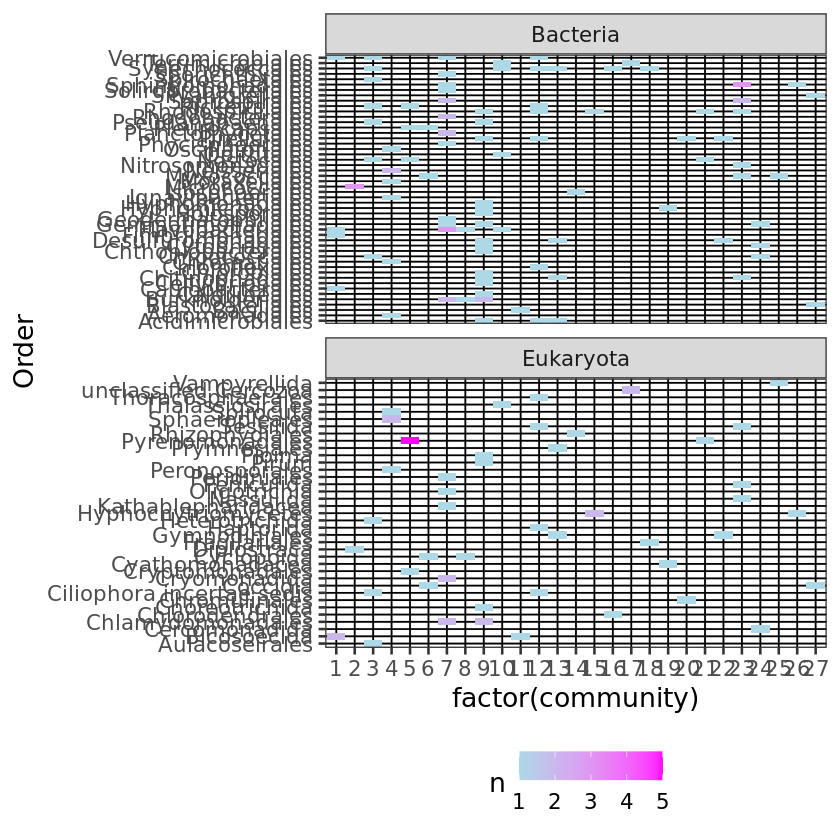

In [95]:
ggplot(euk_bact_layout_frame %>%
                  dplyr::group_by(community,Order,Domain) %>% dplyr::tally()) + 
    geom_hline(aes(yintercept=Order)) + 
    geom_vline(aes(xintercept=factor(community))) + 
    geom_tile(aes(x=factor(community),fill=n,y=Order),stat="identity") +
    scale_fill_gradient(low="light blue", high="magenta") + theme_bw(base_size=16) + 
    facet_wrap(~Domain,ncol=1,scales="free_y") + theme(legend.position="bottom")
ggsave("community_members.png",dpi=400,height=20,width=10,units="in")

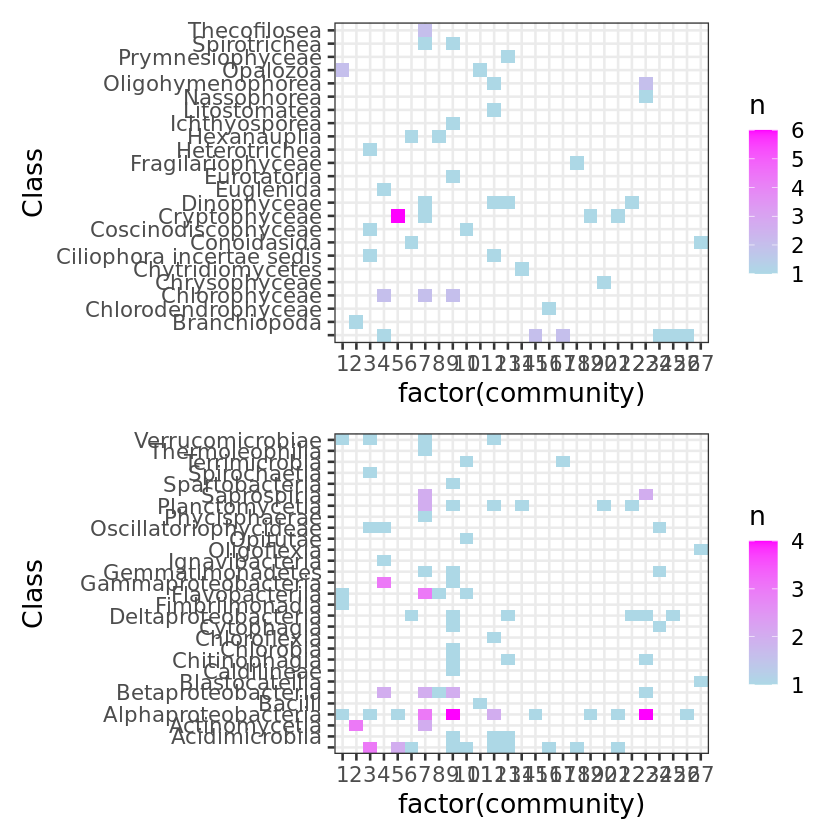

In [86]:
euk_comm / bac_comm

In [260]:
euk_bact_layout_frame %>% dplyr::group_by(community) %>% dplyr::tally()

community n 
1   1         6
2   2         4
3   3        10
4   4        11
5   5         9
6   6         4
7   7        25
8   8         3
9   9        22
10 10         5
11 11         2
12 12        11
13 13         6
14 14         2
15 15         3
16 16         2
17 17         3
18 18         2
19 19         2
20 20         2
21 21         3
22 22         3
23 23        12
24 24         4
25 25         2
26 26         2
27 27         3

In [255]:
high_corr_coef_bact = (combined_edge_frame %>% dplyr::mutate(Col1=pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail),
                                      Col2=pmax(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail)) %>%
                 dplyr::distinct(Col1,Col2,BaseColor,.keep_all=TRUE) %>%
    dplyr::filter(grepl("18S",.tail)) %>%
    dplyr::group_by(.head,CorrCoef) %>% dplyr::tally() %>% dplyr::filter(CorrCoef > 0.7))$.head

Joining, by = c("mag", "classification", "Domain", "Class", "Order", "degree", "V1", "V2", "mean_cluster_centers", "mean_cluster_y", "total_x_distance", "na.rm", "mod_V1", "r", "add_extra", "h", "k", "circle_x", "circle_y")

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


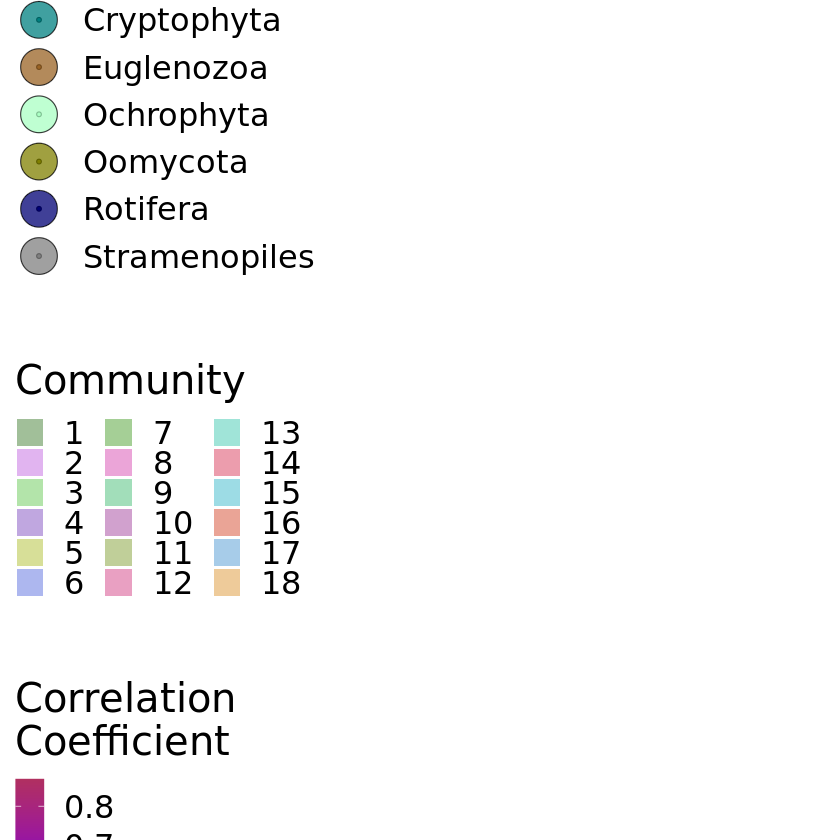

In [288]:
cluster_centers = bact_layout_frame %>% dplyr::group_by(community) %>% 
                    dplyr::summarize(mean_x = mean(V1),mean_y=mean(V2),n_points=n())

ggplot() +
      ggforce::geom_circle(data = cluster_centers, aes(x0 = mean_x, y0 = mean_y, r = (n_points)^(1/(2.5)),
                                                     fill = factor(community)), col = NA, alpha = 0.5) +
      #geom_label(data = cluster_centers, aes(x = mean_x, y = mean_y, label=community)) +
      scale_fill_manual(values=distinct_cols,name="Community",
                        guide=guide_legend(ncol=3)) + new_scale_fill() +
      geom_curve(data= combined_edge_frame[!duplicated(cbind(pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail), 
                                      pmax(combined_edge_frame$.head,
                                           combined_edge_frame$.tail))),]  %>%
                 dplyr::filter(weight > 0) %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk")) %>%
                 dplyr::filter(BaseColor!="Euk-Bact") %>%
                 dplyr::mutate(BaseColor=factor(BaseColor,
                               levels=c("Bact-Bact","Euk-Euk","Euk-Bact"))) %>%
                 dplyr::filter((.tail!=.head) & (BaseColor!="Euk-Bact")),
                                  aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef),#,color=LinkPhylum),
                 alpha=0.8,curvature=0.1,color="gray") +
        #scale_color_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) +
        #scale_color_manual(name="Link", values=c("gray","blue","blue"), 
        #                   breaks = c("Bact-Bact","Euk-Euk","Euk-Bact"),
        #                   labels = c("Bact-Bact","Euk-Euk","Euk-Bact"),
        #                   na.value="gray")+
        geom_point(data=bact_layout_frame%>%
                   #dplyr::left_join(euk_bact_layout_frame %>% dplyr::rename(c("Euk_Bact_Comm"="community"))) %>%
                   dplyr::filter(classification=="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(Euk_Bact_Comm),
                                      fill=classification),
                                      #colour=classification),
                                      #colour=factor(community)),
                   size=1,pch=21) +
        #new_scale_color() +
        #geom_text(data=euk_bact_layout_frame %>%
        #               dplyr::filter((classification %in% c("Alphaproteobacteria",
        #                                           "Ciliophora",
        #                                           "Ochrophyta")) | (Class %in% c("Alphaproteobacteria"))),
        #                              aes(x=V1,y=V2,
        #                              label = paste(Order,sep=" ")),
        #           size=2,alpha=0.5) +
      geom_curve(data= combined_edge_frame %>% dplyr::mutate(Col1=pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail),
                                      Col2=pmax(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail)) %>%
                 dplyr::distinct(Col1,Col2,BaseColor,.keep_all=TRUE)%>%
                 dplyr::filter(!is.na(BaseColor)) %>%
                 dplyr::filter(weight > 0) %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk")) %>%
                 dplyr::filter(BaseColor=="Euk-Bact") %>%
                 dplyr::mutate(BaseColor=factor(BaseColor,
                               levels=c("Bact-Bact","Euk-Euk","Euk-Bact"))) %>%
                 dplyr::filter((.tail!=.head) & (BaseColor=="Euk-Bact")),
                                  aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef,color=CorrCoef),#,color=BaseColor),#,color=LinkPhylum),
                 alpha=0.8,curvature=0.1) +
        geom_point(data=euk_layout_frame%>%
                   #dplyr::left_join(euk_bact_layout_frame %>% dplyr::rename(c("Euk_Bact_Comm"="community"))) %>%
                   dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
                                      shape=Domain,
                                      #colour=factor(Euk_Bact_Comm),
                                      fill=classification
                                      #colour=classification),
                                                                                  ),
                   size=10,pch=21,alpha=0.75) +
        scale_fill_manual(name = "Phylum", values = phylum_distinct_cols,breaks=distinct_phyla) + 
        new_scale_fill() + 
        scale_colour_gradient(low="blue", high="maroon", name="Correlation\nCoefficient") + 
        new_scale_color() + 
        geom_point(data=euk_bact_layout_frame %>%
                       dplyr::left_join(euk_bact_layout_frame %>% dplyr::rename(c("Euk_Bact_Comm"="community"))) %>%
                       dplyr::filter((classification %in% c("Ciliophora","Ochrophyta")) |
                                     #(classification %in% c("Alphaproteobacteria",
                                     #              "Ciliophora",
                                     #              "Ochrophyta")) | (Class %in% c("Alphaproteobacteria")) | 
                                     (mag %in% high_abundance_bact) | (mag %in% high_corr_coef_bact)),
                                      aes(x=V1,y=V2,fill=Order),#,stroke=Euk_Bact_Comm/4),
                                      #color=factor(Euk_Bact_Comm)),#,stroke=Euk_Bact_Comm/3),
                   size=5,alpha=0.75,pch=22) +
        scale_fill_manual(values=distinct_cols) + 
        #geom_label(data=euk_layout_frame%>%dplyr::filter(classification!="Bacterial"),aes(x=V1,y=V2,
          #                            label=Order),
         #          size=3) +
        theme_bw(base_size=24) +
        new_scale_color() +
        #scale_color_manual(name = "Community", values = distinct_cols) + 
        scale_size(range = c(0,1.75),labels=c("0.1","0.2","0.3",
                                            "0.4","0.5","0.6",
                                            "0.7","0.8","0.9","1"),
                   breaks=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),name="") +
        theme(
          axis.text.x = element_blank(),  # remove x-axis text
          axis.text.y = element_blank(), # remove y-axis text
          axis.ticks = element_blank(),  # remove axis ticks
          axis.title.x = element_blank(), # remove x-axis labels
          axis.title.y = element_blank(), # remove y-axis labels
          panel.background = element_blank(), 
          panel.border =element_blank(), 
          panel.grid.major = element_blank(),  #remove major-grid labels
          panel.grid.minor = element_blank(),  #remove minor-grid labels
          plot.background = element_blank()) + guides(fill=guide_legend(ncol=2))
ggsave("euk-bact-interaction-net.pdf",width=20,height=20,units="in")


In [290]:
euk_bact_layout_frame %>%
    dplyr::filter(classification == "Alveolata")

mag             classification Domain    Class       Order            
1 MEND-TF-18S-134 Alveolata      Eukaryota Dinophyceae Thoracosphaerales
2 MEND-TF-18S-143 Alveolata      Eukaryota Dinophyceae Gymnodiniales    
3 MEND-TF-18S-265 Alveolata      Eukaryota Dinophyceae Gymnodiniales    
4 MEND-TF-18S-494 Alveolata      Eukaryota Dinophyceae Peridiniales     
  community degree V1        V2        mean_cluster_centers mean_cluster_y
1 12         2            NA        NA -12.638333           -18.63578     
2 13        10            NA        NA        NaN                 NaN     
3 22         4            NA        NA        NaN                 NaN     
4  7        20     -3.518601 -29.01188   1.176159           -22.85007     
  total_x_distance na.rm mod_V1 r add_extra h k circle_x  circle_y 
1 NaN              TRUE  NaN    6 12        0 0        NA        NA
2 NaN              TRUE  NaN    6 12        0 0        NA        NA
3 NaN              TRUE  NaN    6 12        0 0        NA        NA
4 NaN              TRUE  NaN    6 12        0 0 -3.518601 -29.01188

In [52]:
# read edges
e = significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter((CorrCoef > cutoff))%>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum")) %>%
    dplyr::mutate(Seq2_res = Seq2,Seq1_res = Seq1) %>%
    dplyr::mutate(Seq1 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq1,
                                           TRUE ~ Seq2),
                  Seq2 = dplyr::case_when(Domain1 == "Eukaryota" ~ Seq2_res,
                                           TRUE ~ Seq1_res))

# read nodes
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

returned_frame = make_network(e,v)
euk_edge_frame = returned_frame[[1]]
euk_layout_frame = returned_frame[[2]]
ggplot(euk_layout_frame) + geom_point(aes(x=V1,y=V2,fill=classification,
                                          color=factor(community)),pch=21,size=4,stroke=3) +
    geom_segment(data=euk_edge_frame,aes(x=from.x,xend=to.x,y=from.y,yend=to.y))

Joining, by = c("Seq1", "Seq2")
Joining, by = "Label"


              .tail           .head P.vals PValRank    Corrected  CorrCoef
1     MEND-TF-18S-1 MEND-TF-18S-309      0        1 6.909857e-07 0.9811613
2    MEND-TF-18S-10 MEND-TF-18S-131      0       10 6.909857e-06 0.7506260
3    MEND-TF-18S-19  MEND-TF-18S-23      0       11 7.600842e-06 0.6702491
4    MEND-TF-18S-23  MEND-TF-18S-19      0       12 8.291828e-06 0.6702491
5    MEND-TF-18S-29 MEND-TF-18S-133      0       20 1.381971e-05 0.5988927
6    MEND-TF-18S-29 MEND-TF-18S-233      0       22 1.520168e-05 0.5275081
7    MEND-TF-18S-29 MEND-TF-18S-295      0       23 1.589267e-05 0.5389254
8    MEND-TF-18S-29 MEND-TF-18S-305      0       24 1.658366e-05 0.5732822
9    MEND-TF-18S-38  MEND-TF-18S-84      0       34 2.349351e-05 0.5150154
10   MEND-TF-18S-38 MEND-TF-18S-201      0       35 2.418450e-05 0.6309588
11   MEND-TF-18S-38 MEND-TF-18S-251      0       36 2.487548e-05 0.6271059
12   MEND-TF-18S-72  MEND-TF-18S-77      0       51 3.524027e-05 0.8500161
13   MEND-TF-18S-72  MEND

ERROR: [1m[33mError[39m in [1m[1m`stop_vctrs()`:[22m
[33m![39m Names must be unique.
[31m✖[39m These names are duplicated:
  * "Order1" at locations 7 and 17.


In [236]:
community_means = euk_layout_frame %>%
    dplyr::group_by(Domain,community) %>%
    dplyr::mutate(mean_cluster_centers = mean(V1,na.rm=TRUE),
                  mean_cluster_y = mean(V2,na.rm=TRUE))
euk_layout_frame = euk_layout_frame %>%
    dplyr::left_join(community_means %>% dplyr::select(mag,mean_cluster_centers,mean_cluster_y)) %>%
    dplyr::group_by(Domain) %>%
    dplyr::mutate(total_x_distance = sqrt((max(mean_cluster_centers) - 
                                           min(mean_cluster_centers))^2)) %>%
    dplyr::mutate(mod_V1 = mean_cluster_centers / total_x_distance * 360) %>% # angular measurement
    dplyr::ungroup() %>%
    dplyr::mutate(r = dplyr::case_when(Domain == "Eukaryota" ~ r_euk,
                                       TRUE ~ r_bac),
                  add_extra = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*2,
                                       TRUE ~ 0),
                  h = h_meas, k = k_meas,
                  circle_x = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*cos(mod_V1*pi/180) + h_meas + 
                                              (V1-mean_cluster_centers),
                                              TRUE ~ V1),
                  circle_y = dplyr::case_when(Domain == "Eukaryota" ~ r_euk*sin(mod_V1*pi/180) + k_meas + 
                                              (V2-mean_cluster_y),
                                              TRUE ~ V2))

Adding missing grouping variables: `Domain`, `community`

Joining, by = c("mag", "Domain", "community")



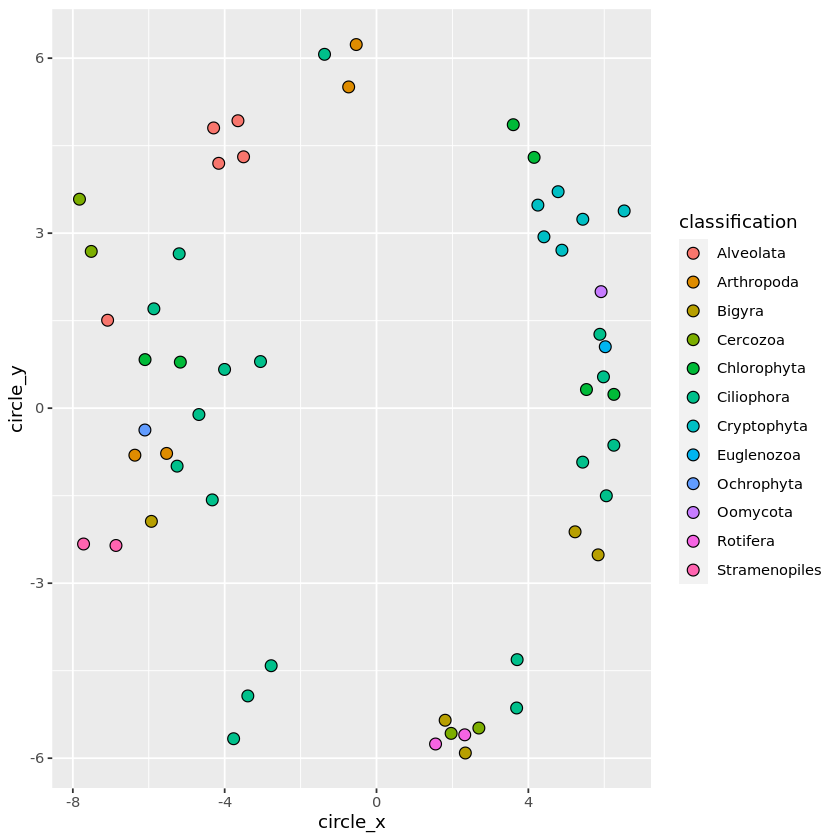

In [242]:
ggplot(euk_layout_frame) + geom_point(aes(x=circle_x,y=circle_y,fill=classification),pch=21,size=3)

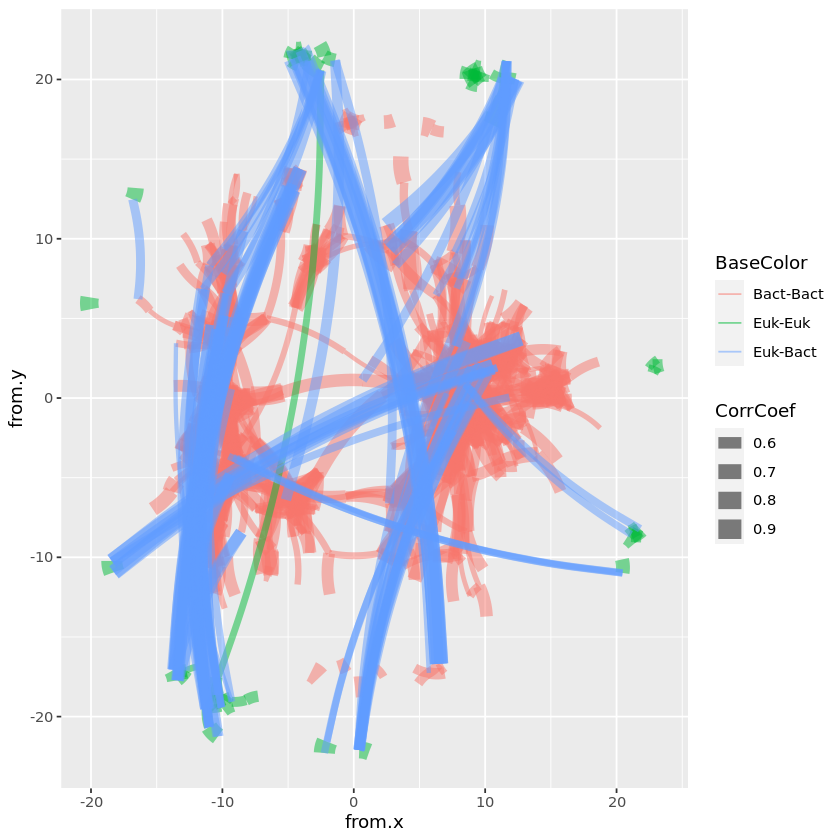

In [195]:
ggplot() +
    geom_curve(data= combined_edge_frame[!duplicated(cbind(pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail), 
                                      pmax(combined_edge_frame$.head,
                                           combined_edge_frame$.tail))),]  %>%
                 dplyr::filter(weight > 0) %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk")) %>%
                 dplyr::mutate(BaseColor=factor(BaseColor,
                               levels=c("Bact-Bact","Euk-Euk","Euk-Bact")))%>%
                 dplyr::filter(.tail!=.head),
                                  aes(x=from.x,xend = to.x,y=from.y,
                                  yend = to.y,size=CorrCoef,color=BaseColor),#,color=LinkPhylum),
                 alpha=0.5,curvature=0.1) 

In [118]:
combined_edge_frame %>% dplyr::mutate(Col1=pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail),
                                      Col2=pmax(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail)) %>%
                 dplyr::distinct(Col1,Col2,.keep_all=TRUE)%>%
                 dplyr::filter(weight > 0) %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk")) %>%
    dplyr::filter(BaseColor == "Euk-Bact")

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


.tail .head P.vals PValRank Corrected CorrCoef Order1 Phylum1 Domain1
     Order2 ⋯ Dom1 Dom2 to.x to.y from.x from.y BaseColor LinkPhylum Col1 Col2

In [125]:
combined_edge_frame %>% dplyr::mutate(Col1=pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail),
                                      Col2=pmax(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail)) %>%
                 dplyr::distinct(Col1,Col2,BaseColor,.keep_all=TRUE)%>%
                 dplyr::filter(!is.na(BaseColor)) %>%
                 dplyr::filter(weight > 0) %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk"))

.tail           .head            P.vals PValRank Corrected CorrCoef  Order1
1   MEND-TF-18S-1   MEND-TF-16S-235  NA     NA       NA        0.6925829 NA    
2   MEND-TF-18S-1   MEND-TF-16S-1050 NA     NA       NA        0.7303914 NA    
3   MEND-TF-18S-1   MEND-TF-16S-679  NA     NA       NA        0.5204989 NA    
4   MEND-TF-18S-23  MEND-TF-16S-610  NA     NA       NA        0.5258364 NA    
5   MEND-TF-18S-23  MEND-TF-16S-687  NA     NA       NA        0.5067372 NA    
6   MEND-TF-18S-23  MEND-TF-16S-1634 NA     NA       NA        0.5189302 NA    
7   MEND-TF-18S-29  MEND-TF-16S-83   NA     NA       NA        0.5387244 NA    
8   MEND-TF-18S-29  MEND-TF-16S-982  NA     NA       NA        0.5104552 NA    
9   MEND-TF-18S-29  MEND-TF-16S-1008 NA     NA       NA        0.5878660 NA    
10  MEND-TF-18S-38  MEND-TF-16S-390  NA     NA       NA        0.5165146 NA    
11  MEND-TF-18S-38  MEND-TF-16S-151  NA     NA       NA        0.5589159 NA    
12  MEND-TF-18S-72  MEND-TF-16S-997  NA     NA       NA        0.7230283 NA    
13  MEND-TF-18S-74  MEND-TF-16S-197  NA     NA       NA        0.5249573 NA    
14  MEND-TF-18S-74  MEND-TF-16S-1056 NA     NA       NA        0.5069861 NA    
15  MEND-TF-18S-77  MEND-TF-16S-997  NA     NA       NA        0.8436700 NA    
16  MEND-TF-18S-78  MEND-TF-16S-997  NA     NA       NA        0.8022510 NA    
17  MEND-TF-18S-78  MEND-TF-16S-998  NA     NA       NA        0.5010494 NA    
18  MEND-TF-18S-84  MEND-TF-16S-151  NA     NA       NA        0.5799670 NA    
19  MEND-TF-18S-85  MEND-TF-16S-217  NA     NA       NA        0.5344463 NA    
20  MEND-TF-18S-85  MEND-TF-16S-746  NA     NA       NA        0.5888473 NA    
21  MEND-TF-18S-87  MEND-TF-16S-217  NA     NA       NA        0.5334010 NA    
22  MEND-TF-18S-87  MEND-TF-16S-242  NA     NA       NA        0.5581172 NA    
23  MEND-TF-18S-87  MEND-TF-16S-617  NA     NA       NA        0.5267759 NA    
24  MEND-TF-18S-87  MEND-TF-16S-685  NA     NA       NA        0.5015691 NA    
25  MEND-TF-18S-87  MEND-TF-16S-746  NA     NA       NA        0.5660074 NA    
26  MEND-TF-18S-87  MEND-TF-16S-1033 NA     NA       NA        0.5286888 NA    
27  MEND-TF-18S-87  MEND-TF-16S-1136 NA     NA       NA        0.5555878 NA    
28  MEND-TF-18S-110 MEND-TF-16S-272  NA     NA       NA        0.5182120 NA    
29  MEND-TF-18S-110 MEND-TF-16S-832  NA     NA       NA        0.5189965 NA    
30  MEND-TF-18S-121 MEND-TF-16S-418  NA     NA       NA        0.6066099 NA    
⋮   ⋮               ⋮                ⋮      ⋮        ⋮         ⋮         ⋮     
140 MEND-TF-18S-494 MEND-TF-16S-1156 NA     NA       NA        0.5704337 NA    
141 MEND-TF-18S-11  MEND-TF-16S-568  NA     NA       NA        0.5572500 NA    
142 MEND-TF-18S-11  MEND-TF-16S-985  NA     NA       NA        0.5524203 NA    
143 MEND-TF-18S-11  MEND-TF-16S-662  NA     NA       NA        0.5961001 NA    
144 MEND-TF-18S-107 MEND-TF-16S-163  NA     NA       NA        0.5522058 NA    
145 MEND-TF-18S-209 MEND-TF-16S-156  NA     NA       NA        0.8223532 NA    
146 MEND-TF-18S-251 MEND-TF-16S-253  NA     NA       NA        0.5698346 NA    
147 MEND-TF-18S-251 MEND-TF-16S-331  NA     NA       NA        0.5613994 NA    
148 MEND-TF-18S-251 MEND-TF-16S-381  NA     NA       NA        0.5965015 NA    
149 MEND-TF-18S-251 MEND-TF-16S-390  NA     NA       NA        0.6377598 NA    
150 MEND-TF-18S-251 MEND-TF-16S-543  NA     NA       NA        0.5459665 NA    
151 MEND-TF-18S-251 MEND-TF-16S-777  NA     NA       NA        0.6207717 NA    
152 MEND-TF-18S-274 MEND-TF-16S-418  NA     NA       NA        0.5315740 NA    
153 MEND-TF-18S-274 MEND-TF-16S-444  NA     NA       NA        0.5168153 NA    
154 MEND-TF-18S-274 MEND-TF-16S-860  NA     NA       NA        0.5649267 NA    
155 MEND-TF-18S-274 MEND-TF-16S-967  NA     NA       NA        0.5394217 NA    
156 MEND-TF-18S-274 MEND-TF-16S-1050 NA     NA       NA        0.5151952 NA    
157 MEND-TF-18S-274 MEND-TF-16S-120  NA     NA       NA        0.5363908 NA    
158 

In [51]:
combined_edge_frame[!duplicated(cbind(pmin(combined_edge_frame$.head, 
                                           combined_edge_frame$.tail), 
                                      pmax(combined_edge_frame$.head,
                                           combined_edge_frame$.tail))),]  %>%
                 dplyr::mutate(BaseColor = dplyr::case_when(!is.na(BaseColor) ~ BaseColor,
                                                            ((Dom1=="Bacteria") & 
                                                             (Dom2=="Bacteria"))~ "Bact-Bact",
                                                            ((Dom1=="Eukaryota") & 
                                                             (Dom2=="Eukaryota"))~ "Euk-Euk")) %>% 
    dplyr::select(.head,.tail,P.vals,weight,CorrCoef,Domain1,Phylum1,Order1,Domain2,Phylum2,Order2,BaseColor) %>%
    dplyr::rename("Seq1"=.head,"Seq2"=.tail,"Link"=BaseColor) %>%
    dplyr::filter(Seq1!=Seq2)

Seq1             Seq2            P.vals weight    CorrCoef  Domain1 
1    MEND-TF-16S-971  MEND-TF-16S-28  0      0.5529910 0.5529910 Bacteria
2    MEND-TF-16S-1008 MEND-TF-16S-83  0      0.9198013 0.9198013 Bacteria
3    MEND-TF-16S-637  MEND-TF-16S-83  0      0.5200859 0.5200859 Bacteria
4    MEND-TF-16S-972  MEND-TF-16S-83  0      0.5193511 0.5193511 Bacteria
5    MEND-TF-16S-1000 MEND-TF-16S-83  0      0.5058966 0.5058966 Bacteria
6    MEND-TF-16S-982  MEND-TF-16S-103 0      0.5398113 0.5398113 Bacteria
7    MEND-TF-16S-1008 MEND-TF-16S-103 0      0.5609161 0.5609161 Bacteria
8    MEND-TF-16S-1175 MEND-TF-16S-103 0      0.5135372 0.5135372 Bacteria
9    MEND-TF-16S-114  MEND-TF-16S-108 0      0.7882624 0.7882624 Bacteria
10   MEND-TF-16S-373  MEND-TF-16S-108 0      0.5819736 0.5819736 Bacteria
11   MEND-TF-16S-412  MEND-TF-16S-108 0      0.6477295 0.6477295 Bacteria
12   MEND-TF-16S-531  MEND-TF-16S-108 0      0.6382611 0.6382611 Bacteria
13   MEND-TF-16S-534  MEND-TF-16S-108 0      0.5662413 0.5662413 Bacteria
14   MEND-TF-16S-550  MEND-TF-16S-108 0      0.5861536 0.5861536 Bacteria
15   MEND-TF-16S-615  MEND-TF-16S-108 0      0.5775200 0.5775200 Bacteria
16   MEND-TF-16S-651  MEND-TF-16S-108 0      0.6029147 0.6029147 Bacteria
17   MEND-TF-16S-742  MEND-TF-16S-108 0      0.5245160 0.5245160 Bacteria
18   MEND-TF-16S-1014 MEND-TF-16S-108 0      0.5444217 0.5444217 Bacteria
19   MEND-TF-16S-1048 MEND-TF-16S-108 0      0.5745378 0.5745378 Bacteria
20   MEND-TF-16S-1206 MEND-TF-16S-108 0      0.8436594 0.8436594 Bacteria
21   MEND-TF-16S-163  MEND-TF-16S-108 0      0.5190821 0.5190821 Bacteria
22   MEND-TF-16S-733  MEND-TF-16S-108 0      0.5854359 0.5854359 Bacteria
23   MEND-TF-16S-798  MEND-TF-16S-108 0      0.5078714 0.5078714 Bacteria
24   MEND-TF-16S-1597 MEND-TF-16S-108 0      0.5637071 0.5637071 Bacteria
25   MEND-TF-16S-174  MEND-TF-16S-109 0      0.8318730 0.8318730 Bacteria
26   MEND-TF-16S-189  MEND-TF-16S-109 0      0.8123112 0.8123112 Bacteria
27   MEND-TF-16S-373  MEND-TF-16S-114 0      0.5694609 0.5694609 Bacteria
28   MEND-TF-16S-412  MEND-TF-16S-114 0      0.6337606 0.6337606 Bacteria
29   MEND-TF-16S-530  MEND-TF-16S-114 0      0.5280437 0.5280437 Bacteria
30   MEND-TF-16S-531  MEND-TF-16S-114 0      0.6519512 0.6519512 Bacteria
⋮    ⋮                ⋮               ⋮      ⋮         ⋮         ⋮       
2021 MEND-TF-16S-982  MEND-TF-18S-295 NA     0.5600263 0.5600263 NA      
2022 MEND-TF-16S-1238 MEND-TF-18S-295 NA     0.5153695 0.5153695 NA      
2023 MEND-TF-16S-185  MEND-TF-18S-295 NA     0.5338098 0.5338098 NA      
2024 MEND-TF-16S-504  MEND-TF-18S-295 NA     0.5185500 0.5185500 NA      
2025 MEND-TF-16S-1146 MEND-TF-18S-295 NA     0.5496999 0.5496999 NA      
2026 MEND-TF-16S-563  MEND-TF-18S-303 NA     0.5009734 0.5009734 NA      
2027 MEND-TF-16S-806  MEND-TF-18S-303 NA     0.5202795 0.5202795 NA      
2028 MEND-TF-16S-235  MEND-TF-18S-309 NA     0.6800055 0.6800055 NA      
2029 MEND-TF-16S-1050 MEND-TF-18S-309 NA     0.7066951 0.7066951 NA      
2030 MEND-TF-16S-679  MEND-TF-18S-309 NA     0.5275387 0.5275387 NA      
2031 MEND-TF-16S-846  MEND-TF-18S-309 NA     0.5278529 0.5278529 NA      
2032 MEND-TF-16S-987  MEND-TF-18S-316 NA     0.5733808 0.5733808 NA      
2033 MEND-TF-16S-1029 MEND-TF-18S-316 NA     0.5443186 0.5443186 NA      
2034 MEND-TF-16S-311  MEND-TF-18S-494 NA     0.6661688 0.6661688 NA      
2035 MEND-TF-16S-541  MEND-TF-18S-494 NA     0.5324217 0.5324217 NA      
2036 MEND-TF-16S-685  MEND-TF-18S-494 NA     0.6100101 0.6100101 NA      
2037 MEND-TF-16S-769  MEND-TF-18S-494 NA     0.5150411 0.5150411 NA      
2038 MEND-TF-16S-806  MEND-TF-18S-494 NA     0.6068948 0.6068948 NA      
2039 MEND-TF-16S-819  MEND-TF-18S-494 NA     0.5420462 0.5420462 NA      
2040 MEND-TF-16S-1033 MEND-TF-18S-494 NA     0.6657438 0.6657438 NA      
2041 MEND-TF-16S-1037 MEND-TF-18S-494 NA     0.5805067 0.5805067 NA      
2042 MEND-TF-16S-1136 MEND-TF-18S-494 NA     0.5363211 0.5363211 NA      
2043 MEND

In [93]:
v = data_tree_euk %>% dplyr::bind_rows(data_tree_bact) %>%
    dplyr::select(Label,Domain,Phylum,Class,Order,Family,Genus,Species) %>%
    dplyr::distinct()

write.csv(significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    #dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter((CorrCoef > cutoff))%>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum"))%>%
                 dplyr::mutate(BaseColor = dplyr::case_when(((Domain1=="Eukaryota") & (Domain2=="Bacteria")) | 
                                                            ((Domain2=="Eukaryota") & (Domain1=="Bacteria")) ~ "Euk-Bact",
                                                            ((Domain1=="Bacteria") & 
                                                             (Domain2=="Bacteria"))~ "Bact-Bact",
                                                            ((Domain1=="Eukaryota") & 
                                                             (Domain2=="Eukaryota"))~ "Euk-Euk")) %>%
    dplyr::select(Seq1,Seq2,P.vals,CorrCoef,Domain1,Phylum1,Order1,Domain2,Phylum2,Order2,BaseColor) %>%
    dplyr::rename("Link"=BaseColor) %>%
    dplyr::filter(Seq1!=Seq2), file.path("..","..","data","Supplemental-Tables","03-network_all_corrs.csv"))

Joining, by = c("Seq1", "Seq2")


In [109]:
significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    #dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter((CorrCoef > cutoff))%>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Class,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Class1"="Class","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Class,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Class2"="Class","Domain2"="Domain","Phylum2"="Phylum"))%>%
                 dplyr::mutate(BaseColor = dplyr::case_when(((Domain1=="Eukaryota") & (Domain2=="Bacteria")) | 
                                                            ((Domain2=="Eukaryota") & (Domain1=="Bacteria")) ~ "Euk-Bact",
                                                            ((Domain1=="Bacteria") & 
                                                             (Domain2=="Bacteria"))~ "Bact-Bact",
                                                            ((Domain1=="Eukaryota") & 
                                                             (Domain2=="Eukaryota"))~ "Euk-Euk")) %>%
    dplyr::select(Seq1,Seq2,P.vals,CorrCoef,Domain1,Phylum1,Class1,Order1,Domain2,Phylum2,Class2,Order2,BaseColor) %>%
    dplyr::rename("Link"=BaseColor) %>%
    dplyr::filter(Seq1!=Seq2) %>% dplyr::filter((Phylum1=="Ciliophora") & (Class2=="Phycisphaeraceae"))

Joining, by = c("Seq1", "Seq2")


Seq1 Seq2 P.vals CorrCoef Domain1 Phylum1 Class1 Order1 Domain2 Phylum2
     Class2 Order2 Link

In [113]:
significant_correlations %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Class,Phylum,Domain), by=c("Seq1"="Label"))  %>% 
    dplyr::filter(Class=="Phycisphaeraceae")

Seq1             Seq2             P.vals PValRank Corrected   
1     MEND-TF-18S-1    MEND-TF-18S-309  0       1       6.909857e-07
2     MEND-TF-18S-1    MEND-TF-16S-235  0       2       1.381971e-06
3     MEND-TF-18S-1    MEND-TF-16S-1050 0       3       2.072957e-06
4     MEND-TF-18S-1    MEND-TF-16S-209  0       4       2.763943e-06
5     MEND-TF-18S-1    MEND-TF-16S-560  0       5       3.454928e-06
6     MEND-TF-18S-1    MEND-TF-16S-679  0       6       4.145914e-06
7     MEND-TF-18S-1    MEND-TF-16S-731  0       7       4.836900e-06
8     MEND-TF-18S-1    MEND-TF-16S-846  0       8       5.527885e-06
9     MEND-TF-18S-1    MEND-TF-16S-897  0       9       6.218871e-06
10    MEND-TF-18S-10   MEND-TF-18S-131  0      10       6.909857e-06
11    MEND-TF-18S-19   MEND-TF-18S-23   0      11       7.600842e-06
12    MEND-TF-18S-23   MEND-TF-18S-19   0      12       8.291828e-06
13    MEND-TF-18S-23   MEND-TF-16S-610  0      13       8.982814e-06
14    MEND-TF-18S-23   MEND-TF-16S-652  0      14       9.673799e-06
15    MEND-TF-18S-23   MEND-TF-16S-687  0      15       1.036479e-05
16    MEND-TF-18S-23   MEND-TF-16S-711  0      16       1.105577e-05
17    MEND-TF-18S-23   MEND-TF-16S-719  0      17       1.174676e-05
18    MEND-TF-18S-23   MEND-TF-16S-776  0      18       1.243774e-05
19    MEND-TF-18S-23   MEND-TF-16S-1634 0      19       1.312873e-05
20    MEND-TF-18S-29   MEND-TF-18S-133  0      20       1.381971e-05
21    MEND-TF-18S-29   MEND-TF-18S-163  0      21       1.451070e-05
22    MEND-TF-18S-29   MEND-TF-18S-233  0      22       1.520168e-05
23    MEND-TF-18S-29   MEND-TF-18S-295  0      23       1.589267e-05
24    MEND-TF-18S-29   MEND-TF-18S-305  0      24       1.658366e-05
25    MEND-TF-18S-29   MEND-TF-18S-362  0      25       1.727464e-05
26    MEND-TF-18S-29   MEND-TF-16S-83   0      26       1.796563e-05
27    MEND-TF-18S-29   MEND-TF-16S-339  0      27       1.865661e-05
28    MEND-TF-18S-29   MEND-TF-16S-921  0      28       1.934760e-05
29    MEND-TF-18S-29   MEND-TF-16S-982  0      29       2.003858e-05
30    MEND-TF-18S-29   MEND-TF-16S-1008 0      30       2.072957e-05
⋮     ⋮                ⋮                ⋮      ⋮        ⋮           
72933 MEND-TF-16S-960  MEND-TF-16S-960  10     362375   0.2503959   
72934 MEND-TF-16S-964  MEND-TF-16S-964  10     362376   0.2503966   
72935 MEND-TF-16S-966  MEND-TF-16S-966  10     362377   0.2503973   
72936 MEND-TF-16S-968  MEND-TF-16S-968  10     362378   0.2503980   
72937 MEND-TF-16S-972  MEND-TF-16S-972  10     362379   0.2503987   
72938 MEND-TF-16S-979  MEND-TF-16S-979  10     362380   0.2503994   
72939 MEND-TF-16S-980  MEND-TF-16S-980  10     362381   0.2504001   
72940 MEND-TF-16S-1000 MEND-TF-16S-1000 10     362382   0.2504008   
72941 MEND-TF-16S-1004 MEND-TF-16S-1004 10     362383   0.2504015   
72942 MEND-TF-16S-1007 MEND-TF-16S-1007 10     362384   0.2504022   
72943 MEND-TF-16S-1016 MEND-TF-16S-1016 10     362385   0.2504028   
72944 MEND-TF-16S-1017 MEND-TF-16S-1017 10     362386   0.2504035   
72945 MEND-TF-16S-1025 MEND-TF-16S-1025 10     362387   0.2504042   
72946 MEND-TF-16S-1031 MEND-TF-16S-1031 10     362388   0.2504049   
72947 MEND-TF-16S-1034 MEND-TF-16S-1034 10     362389   0.2504056   
72948 MEND-TF-16S-1052 MEND-TF-16S-1052 10     362390   0.2504063   
72949 MEND-TF-16S-1053 MEND-TF-16S-1053 10     362391   0.2504070   
72950 MEND-TF-16S-1054 MEND-TF-16S-1054 10     362392   0.2504077   
72951 MEND-TF-16S-1056 MEND-TF-16S-1056 10     362393   0.2504084   
72952 MEND-TF-16S-1088 MEND-TF-16S-1088 10     362394   0.2504091   
72953 MEND-TF-16S-1099 MEND-TF-16S-1099 10     362395   0.2504098   
72954 MEND-TF-16S-1100 MEND-TF-16S-1100 10     362396   0.2504104   
72955 MEND-TF-16S-1110 MEND-TF-16S-1110 10     362397   0.2504111   
72956 MEND-TF-16S-1130 MEND-TF-16S-1130 10     362398   0.2504118   
72957 MEND-TF-16S-1143 MEND-TF-16S-1143 10     362399   0.2504125   
72958 MEND-TF-16S-1146 MEND-TF-16S-1146 10     362400   0.2504132   
7295

In [96]:
unique((significant_correlations %>% dplyr::left_join(corr_coefs) %>%
    dplyr::filter(Seq1!=Seq2)%>%
    #dplyr::filter((grepl("16S",Seq1) & grepl("18S",Seq2)) | 
    #              (grepl("16S",Seq2) & grepl("18S",Seq1))) %>%
    #dplyr::filter((grepl("18S",Seq1) & grepl("18S",Seq2)))%>%
    #dplyr::filter(CorrCoef > 0.60) %>% #0) %>% #0.60) %>%
    dplyr::filter((CorrCoef > cutoff))%>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq1"="Label")) %>%
    dplyr::rename(c("Order1"="Order","Domain1"="Domain","Phylum1"="Phylum")) %>%
    dplyr::left_join(v %>% dplyr::select(Label,Order,Phylum,Domain), by=c("Seq2"="Label")) %>%
    dplyr::rename(c("Order2"="Order","Domain2"="Domain","Phylum2"="Phylum"))%>%
                 dplyr::mutate(BaseColor = dplyr::case_when(((Domain1=="Eukaryota") & (Domain2=="Bacteria")) | 
                                                            ((Domain2=="Eukaryota") & (Domain1=="Bacteria")) ~ "Euk-Bact",
                                                            ((Domain1=="Bacteria") & 
                                                             (Domain2=="Bacteria"))~ "Bact-Bact",
                                                            ((Domain1=="Eukaryota") & 
                                                             (Domain2=="Eukaryota"))~ "Euk-Euk")) %>%
    dplyr::select(Seq1,Seq2,P.vals,CorrCoef,Domain1,Phylum1,Order1,Domain2,Phylum2,Order2,BaseColor) %>%
    dplyr::rename("Link"=BaseColor) %>%
    dplyr::filter(Seq1!=Seq2) )$Phylum2)

Joining, by = c("Seq1", "Seq2")


[1] "Bigyra"                     "Verrucomicrobia"           
 [3] "Proteobacteria"             "Bacteroidetes"             
 [5] "Arthropoda"                 "Actinobacteria"            
 [7] "Ochrophyta"                 "Ciliophora"                
 [9] "Spirochaetes"               "Cyanobacteria"             
[11] "Oomycota"                   "Chlorophyta"               
[13] "Ignavibacteriae"            "Cryptophyta"               
[15] "Euglenozoa"                 "Cercozoa"                  
[17] "Planctomycetes"             "Alveolata"                 
[19] "Rotifera"                   "Gemmatimonadetes"          
[21] "Chloroflexi"                "Chlorobi"                  
[23] "Firmicutes"                 "Stramenopiles"             
[25] "Armatimonadetes"            "Acidobacteria"             
[27] "Kiritimatiellaeota"         "Tenericutes"               
[29] "Opisthokonta"               "Apicomplexa"               
[31] "Candidatus Melainabacteria" "Chytridiomycota"           
[33] "Haptophyta"                 "Endomyxa"                  
[35] "Chlamydiae"